# Trial by trial variability analysis

**11th March 2024 (edited the 6th of May 2024)**

*Théo Gauvrit & Célien Vandromme*

---

## Modules and data import

In [115]:
import numpy as np
import pandas as pd
import percephone.core.recording as pc
import scipy.stats as ss
import os
import percephone.plts.behavior as pbh
import percephone.plts.stats as st
import matplotlib
import percephone.plts.stats as ppt
import matplotlib.pyplot as plt
import percephone.analysis.mlr_models as mlr_m
from multiprocessing import Pool, cpu_count, pool
from sklearn.metrics.pairwise import cosine_similarity
from percephone.analysis.utils import neuron_mean_std_corr, get_iter_range, get_timepoints, corrected_prestim_windows, idx_resp_neur
from sklearn.linear_model import LinearRegression

plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 2
plt.switch_backend("Qt5Agg")
matplotlib.use("Qt5Agg")
%matplotlib inline

In [17]:
user = "Théo"

if user == "Célien":
    directory = "C:/Users/cvandromme/Desktop/Data/"
    roi_path = "C:/Users/cvandromme/Desktop/FmKO_ROIs&inhibitory.xlsx"
    server_address = "Z:/Current_members/Ourania_Semelidou/2p/Figures_paper/"
elif user == "Théo":
    directory = "/datas/Théo/Projects/Percephone/data/Amplitude_Detection/loop_format_tau_02/"
    roi_path = directory + "/FmKO_ROIs&inhibitory.xlsx"
    server_address = "/run/user/1004/gvfs/smb-share:server=engram.local,share=data/Current_members/Ourania_Semelidou/2p/Figures_paper/"
roi_info = pd.read_excel(roi_path)
files = os.listdir(directory)
files_ = [file for file in files if file.endswith("synchro")]

def opening_rec(fil, i):
    rec = pc.RecordingAmplDet(directory + fil + "/", 0, roi_path,cache=False, correction=True)
    # rec.stim_time = corrected_prestim_windows(rec)
    rec.peak_delay_amp()
    return rec

workers = cpu_count()
if user == "Célien":
    pool = pool.ThreadPool(processes=workers)
elif user == "Théo":
    pool = Pool(processes=workers)
async_results = [pool.apply_async(opening_rec, args=(file, i)) for i, file in enumerate(files_)]
recs = {ar.get().filename: ar.get() for ar in async_results}

Calculation Delta F / F.
Nb of frames in F: 28234
Calculation Delta F / F.
Nb of frames in F: 27419
Calculation Delta F / F.
Nb of frames in F: 26770
Calculation Delta F / F.
Nb of frames in F: 30713
Calculation Delta F / F.
Nb of frames in F: 28659
Calculation Delta F / F.
Nb of frames in F: 28220
Calculation Delta F / F.
Nb of frames in F: 29738
Calculation Delta F / F.
Calculation Delta F / F.
Nb of frames in F: 29943
Calculation Delta F / F.
Nb of frames in F: 28573
Calculation Delta F / F.
Calculation Delta F / F.Nb of frames in F: 29549

Nb of frames in F: 28387
Nb of frames in F: 30001
Calculation Delta F / F.
Nb of frames in F: 29730
Calculation Delta F / F.
Nb of frames in F: 29557
Calculation Delta F / F.
Calculation Delta F / F.
Nb of frames in F: 30727
Nb of frames in F: 27114
Calculation Delta F / F.
Nb of frames in F: 27843
Calculation Delta F / F.
Nb of frames in F: 28732
Calculation Delta F / F.
Nb of frames in F: 26770
Calculation Delta F / F.
Nb of frames in F: 29943


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Calculation Delta F / F.
Nb of frames in F: 28732
Calculation Delta F / F.
Nb of frames in F: 28573
Calculation Delta F / F.
Nb of frames in F: 29730
Calculation Delta F / F.
Nb of frames in F: 27419
Calculation Delta F / F.
Nb of frames in F: 28659
Calculation Delta F / F.
Nb of frames in F: 27843
Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Calculation Delta F / F.
Nb of frames in F: 28220
Calculation Delta F / F.
Nb of frames in F: 28387
Calculation Delta F / F.
Nb of frames in F: 30001
Calculation Delta F / F.
Nb of frames in F: 29549
Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Calculation Delta F / F.
Nb of frames in F: 30727
Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame 

Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


Synchronization method with ITI.


/datas/Théo/Projects/Percephone/percephone/core/recording.py:488: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_iti = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'ITI2']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:489: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_reward = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Reward']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:490: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_timeout = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Timeout']
/datas/Théo/Projects/Percephone/percephone/core/recording.py:491: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_stimulus = self.xls[self.xls[0] == 'STATE'][self.xls[4] == 'Stimulus']


## Functions used

Function that will generate the cosine similarity matrix

In [18]:
def cosine_matrix(ax, rec, amplitude, resp_mat, divider=None):
    print("Cosine similarity computation")

    sim_mat = cosine_similarity(resp_mat)
    ax.imshow(sim_mat, cmap="seismic", vmin=-1, vmax=+1, interpolation="none", extent=[0, resp_mat.shape[0], 0, resp_mat.shape[0]])
    ax.set_xlabel("Trial i")
    ax.set_ylabel("Trial j")
    ax.set_title(str(rec.filename) + " " + rec.genotype + " " + str(amplitude))
    ax.grid(False)
    if divider is not None:
        ax.vlines(x=divider, ymin=0, ymax=resp_mat.shape[0], colors='k')
        ax.hlines(y=divider, xmin=0, xmax=resp_mat.shape[0], colors='k')

Functions used to estimate the zscore during stimulation time

In [63]:
def get_zscore_dff(rec, exc_neurons=True, inh_neurons=False, dff=False, act_neurons=False):
    idx_resp,idx_inh_resp =np.arange(rec.zscore_exc.shape[0]), np.arange(rec.zscore_inh.shape[0])
    if act_neurons=="drivers":
        idx_resp, idx_inhibited= idx_resp_neur(rec,   n_type='EXC') 
        idx_inh_resp, idx_inh_inh = idx_resp_neur(rec,   n_type='INH')
    if act_neurons=="not_drivers":
        _resp, _inhibited= idx_resp_neur(rec,   n_type='EXC') 
        _inh_resp,_inh_inh = idx_resp_neur(rec,   n_type='INH')
        idx_resp, idx_inhibited = list(set(idx_resp).difference(set(_resp))), list(set(idx_resp).difference(set(_inhibited)))
        idx_inh_resp, idx_inh_inh =list(set(idx_inh_resp).difference(set(_inh_resp))), list(set(idx_inh_resp).difference(set(_inh_inh)))
    if dff:
        exc = rec.df_f_exc[idx_resp]
        inh = rec.df_f_inh[ idx_inh_resp]
    else:
        exc = rec.zscore_exc[idx_resp]
        inh = rec.zscore_inh[idx_inh_resp]
        
    if exc_neurons and inh_neurons:
        data = np.row_stack((exc, inh)).T
    elif exc_neurons:
        data = exc.T
    elif inh_neurons:
        data = inh.T
    return data

def get_zscore_estimator(rec, estimator, exc_neurons=True, inh_neurons=True, time_span="stim", window=0.5, dff=False, act_neurons=False):
    zscore = get_zscore_dff(rec, exc_neurons=exc_neurons, inh_neurons=inh_neurons, dff=dff, act_neurons=act_neurons)
    first = True
    for i in range(get_iter_range(rec, time_span)):
        start, end = get_timepoints(rec, i, time_span, window=window)
        if first:
            X = neuron_mean_std_corr(zscore[start : end], estimator)
            first = False
        else:
            new_row = neuron_mean_std_corr(zscore[start : end], estimator)
            X = np.row_stack((X, new_row))
    return X

The function used to plot the cosine similarity

In [20]:
def plot_cosine_similarity(recs, parameter, estimator=None, 
                           exc_neurons=True, inh_neurons=False, 
                           time_span="stim", window=0.5,
                           detected_trials=True, undetected_trials=True, det_sorting=False, stim_ampl="all"):
    y, i = 0, 0
    fig, ax = plt.subplots(4, 9, figsize=(35, 20))
    
    for rec in recs.values():
        # Filtering stimulation amplitudes
        stim_filter = rec.stim_ampl_filter(stim_ampl)
        
        # Retrieving data for specified parameter and neuron type
        if parameter == "zscore" or parameter == "dff":
            if parameter == "zscore":
                para_mat = get_zscore_estimator(rec, estimator, exc_neurons=exc_neurons, inh_neurons=inh_neurons, time_span=time_span, window=window, dff=False).T
            else:
                para_mat = get_zscore_estimator(rec, estimator, exc_neurons=exc_neurons, inh_neurons=inh_neurons, time_span=time_span, window=window, dff=True).T
            neuron_type = "EXC & INH" if (exc_neurons and inh_neurons) else ("EXC" if exc_neurons else ("INH" if inh_neurons else "NONE"))
        else:
            # Filtering neuron type
            if exc_neurons and inh_neurons: 
                para_mat = np.row_stack((rec.matrices["EXC"][parameter], rec.matrices["INH"][parameter]))
                neuron_type = "EXC & INH"
            elif exc_neurons:
                para_mat = rec.matrices["EXC"][parameter]
                neuron_type = "EXC"
            elif inh_neurons:
                para_mat = rec.matrices["INH"][parameter]
                neuron_type = "INH"
        
        # Filtering detected trials and amplitudes
        divider = None
        if detected_trials and undetected_trials:
            if det_sorting:
                filt_para_mat = np.row_stack((para_mat.T[np.logical_and(rec.detected_stim, stim_filter)], para_mat.T[np.logical_and(np.invert(rec.detected_stim), stim_filter)]))
                trials_type = "all (sorted)"
                divider = np.logical_and(rec.detected_stim, stim_filter).sum()
            else:
                filt_para_mat = para_mat.T[stim_filter]
                trials_type = "all"
        elif detected_trials:
            filt_para_mat = para_mat.T[np.logical_and(rec.detected_stim, stim_filter)]
            trials_type = "detected"
        elif undetected_trials:
            filt_para_mat = para_mat.T[np.logical_and(np.invert(rec.detected_stim), stim_filter)]
            trials_type = "undetected"
        
        if rec.genotype == "WT":
            pbh.psycho_like_plot(rec, roi_info, ax[0, i])
            cosine_matrix(ax[1, i], rec, rec.threshold, filt_para_mat, divider=divider)
            i = i + 1
        else:
            pbh.psycho_like_plot(rec, roi_info, ax[2, y])
            cosine_matrix(ax[3, y], rec, rec.threshold, filt_para_mat, divider=divider)
            y = y + 1
    
    # Hiding the empty graphs
    # ax[2, 7].set_axis_off()
    # ax[2, 8].set_axis_off()
    # ax[3, 7].set_axis_off()
    # ax[3, 8].set_axis_off()
    if parameter == "zscore":
        fig.suptitle(f"Cosine similarity based on {estimator} {parameter} for {trials_type} trials in {neuron_type} neurons. Amplitude(s): {stim_ampl}", fontsize=26)
    else:
        fig.suptitle(f"Cosine similarity based on {parameter} for {trials_type} trials in {neuron_type} neurons. Amplitude(s): {stim_ampl}", fontsize=26)

# Cosine similarity based on responsivity

---

## All amplitudes

### All trials

Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation


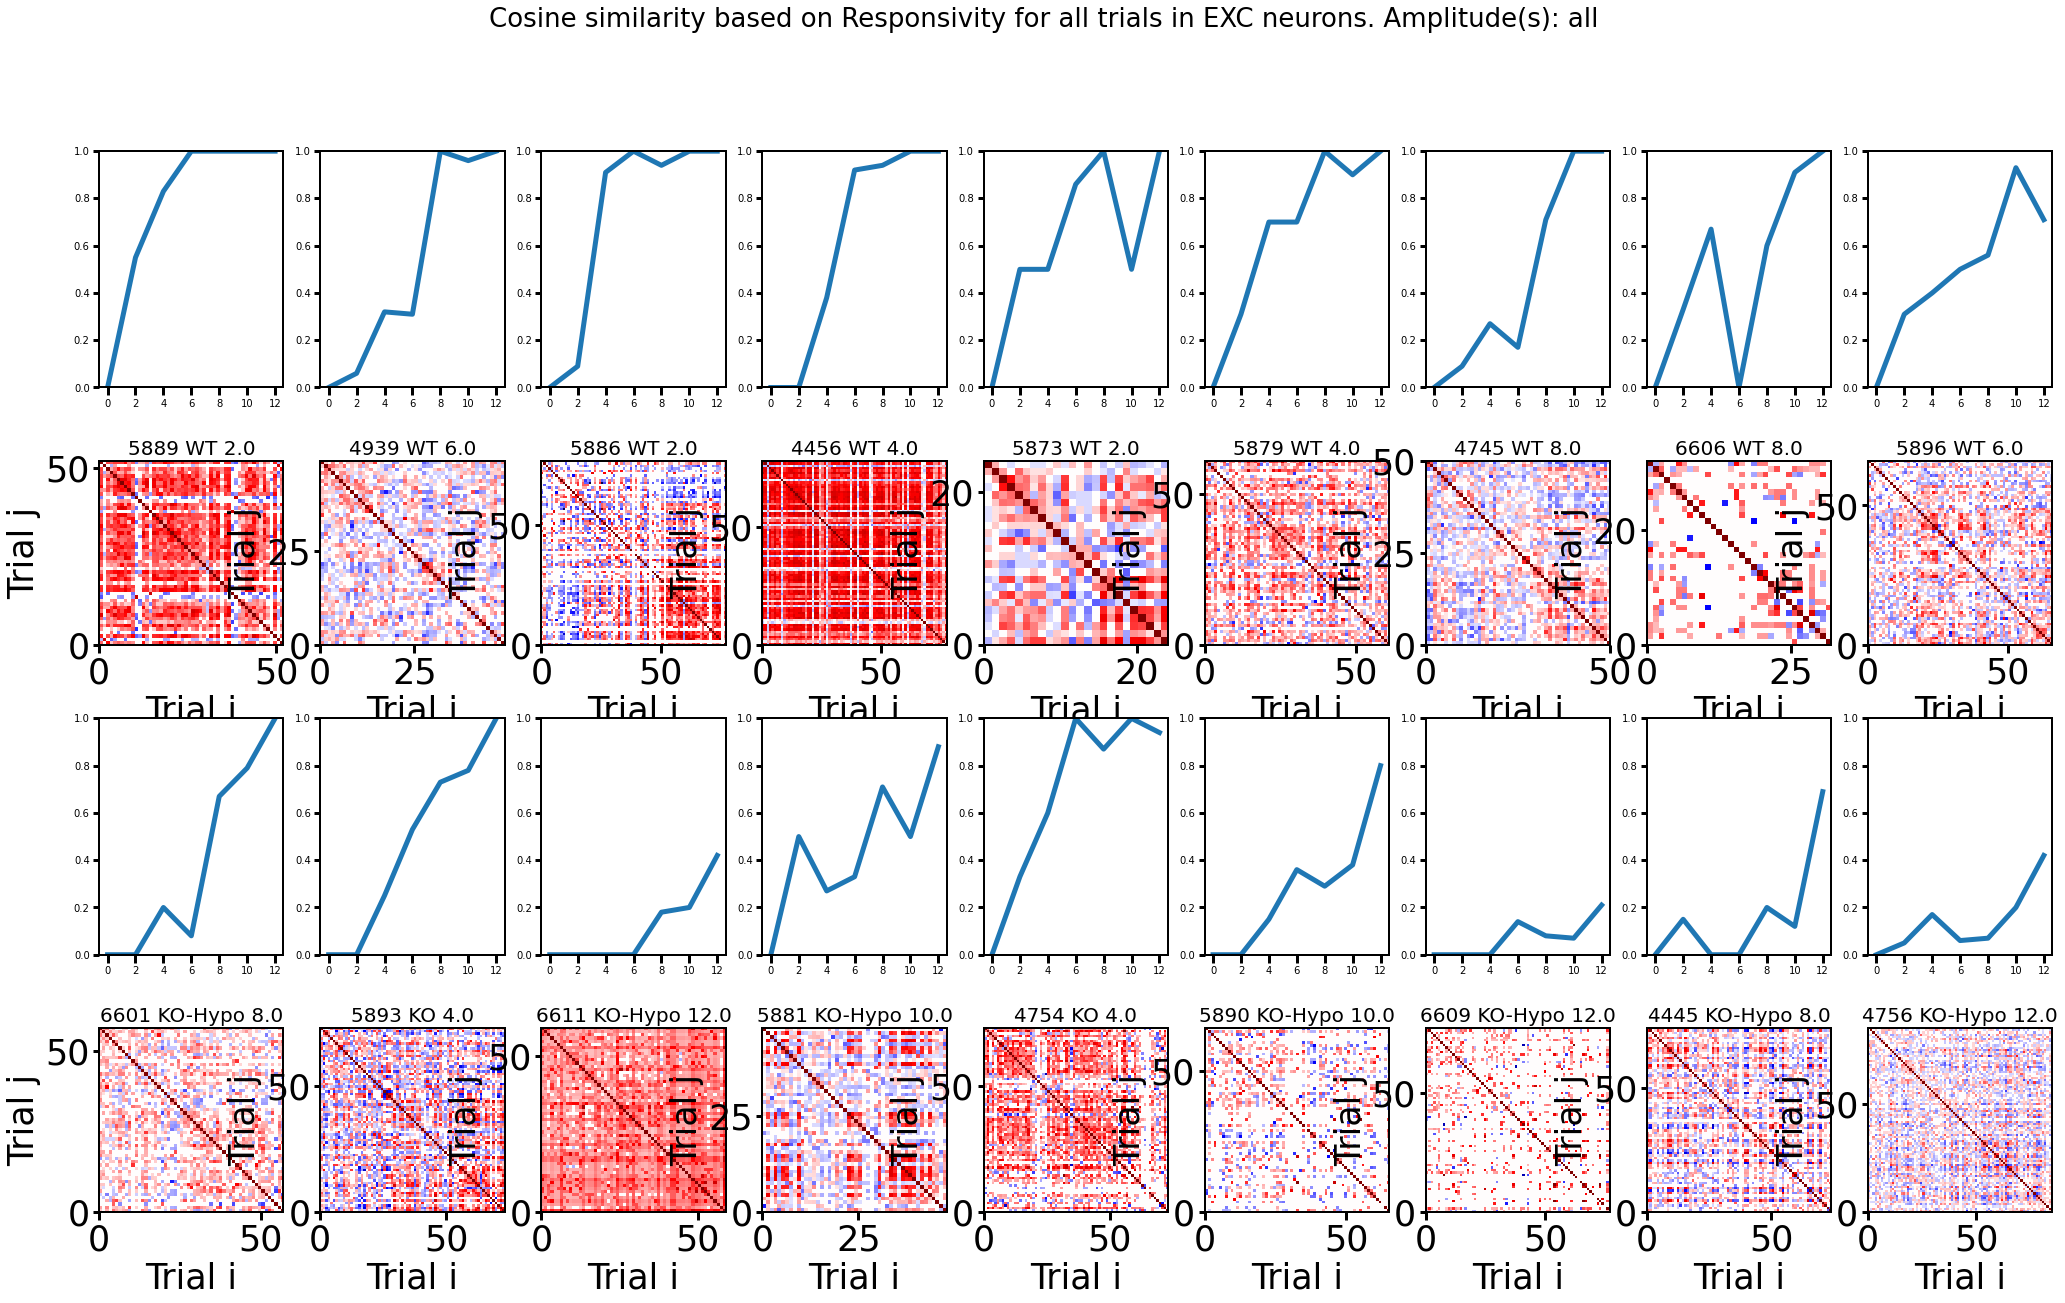

In [21]:
plot_cosine_similarity(recs, "Responsivity", estimator=None, exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="all")

### Detected trials

Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation


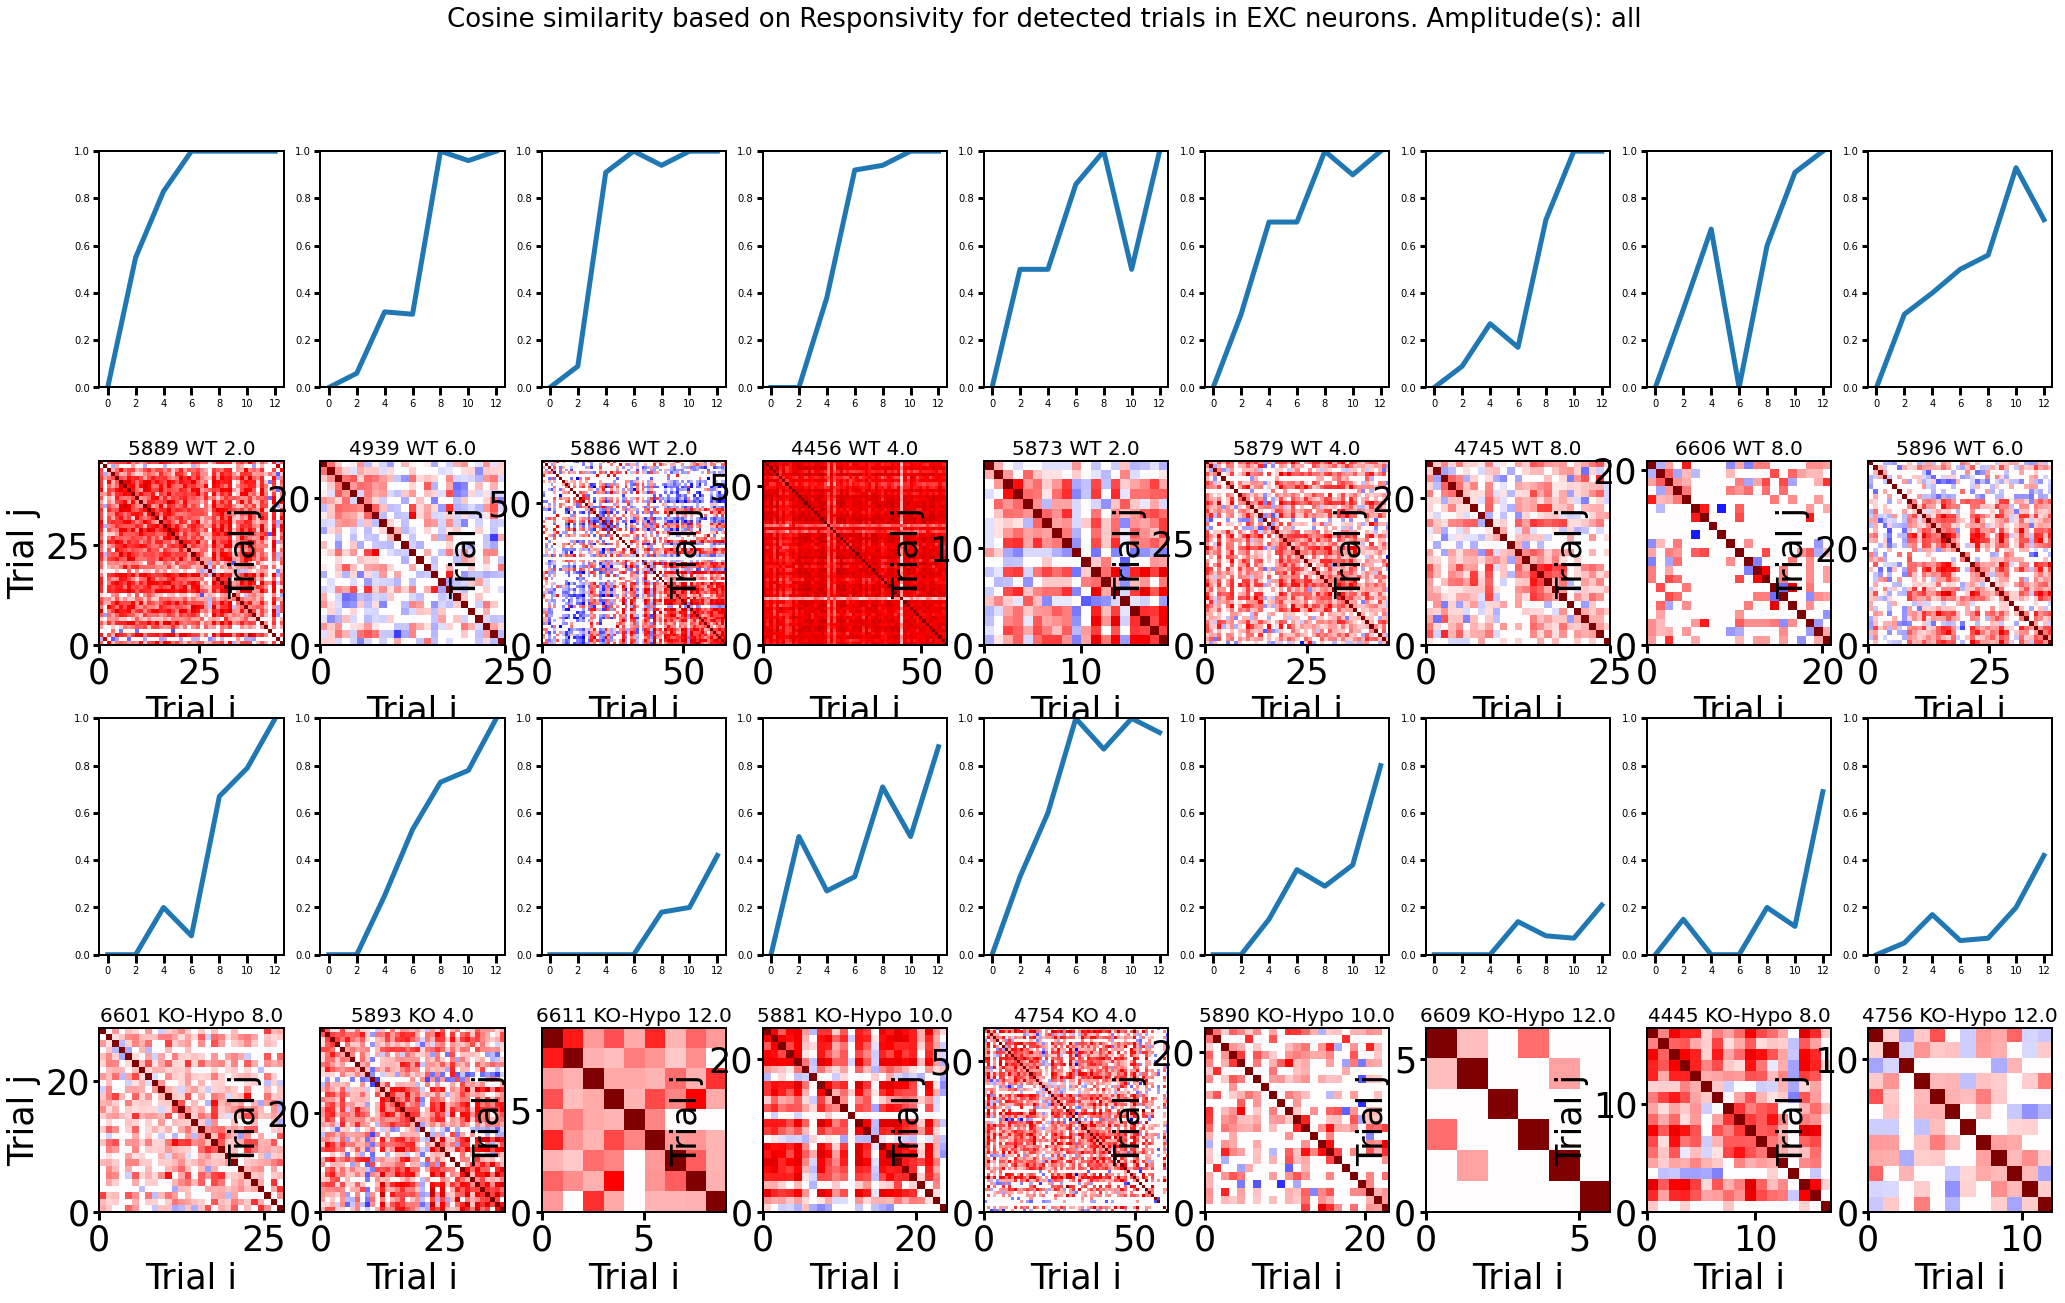

In [22]:
plot_cosine_similarity(recs, "Responsivity", estimator=None, exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="all")

### Undetected trials

Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation


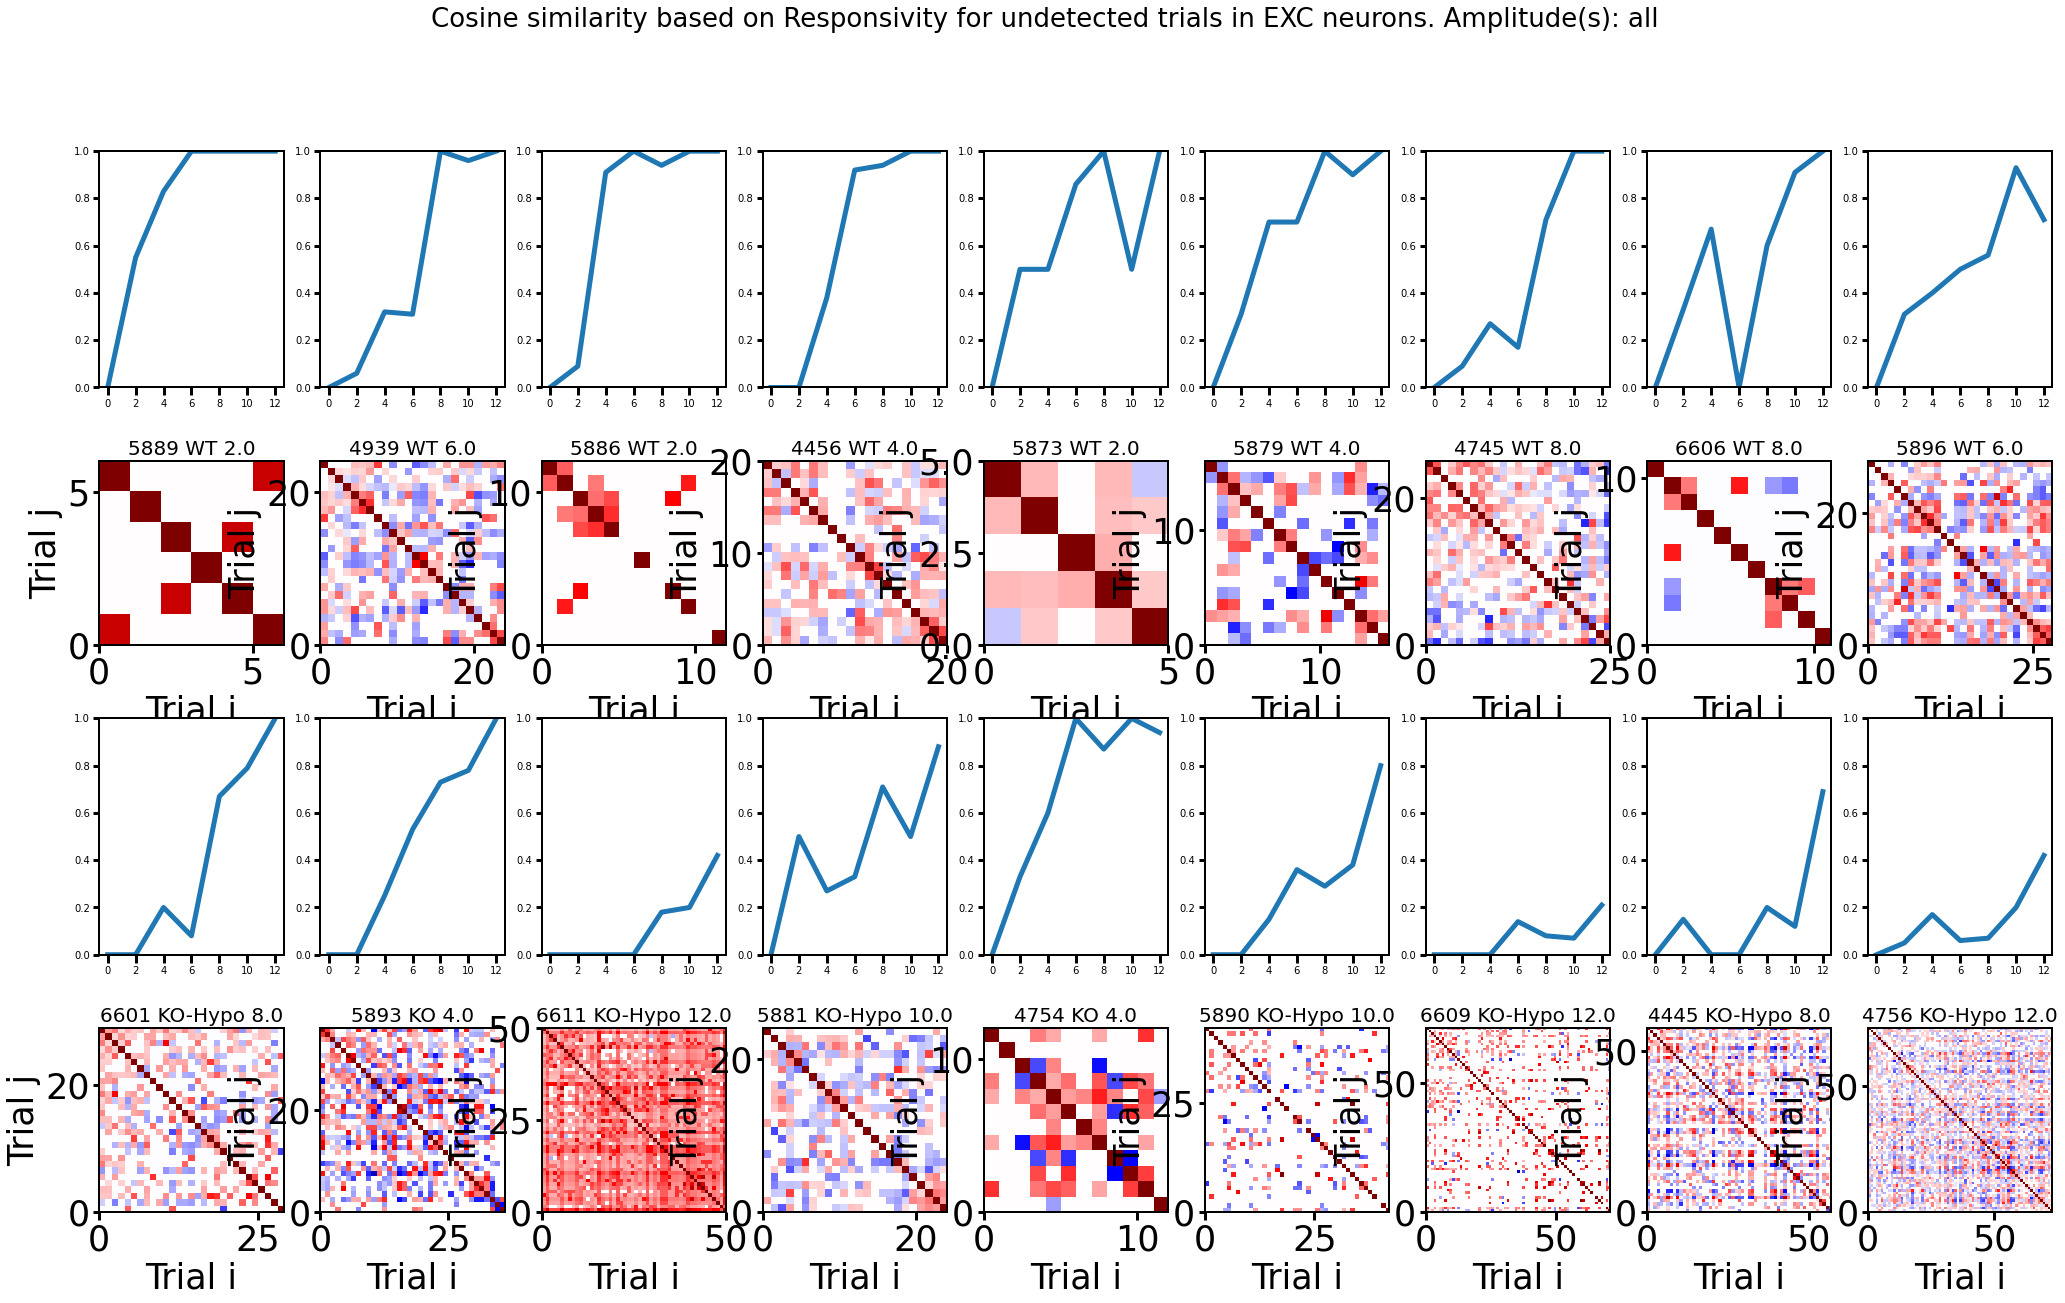

In [23]:
plot_cosine_similarity(recs, "Responsivity", estimator=None, exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="all")

## Threshold amplitude

### All trials

Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation


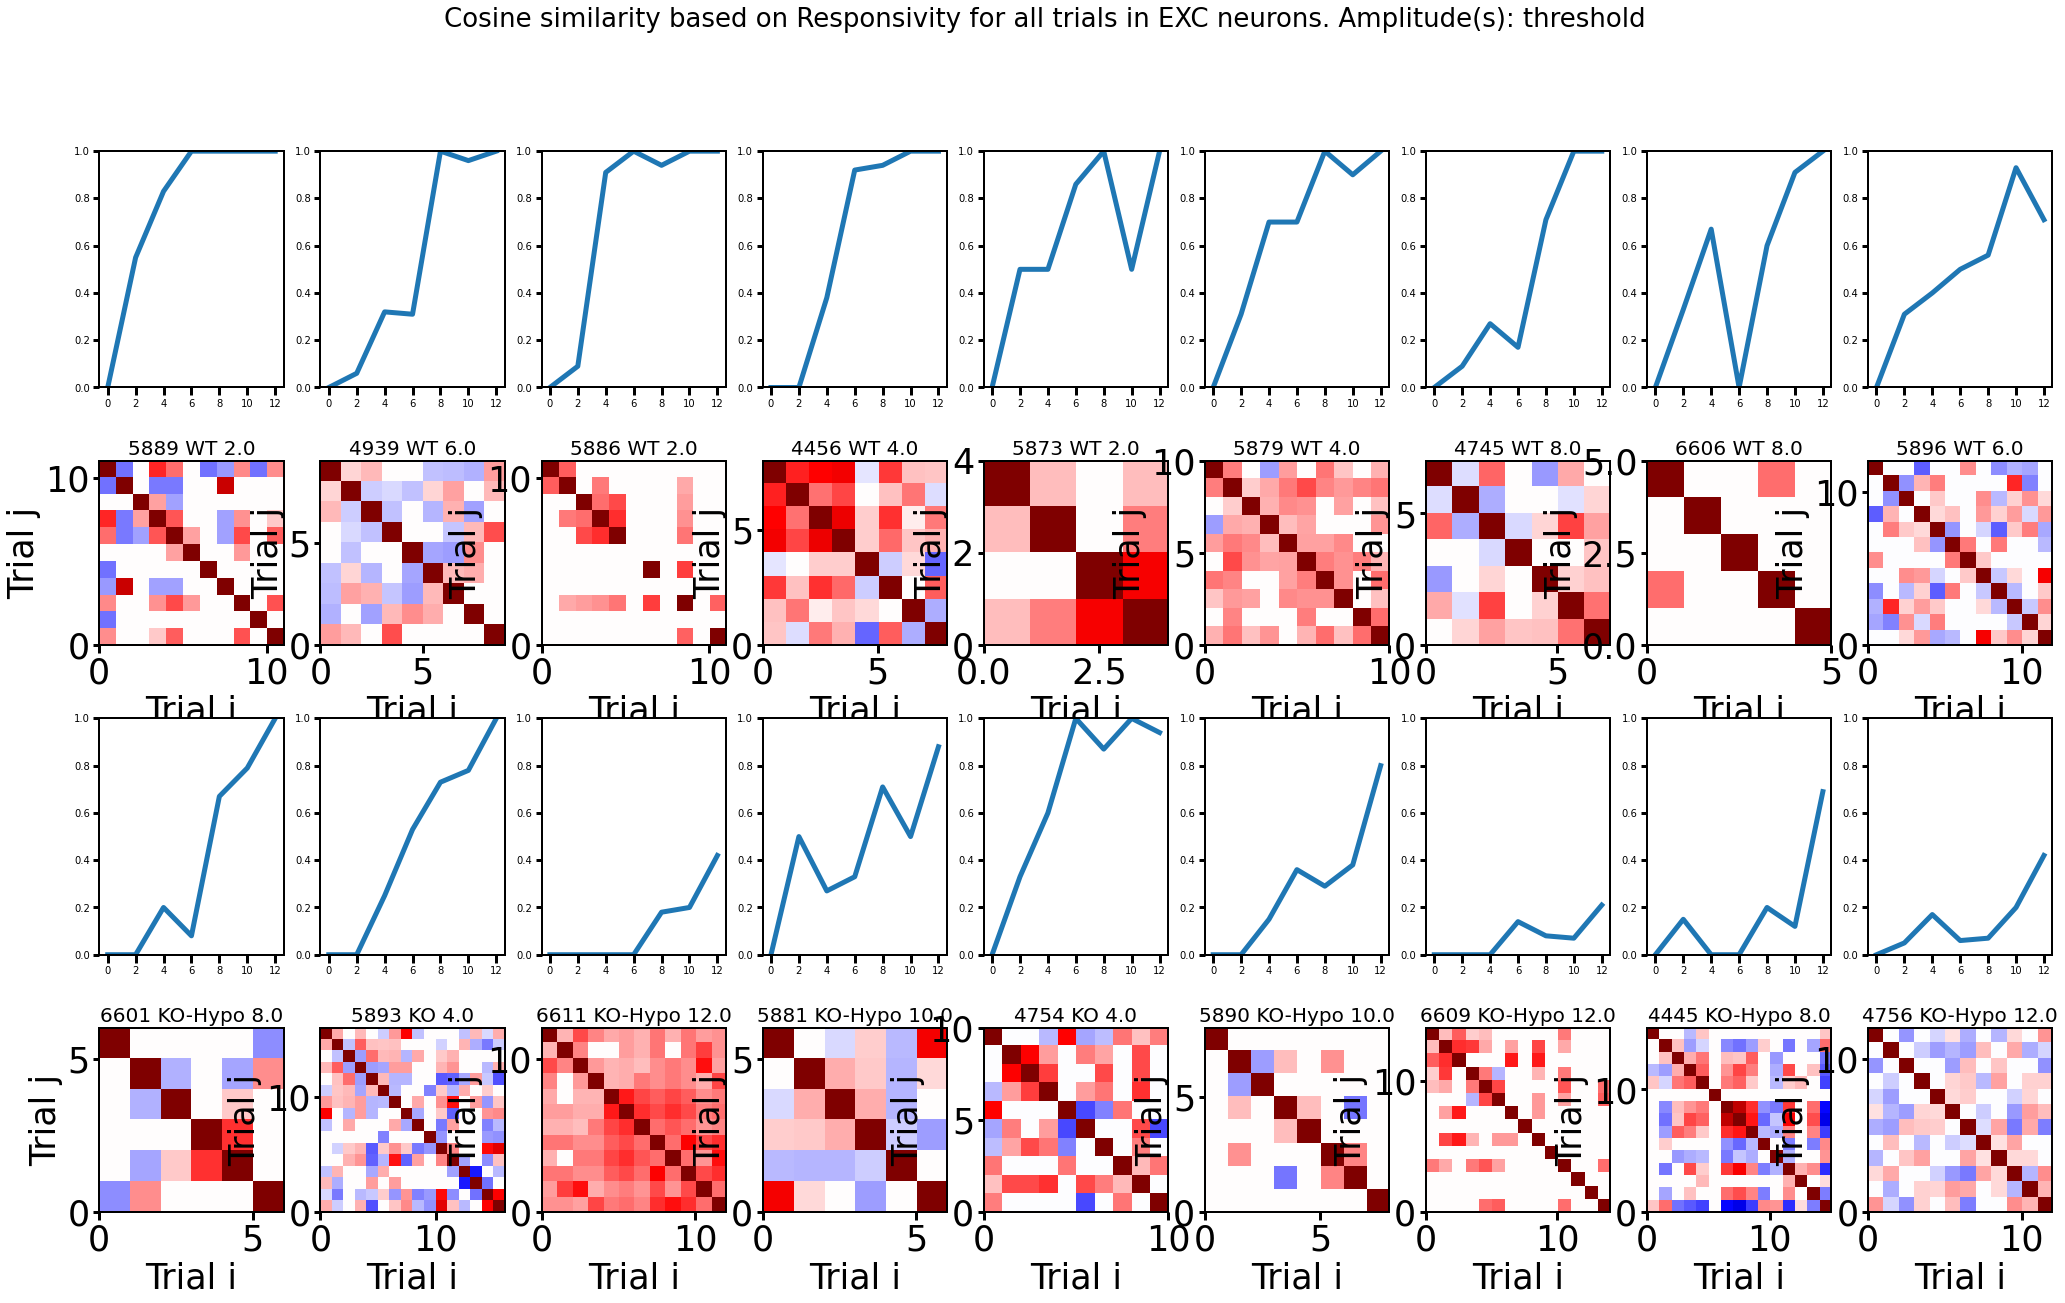

In [24]:
plot_cosine_similarity(recs, "Responsivity", estimator=None, exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="threshold")

### Detected trials

Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation


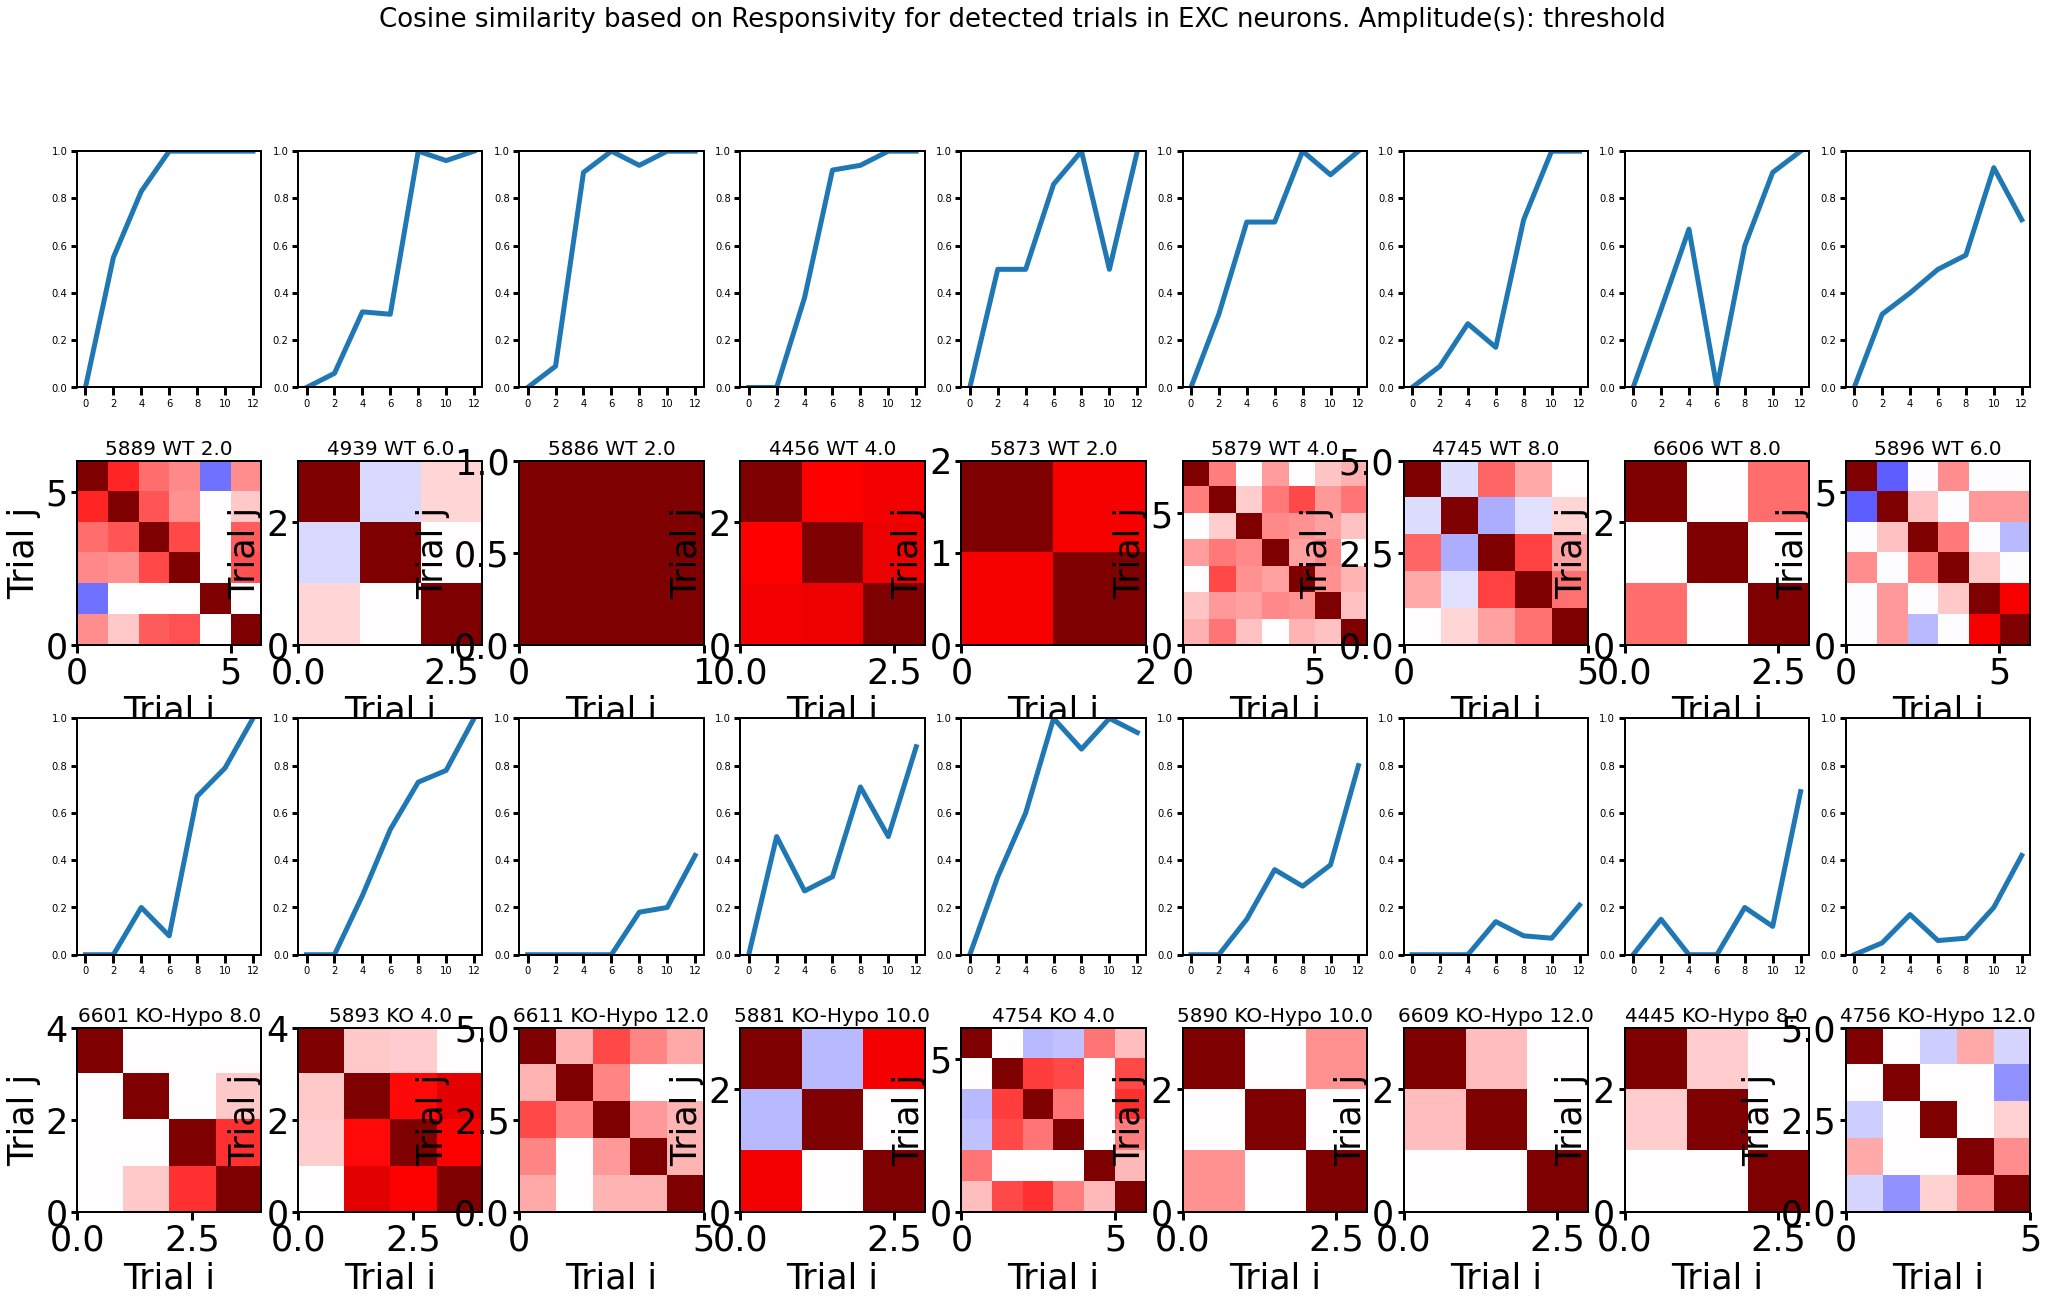

In [25]:
plot_cosine_similarity(recs, "Responsivity", estimator=None, exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="threshold")

### Undetected trials

Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation
Cosine similarity computation


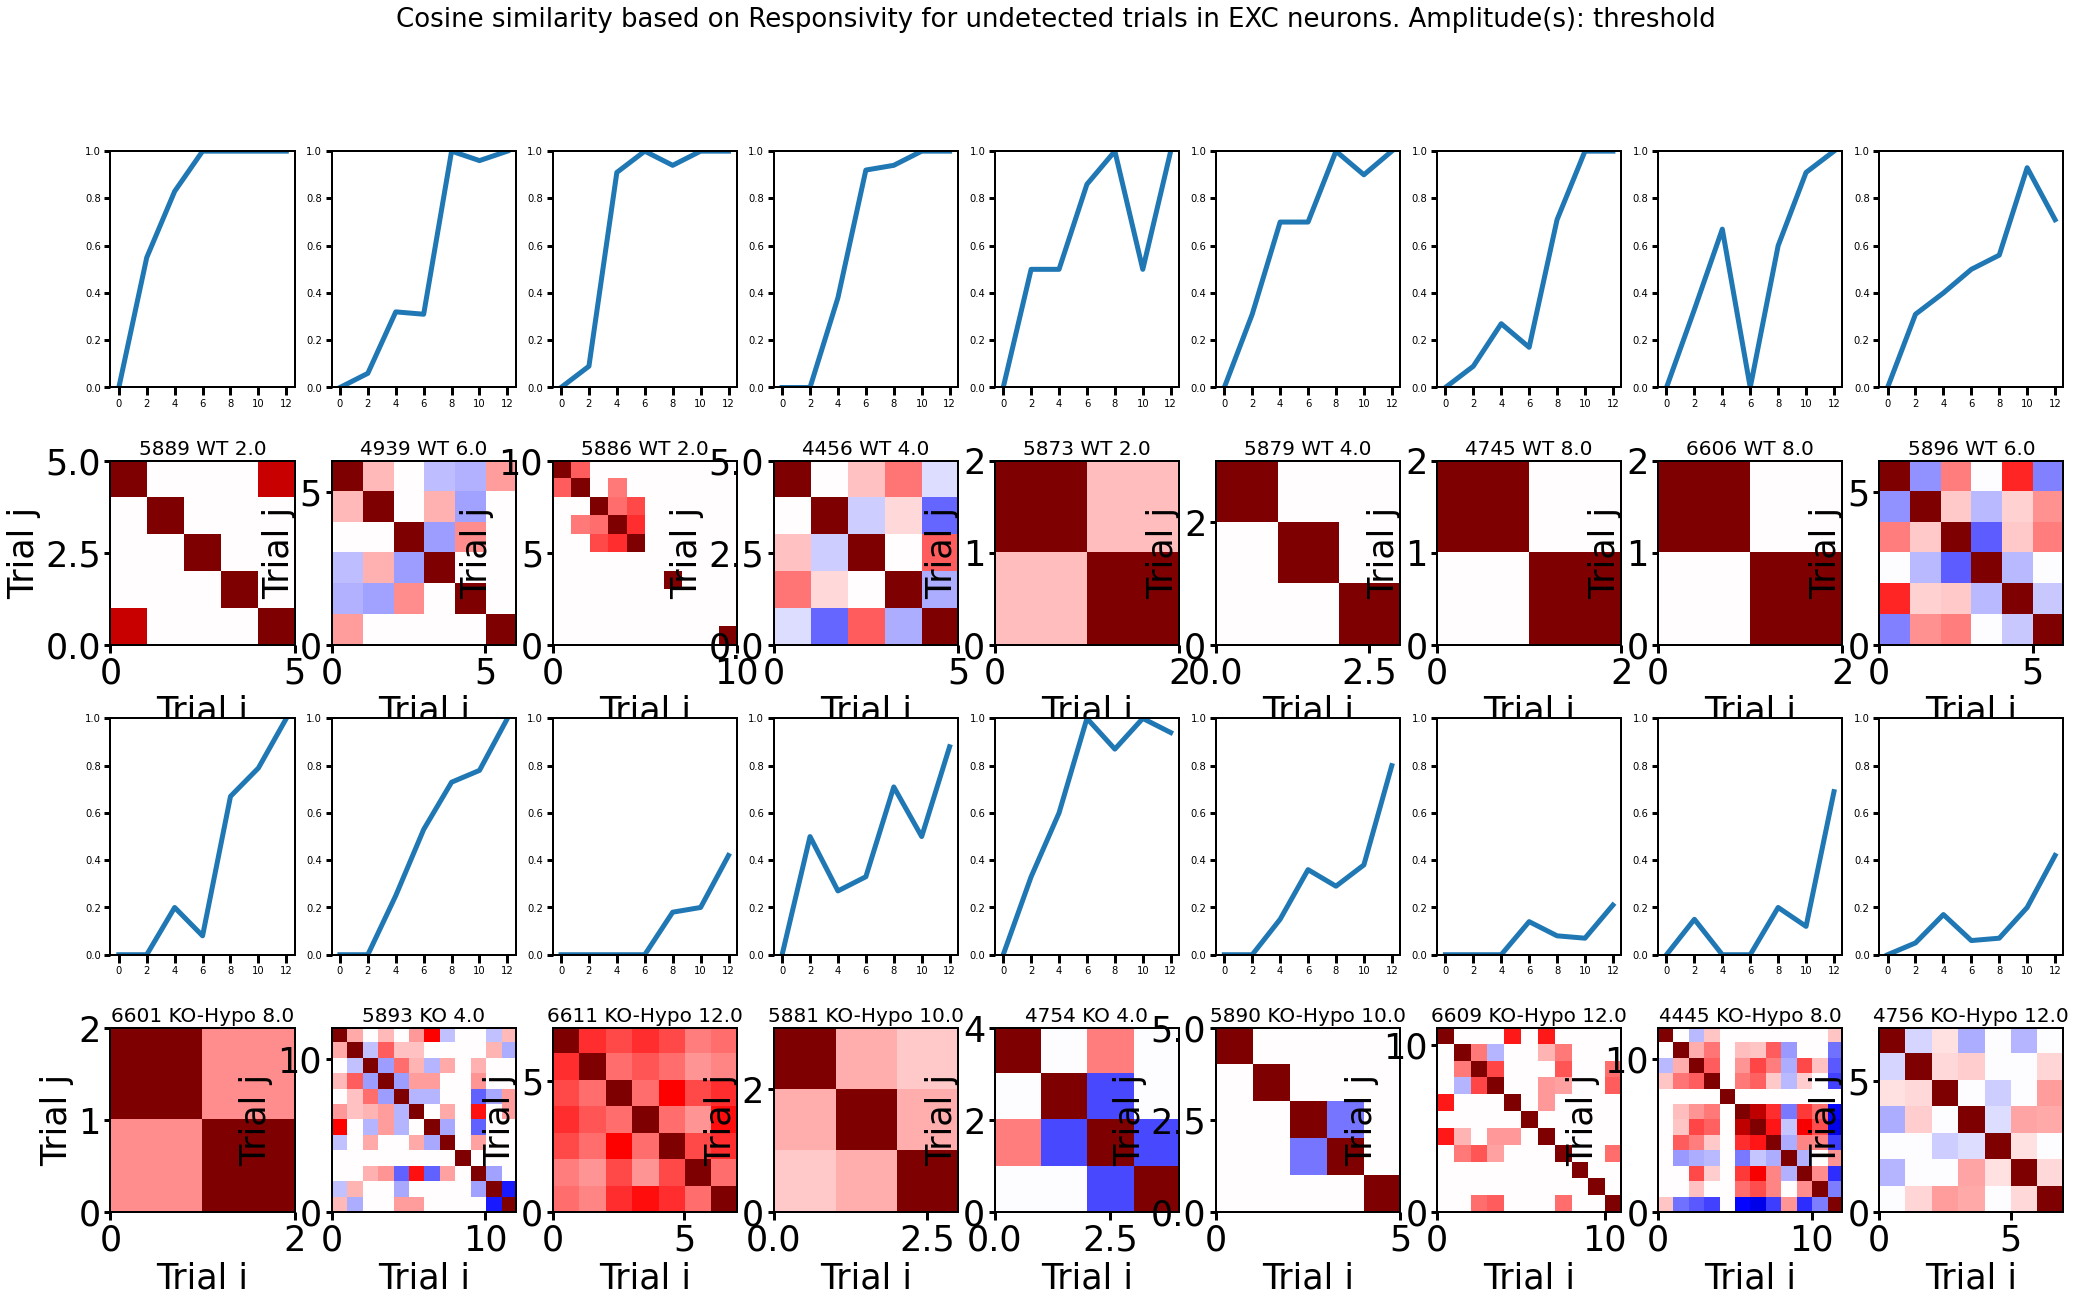

In [26]:
plot_cosine_similarity(recs, "Responsivity", estimator=None, exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="threshold")

# Cosine similarity based on mean zscore

---

## All amplitudes

### All trials

AttributeError: 'RecordingAmplDet' object has no attribute 'zscore_esx'

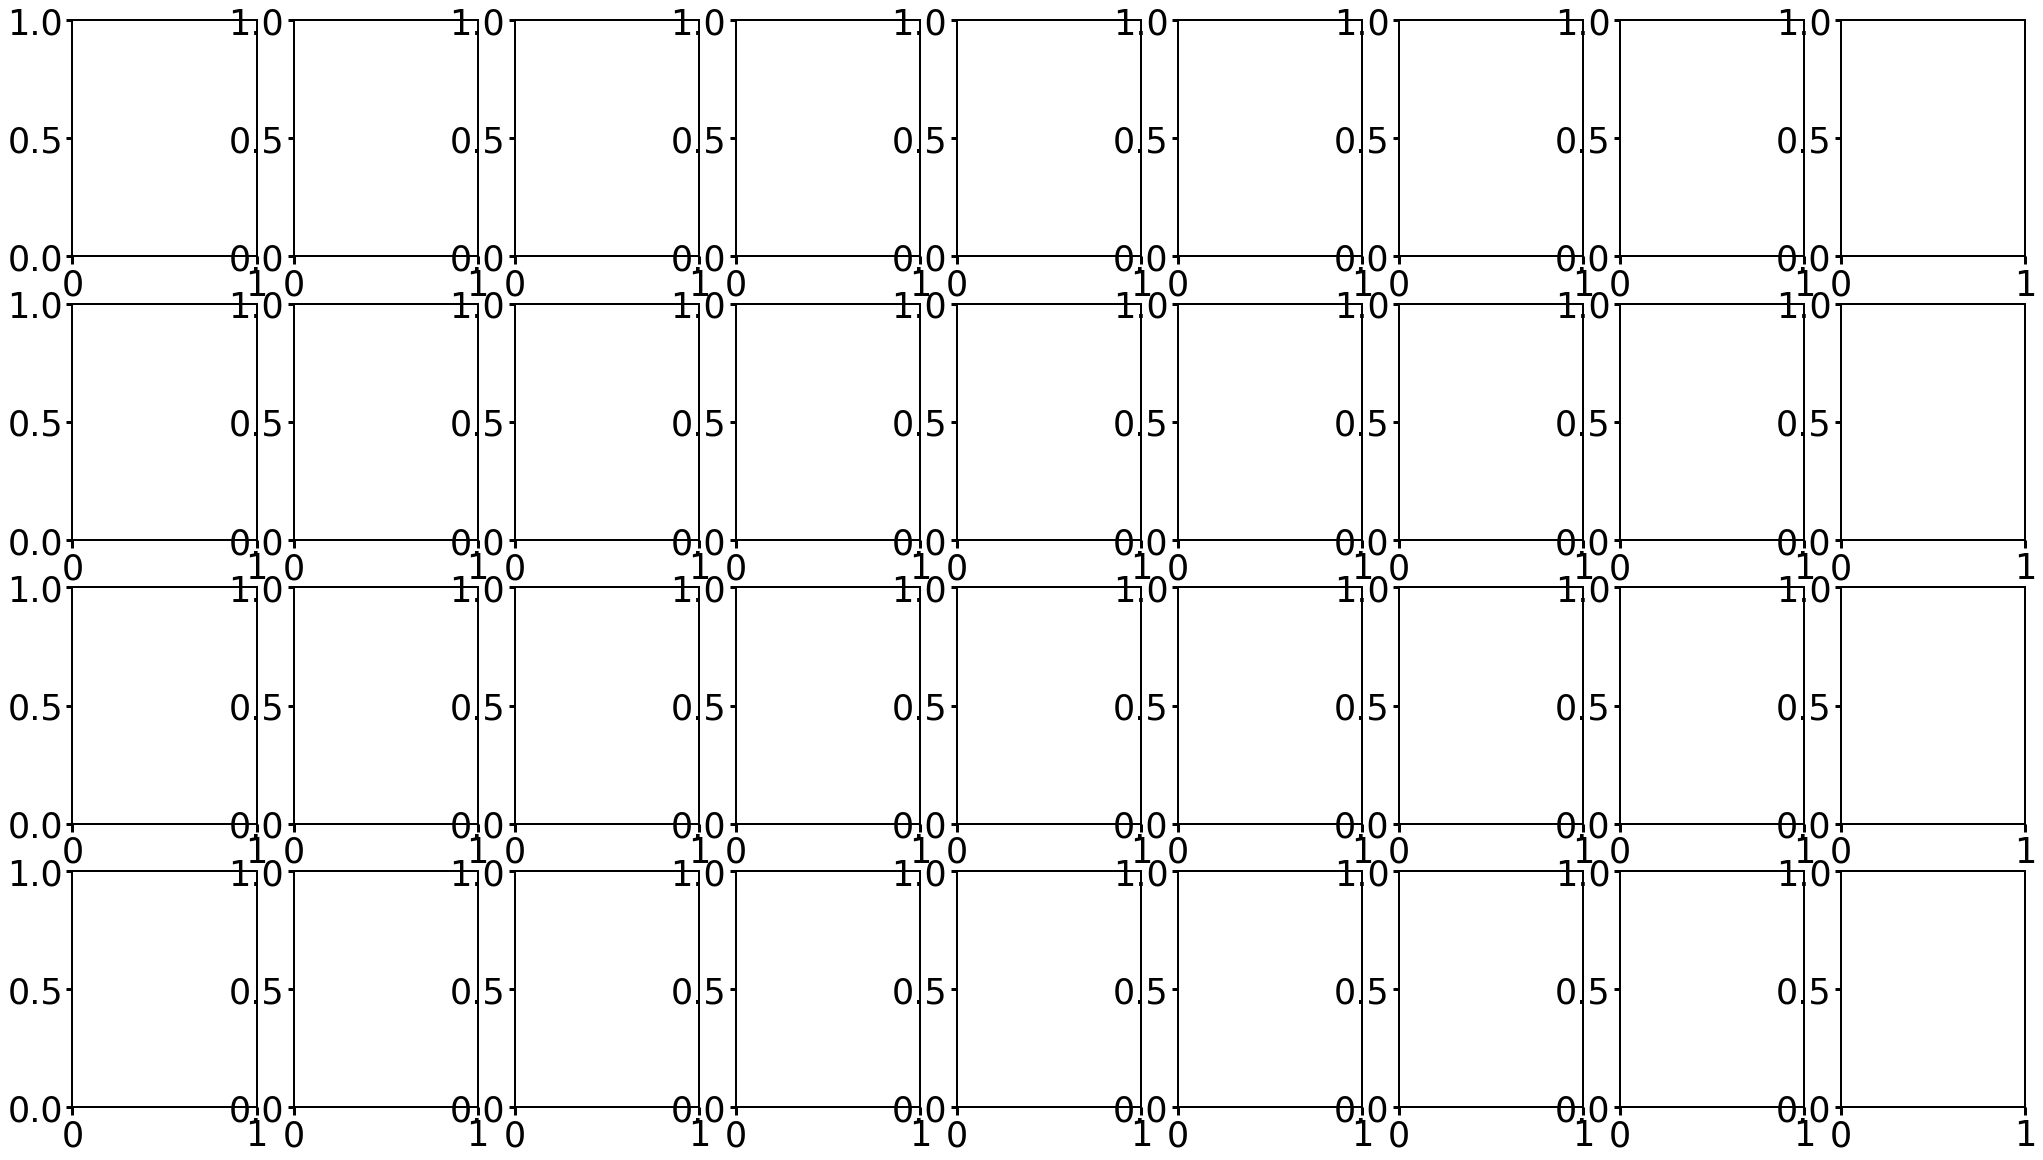

In [27]:
plot_cosine_similarity(recs, "zscore", estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="all")

### Detected trials

In [ ]:
plot_cosine_similarity(recs, "zscore", estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="all")

### Undetected trials

In [ ]:
plot_cosine_similarity(recs, "zscore", estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="all")

## Threshold amplitude

### All trials

#### Stimulation

In [ ]:
plot_cosine_similarity(recs, "zscore", estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="threshold")

In [ ]:
plot_cosine_similarity(recs, "zscore", estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="threshold", det_sorting=True)

#### Pre-stimulation DF/F

In [ ]:
plot_cosine_similarity(recs, "dff", estimator="Mean", 
                           exc_neurons=True, inh_neurons=False, 
                           time_span="pre_stim", window=0.5,
                           detected_trials=True, undetected_trials=True, det_sorting=True, stim_ampl="threshold")

### Detected trials

In [ ]:
plot_cosine_similarity(recs, "zscore", estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="threshold")

### Undetected trials

In [ ]:
plot_cosine_similarity(recs, "zscore", estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="threshold")

# Cosine similarity based on std of zscore

---

## All amplitudes

### All trials

In [ ]:
plot_cosine_similarity(recs, "zscore", estimator="Std", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="all")

# Number of drivers cells comparison

5889
6601
4939
5893
5886
4456
6611
5873
5881
5879
4754
5890
4745
6606
6609
5896
4445
4756
Boxplot plotting.
--- Nb drivers neurons ---
ShapiroResult(statistic=0.9691469073295593, pvalue=0.8873365521430969)
ShapiroResult(statistic=0.8350180983543396, pvalue=0.08924134075641632)
LeveneResult(statistic=1.4024085427902717, pvalue=0.256037158783227)
Equal variances :Ttest_indResult(statistic=2.2114044616659534, pvalue=0.044145774669640064)
Boxplot plotting.
--- Nb drivers neurons ---
ShapiroResult(statistic=0.4828205704689026, pvalue=4.014201749669155e-06)
ShapiroResult(statistic=0.5819318890571594, pvalue=0.00016640355170238763)
MannwhitneyuResult(statistic=53.0, pvalue=0.021843398646654036)
5889
6601
4939
5893
5886
4456
6611
5873
5881
5879
4754
5890
4745
6606
6609
5896
4445
4756
Boxplot plotting.
--- Nb drivers neurons ---
ShapiroResult(statistic=0.8112005591392517, pvalue=0.0273923147469759)
ShapiroResult(statistic=0.8931814432144165, pvalue=0.2916727364063263)
MannwhitneyuResult(statist

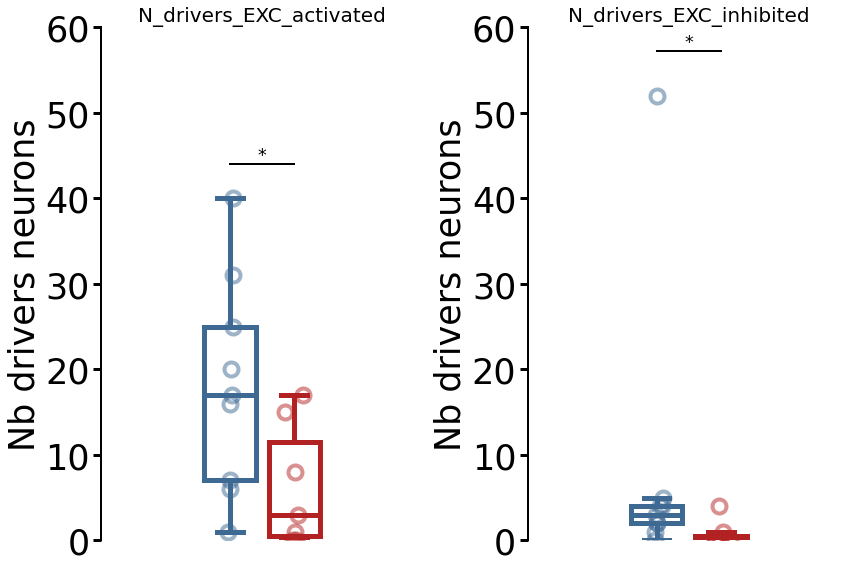

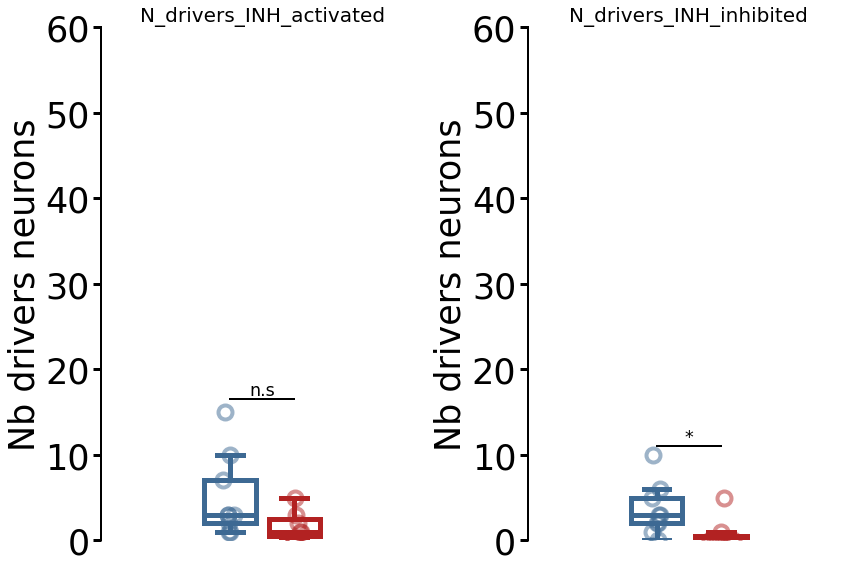

In [96]:


for i, type in enumerate(["EXC", "INH"]):
    n_drivers_wt, n_drivers_ko,  n_drivers_inh_wt,  n_drivers_inh_ko = [],[],[],[]
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
    for rec in recs.values():
        print(rec.filename)
    
        idx_resp, idx_inhibited = idx_resp_neur(rec,n_type=type)
        if rec.genotype == "WT":
            n_drivers_wt.append(len(idx_resp))
            n_drivers_inh_wt.append(len(idx_inhibited ))
        elif rec.genotype == "KO-Hypo":
            n_drivers_ko.append(len(idx_resp))
            n_drivers_inh_ko.append(len(idx_inhibited ))
    axs[0].set_facecolor("white")
    axs[1].set_facecolor("white")
    title =f'N_drivers_{type}'
    st.boxplot(axs[0], n_drivers_wt, n_drivers_ko, "Nb drivers neurons",title=title+"_activated", ylim=[0, 60])
    st.boxplot(axs[1], n_drivers_inh_wt,  n_drivers_inh_ko, "Nb drivers neurons",title=title+"_inhibited", ylim=[0, 60])
    fig.tight_layout()
    fig.savefig(server_address+"Figure2/cosine_similarity/"+title+".pdf")

# Group comparison using cosine similarity

---

We will use cosine similarity based on mean zscore at threshold amplitude to compare groups

In [64]:
def get_mean_cosine_similarity(rec, parameter, estimator=None, exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="all", window="stim",act_neurons=False):
    # Filtering stimulation amplitudes
    stim_filter = rec.stim_ampl_filter(stim_ampl)
    
    # Retrieving data for specified parameter and neuron type
    if parameter == "zscore":
        para_mat = get_zscore_estimator(rec, estimator, exc_neurons=exc_neurons, inh_neurons=inh_neurons, time_span=window,act_neurons=act_neurons).T
    elif parameter == "dff":
        para_mat = get_zscore_estimator(rec, estimator, exc_neurons=exc_neurons, inh_neurons=inh_neurons, dff=True, time_span=window,act_neurons=act_neurons).T
    else:
        # Filtering neuron type
        if exc_neurons and inh_neurons: 
            para_mat = np.row_stack((rec.matrices["EXC"][parameter], rec.matrices["INH"][parameter]))
        elif exc_neurons:
            para_mat = rec.matrices["EXC"][parameter]
        elif inh_neurons:
            para_mat = rec.matrices["INH"][parameter]
    
    # Filtering detected trials and amplitudes
    if detected_trials and undetected_trials:
        filt_para_mat = para_mat.T[stim_filter]
    elif detected_trials:
        filt_para_mat = para_mat.T[np.logical_and(rec.detected_stim, stim_filter)]
    elif undetected_trials:
        filt_para_mat = para_mat.T[np.logical_and(np.invert(rec.detected_stim), stim_filter)]

    return np.mean(cosine_similarity(filt_para_mat))

(0.06722382350765403, 0.863567428458355)
(0.6340542608918337, 0.12620580424171934)
(0.8624687432369561, 0.002769470719862954)
(0.7066551607592599, 0.07585814560573234)
(0.6466617413338762, 0.05981285561661582)
(0.919895546077946, 0.0033396375488301093)


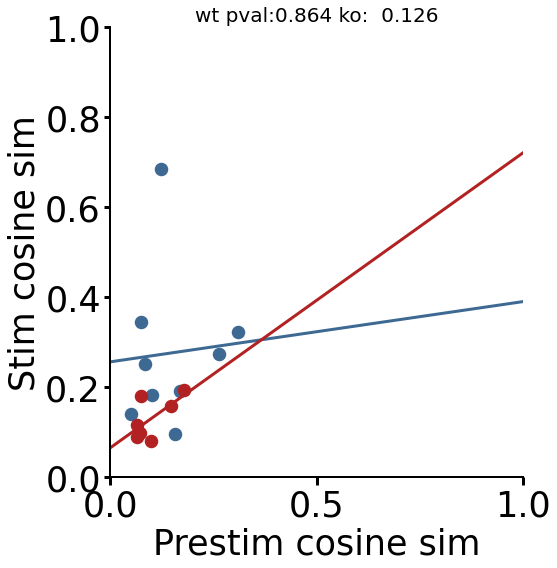

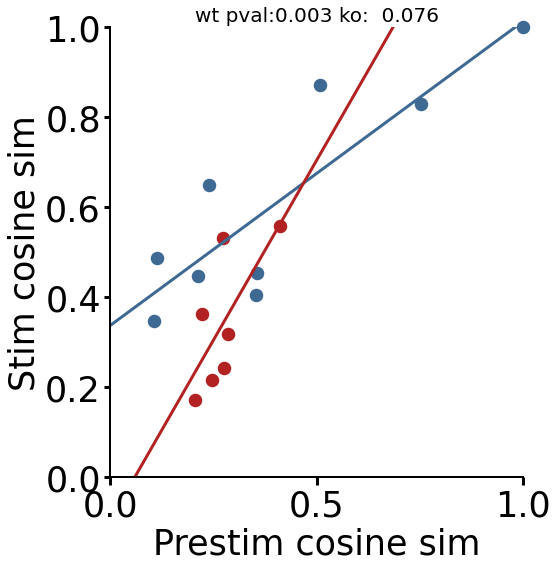

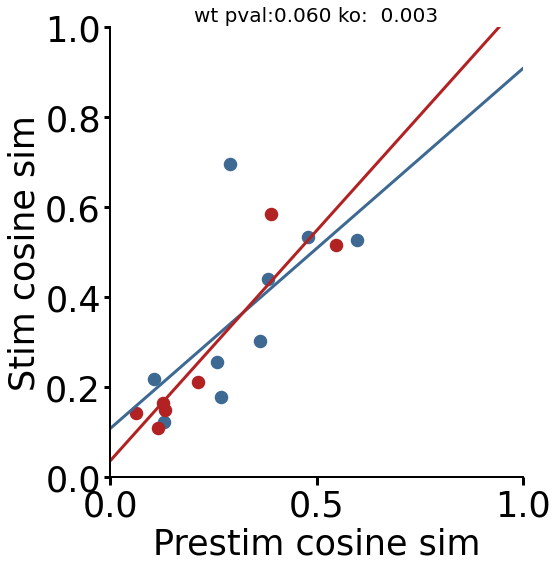

In [112]:
def corr_cosin_simt(parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="threshold", neurons="all"):
    wt_prestim_sim,ko_prestim_sim, wt_stim_sim,ko_stim_sim = [],[],[],[]
    act_neurons = False if neurons=="all" else neurons

    for rec in recs.values():s
        # print(rec.filename)
        if rec.filename in [6609,6611] and neurons=="drivers":
            continue
        prestim_sim = get_mean_cosine_similarity(rec, parameter, estimator=estimator, exc_neurons=exc_neurons, inh_neurons=inh_neurons, detected_trials=detected_trials, undetected_trials=undetected_trials, stim_ampl=stim_ampl,window="pre_stim",act_neurons=act_neurons)
        stim_sim = get_mean_cosine_similarity(rec, parameter, estimator=estimator, exc_neurons=exc_neurons, inh_neurons=inh_neurons, detected_trials=detected_trials, undetected_trials=undetected_trials, stim_ampl=stim_ampl,window="stim",act_neurons=act_neurons)
        if rec.genotype == "WT":
            wt_prestim_sim.append(prestim_sim)
            wt_stim_sim.append(stim_sim)
        elif rec.genotype == "KO-Hypo":
            ko_prestim_sim.append(prestim_sim)
            ko_stim_sim.append(stim_sim)
    title = f"corr_cosine_sim_{parameter}_{stim_ampl}_exc-{exc_neurons}_inh-{inh_neurons}_det-{detected_trials}_undet-{undetected_trials}_{neurons}_neurons"
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    ax.set_facecolor("white")
    ax.spines[["right", "top"]].set_visible(False)
    ax.scatter(wt_prestim_sim,wt_stim_sim,color=ppt.wt_color,lw=3,marker="o",s=110,clip_on=False)
    reg = LinearRegression().fit(np.array(wt_prestim_sim).reshape(-1, 1),wt_stim_sim)
    y_pred = reg.predict(np.linspace(0,1,30).reshape(-1, 1))
    x=np.linspace(0,1,30)
    ax.plot(x,y_pred,color=ppt.wt_color,lw=3)
    ax.scatter(ko_prestim_sim,ko_stim_sim,color=ppt.hypo_color,lw=3,marker="o",s=110,clip_on=False)
    reg = LinearRegression().fit(np.array(ko_prestim_sim).reshape(-1, 1),ko_stim_sim)
    y_pred = reg.predict(np.linspace(0,1,30).reshape(-1, 1))
    ax.plot(x,y_pred,color=ppt.hypo_color,lw=3,)
    sstst, pvalwt = ss.pearsonr(wt_prestim_sim,wt_stim_sim)
    sstst, pvalko = ss.pearsonr(ko_prestim_sim,ko_stim_sim)
    print(ss.pearsonr(wt_prestim_sim,wt_stim_sim))
    print(ss.pearsonr(ko_prestim_sim,ko_stim_sim))
    ax.set_xlabel("Prestim cosine sim")
    ax.set_ylabel("Stim cosine sim")
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    ax.set_title(f"wt pval:{pvalwt :.3f} ko: {pvalko: .3f}")
    fig.tight_layout()
    fig.savefig(server_address+"Figure2/cosine_similarity/"+title+".pdf")
parameter = "zscore" 
corr_cosin_simt(parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="threshold", neurons="all")
corr_cosin_simt(parameter, estimator="Mean", exc_neurons=True, inh_neurons=True, detected_trials=True, undetected_trials=False, stim_ampl="threshold", neurons="all")
corr_cosin_simt(parameter, estimator="Mean", exc_neurons=True, inh_neurons=True, detected_trials=False, undetected_trials=True, stim_ampl="threshold", neurons="all")


In [121]:
def cosine_sim_plot(parameter, window="stim", estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="threshold", neurons="all",save_array=False):
    cos_sim_wt = []
    cos_sim_ko = []
    
    act_neurons = False if neurons=="all" else neurons

    for rec in recs.values():
        print(rec.filename)
        if rec.filename in [6609,6611] and neurons=="drivers":
            continue
        mean_cos_sim = get_mean_cosine_similarity(rec, parameter, estimator=estimator, exc_neurons=exc_neurons, inh_neurons=inh_neurons, detected_trials=detected_trials, undetected_trials=undetected_trials, stim_ampl=stim_ampl,window=window,act_neurons=act_neurons)
        
        if rec.genotype == "WT":
            cos_sim_wt.append(mean_cos_sim)
        elif rec.genotype == "KO-Hypo":
            cos_sim_ko.append(mean_cos_sim)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 8))
    ax.set_facecolor("white")
    title = f"{window}_cosine-sim_{parameter}_{stim_ampl}_exc-{exc_neurons}_inh-{inh_neurons}_det-{detected_trials}_undet-{undetected_trials}_{neurons}_neurons"
    marker = True if detected_trials else False
    colors = [ppt.wt_color, ppt.hypo_color] if detected_trials else [ppt.wt_light_color, ppt.hypo_light_color]
    st.boxplot(ax, cos_sim_wt, cos_sim_ko, "Cosine similarity",title=title, ylim=[0, 1.1],det_marker=marker,colors = colors)
    fig.tight_layout()
    fig.savefig(server_address+"Figure2/cosine_similarity/"+title+".pdf")
    if save_array:
        np.save(server_address+"Figure2/cosine_similarity/cosine_sim.npy",[cos_sim_wt,cos_sim_ko])
        # json_cosine_save = {"WT":list(cos_sim_wt),"KO-Hypo":list(cos_sim_ko)}
        # with open(server_address+"Figure2/cosine_similarity/cosine_sim.json", "w") as jsn:
        #     json.dump(json_cosine_save, jsn)

# Save the array for correlation between cosine similarity and performance in the frame model

5889
6601
4939
5893
5886
4456
6611
5873
5881
5879
4754
5890
4745
6606
6609
5896
4445
4756
Boxplot plotting.
--- Cosine similarity ---
ShapiroResult(statistic=0.8516334295272827, pvalue=0.07766950130462646)
ShapiroResult(statistic=0.7013816833496094, pvalue=0.00383826089091599)
MannwhitneyuResult(statistic=60.0, pvalue=0.0012237762237762239)


/datas/Théo/Spikesorting/venv/Spikesorting2/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


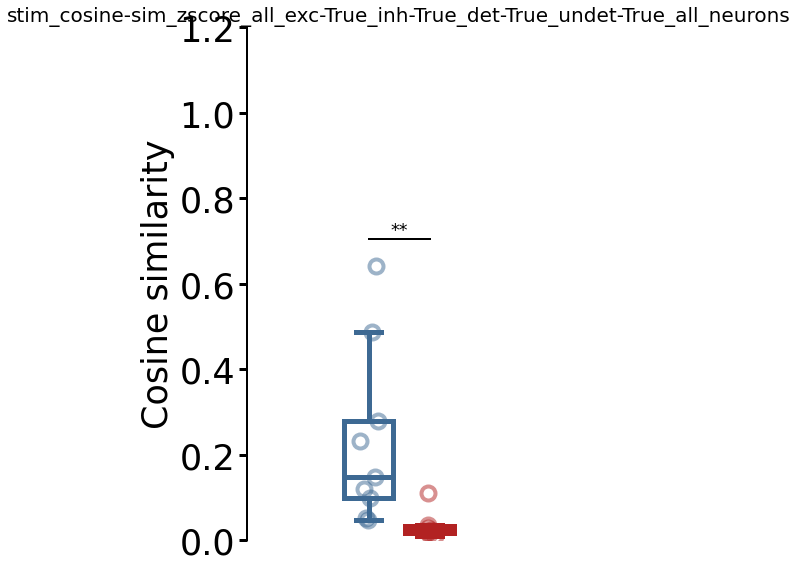

In [122]:
cosine_sim_plot(window="stim", parameter="zscore", estimator="Mean", exc_neurons=True, inh_neurons=True, detected_trials=True, undetected_trials=True, stim_ampl="all", neurons="all", save_array=True)

5889
6601
4939
5893
5886
4456
6611
5873
5881
5879
4754
5890
4745
6606
6609
5896
4445
4756
Boxplot plotting.
--- Cosine similarity ---
ShapiroResult(statistic=0.8654846549034119, pvalue=0.10994613915681839)
ShapiroResult(statistic=0.684036135673523, pvalue=0.0024756244383752346)
MannwhitneyuResult(statistic=60.0, pvalue=0.0012237762237762239)
5889
6601
4939
5893
5886
4456
6611
5873
5881
5879
4754
5890
4745
6606
6609
5896
4445
4756
Boxplot plotting.
--- Cosine similarity ---
ShapiroResult(statistic=0.8774715662002563, pvalue=0.14766889810562134)
ShapiroResult(statistic=0.9428356289863586, pvalue=0.6643785834312439)
LeveneResult(statistic=6.127800189808504, pvalue=0.026702908788498774)
Unequal variances: Ttest_indResult(statistic=2.8037430115497335, pvalue=0.014076230771556864)
5889
6601
4939
5893
5886
4456
6611
5873
5881
5879
4754
5890
4745
6606
6609
5896
4445
4756
Boxplot plotting.
--- Cosine similarity ---
ShapiroResult(statistic=0.8320220708847046, pvalue=0.04704713076353073)
ShapiroR

/tmp/ipykernel_1111798/2918578416.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 8))


5889
6601
4939
5893
5886
4456
6611
5873
5881
5879
4754
5890
4745
6606
6609
5896
4445
4756
Boxplot plotting.
--- Cosine similarity ---
ShapiroResult(statistic=0.9005182981491089, pvalue=0.2550172805786133)
ShapiroResult(statistic=0.809422492980957, pvalue=0.05070514976978302)
LeveneResult(statistic=1.6681070590007505, pvalue=0.21742899545557542)
Equal variances :Ttest_indResult(statistic=1.2990570351719382, pvalue=0.21491217139979754)
5889
6601
4939
5893
5886
4456
6611
5873
5881
5879
4754
5890
4745
6606
6609
5896
4445
4756
Boxplot plotting.
--- Cosine similarity ---
ShapiroResult(statistic=0.9618251323699951, pvalue=0.8172203302383423)
ShapiroResult(statistic=0.841313362121582, pvalue=0.1021949052810669)
LeveneResult(statistic=0.035306256409208, pvalue=0.8536515750739568)
Equal variances :Ttest_indResult(statistic=1.1203924514863257, pvalue=0.28139898227967897)
5889
6601
4939
5893
5886
4456
6611
5873
5881
5879
4754
5890
4745
6606
6609
5896
4445
4756
Boxplot plotting.
--- Cosine similari

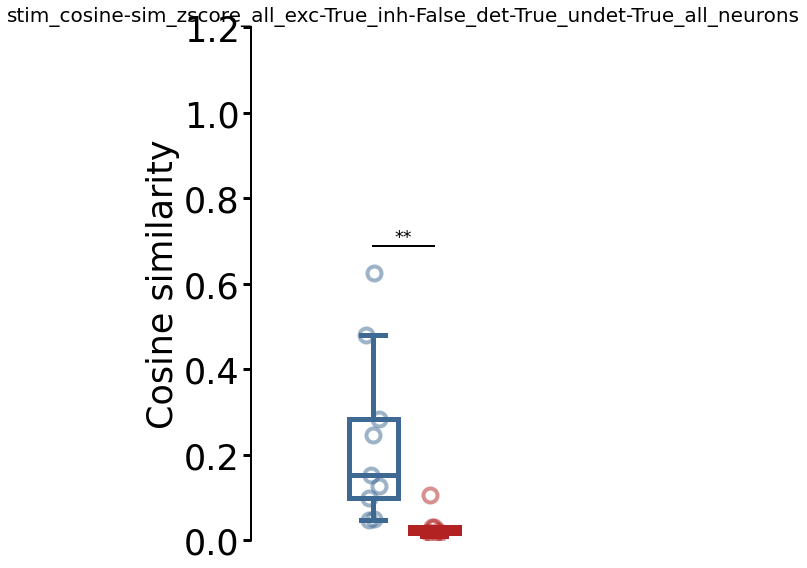

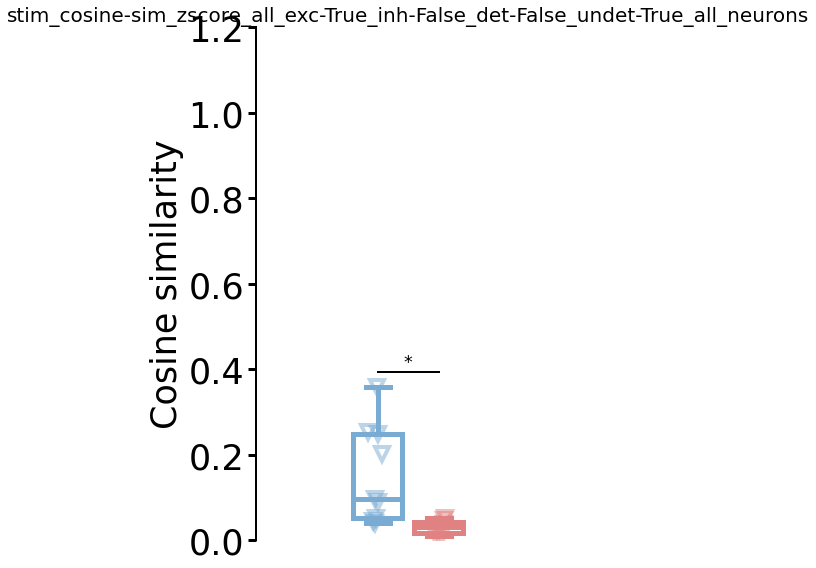

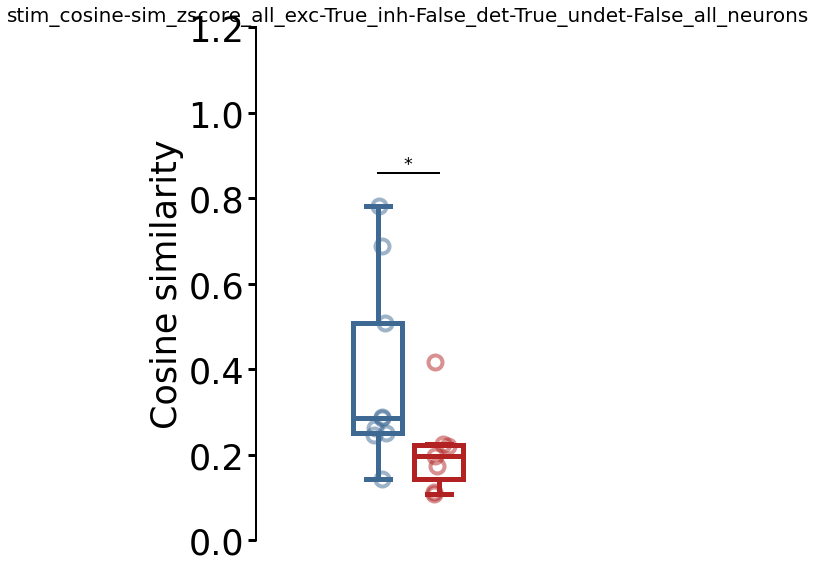

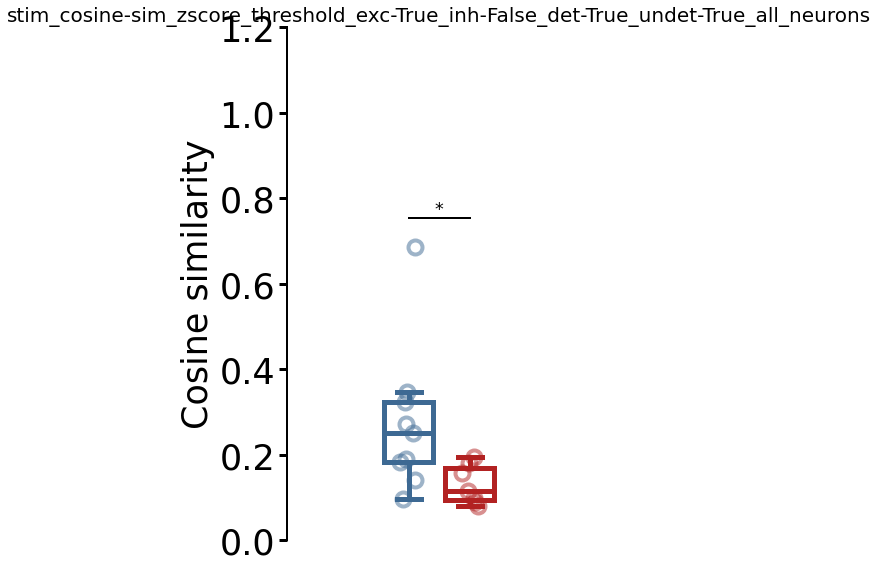

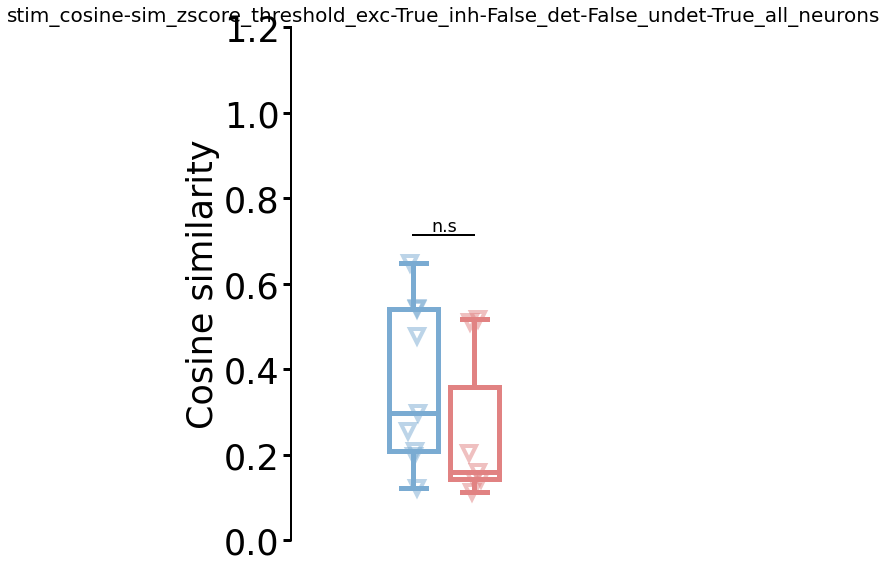

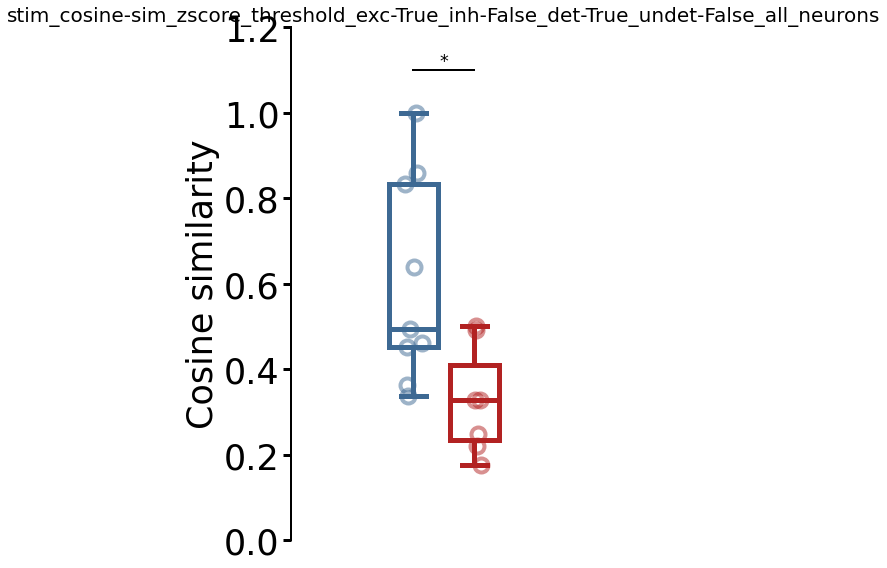

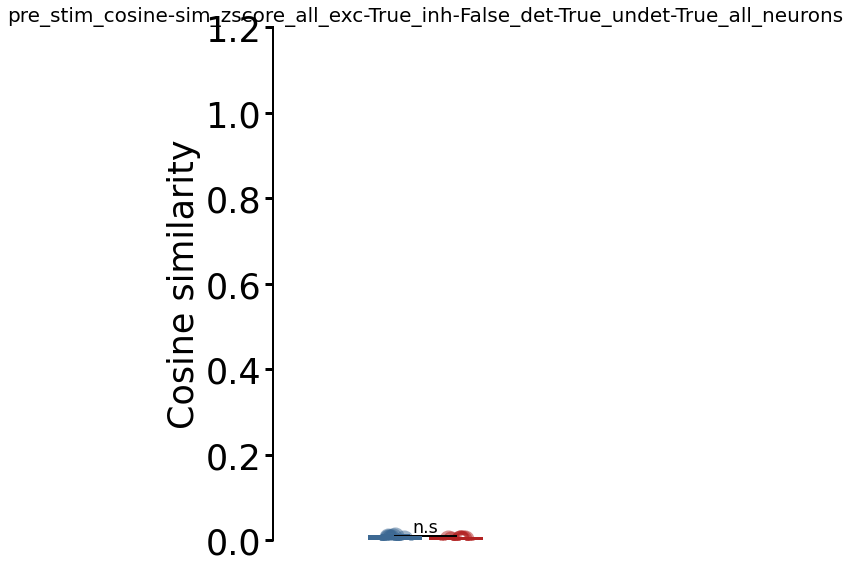

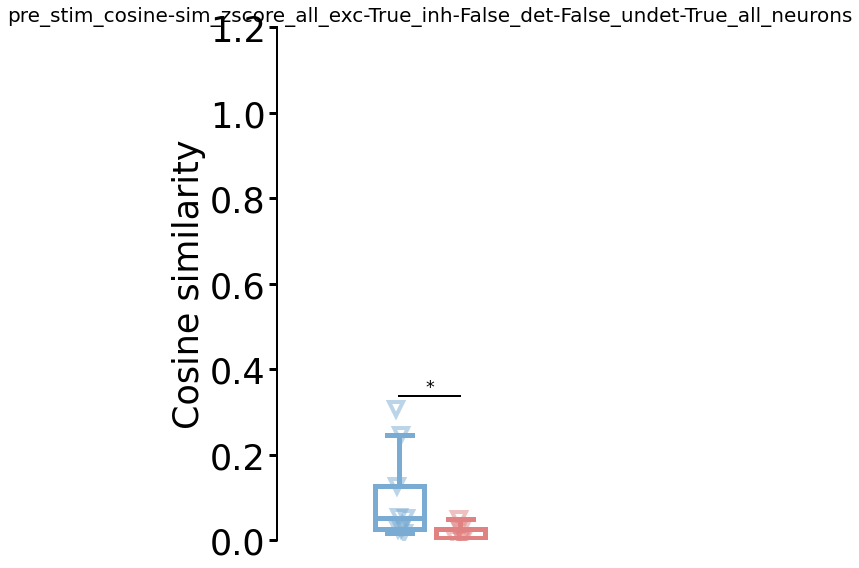

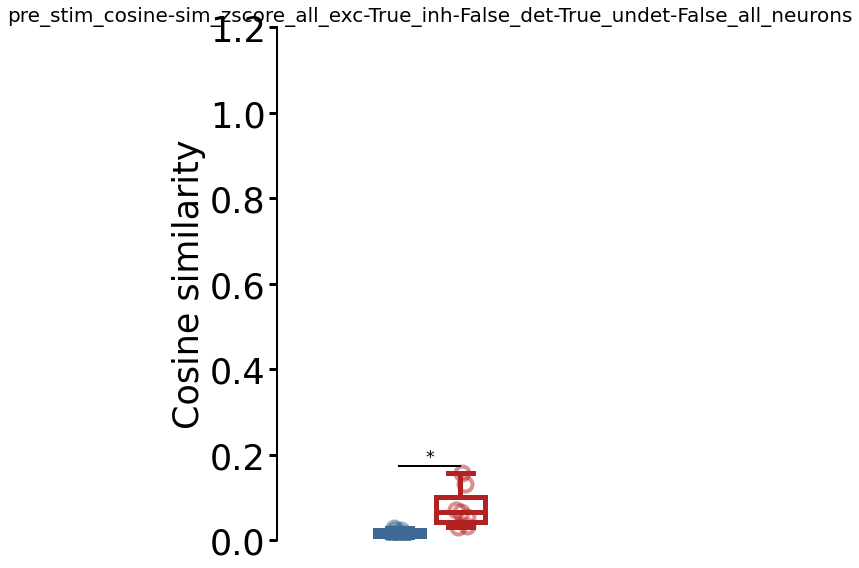

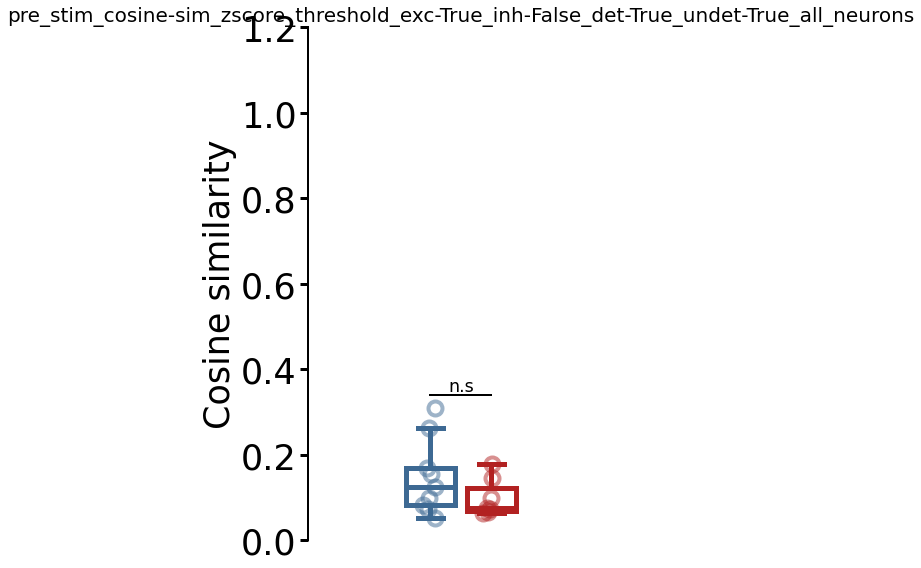

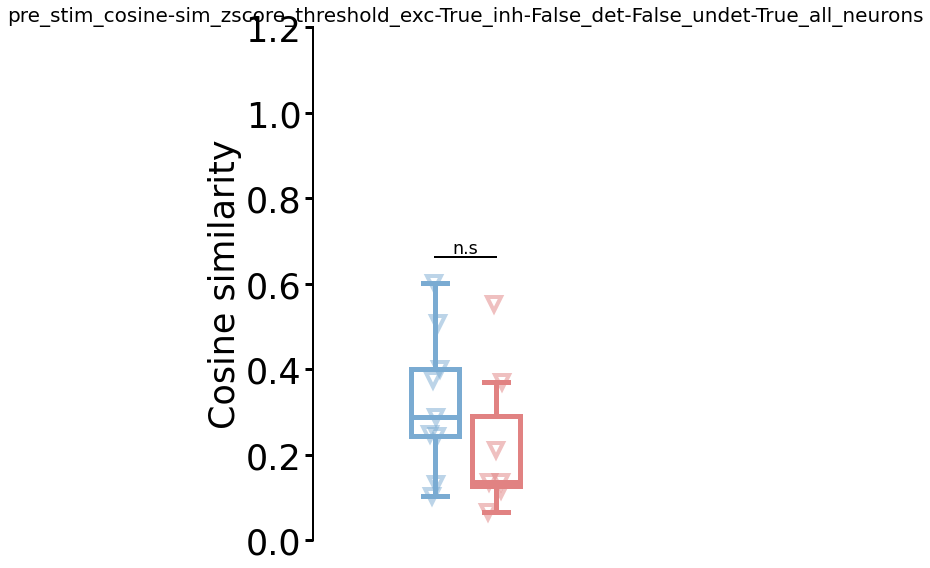

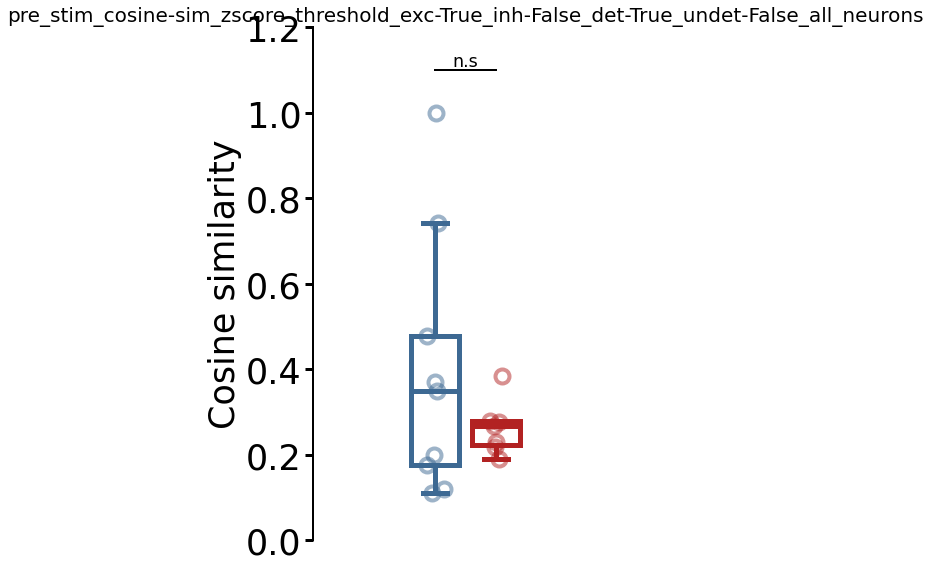

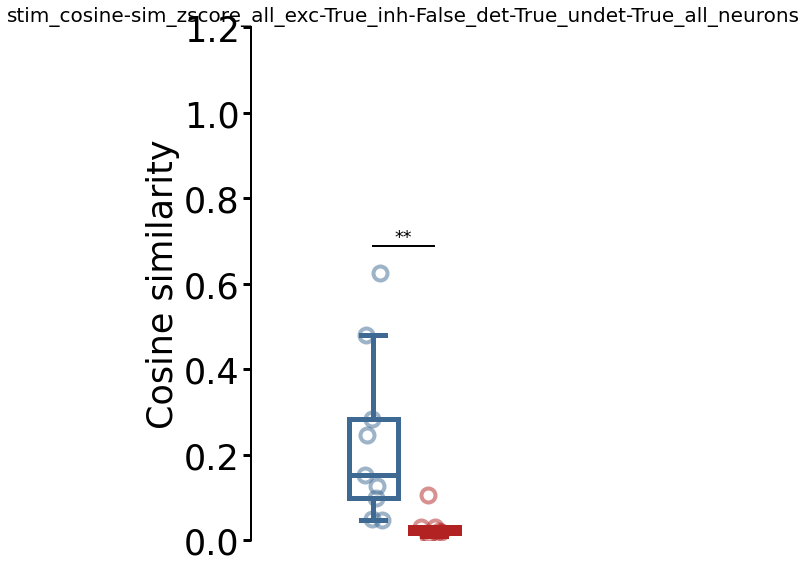

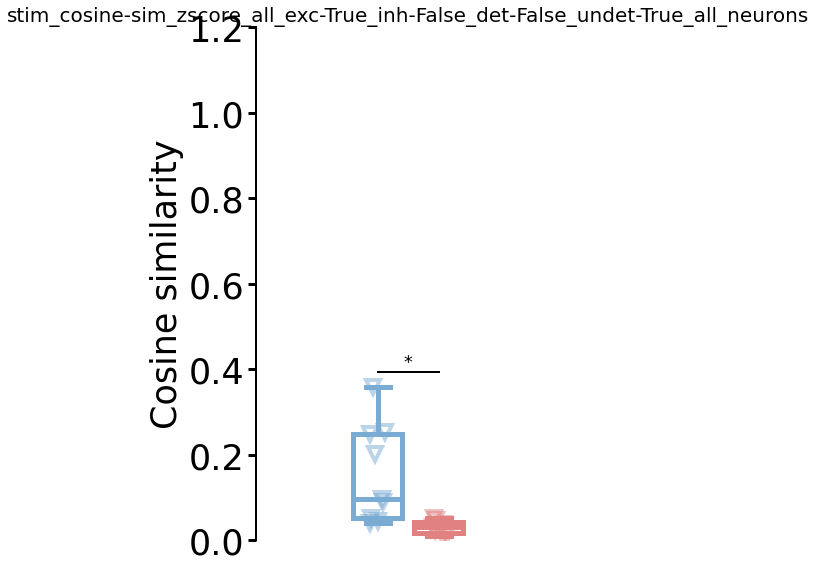

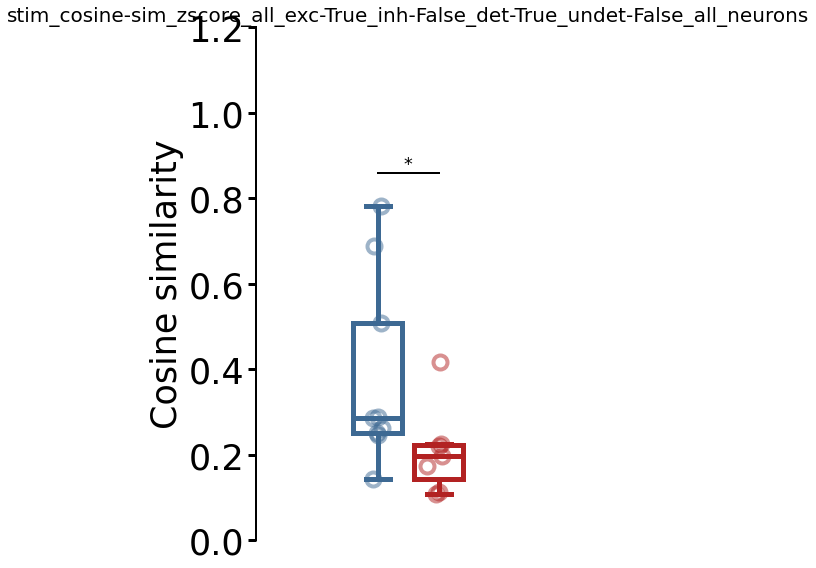

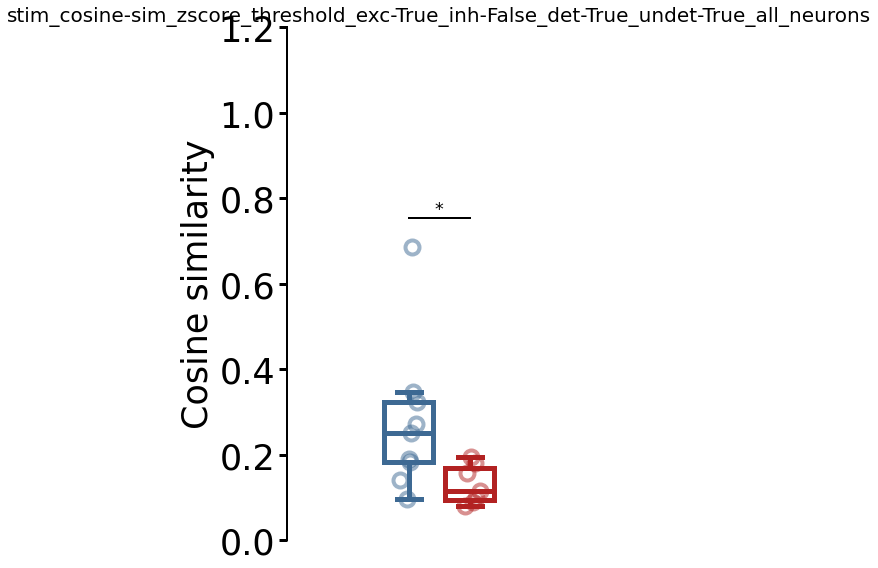

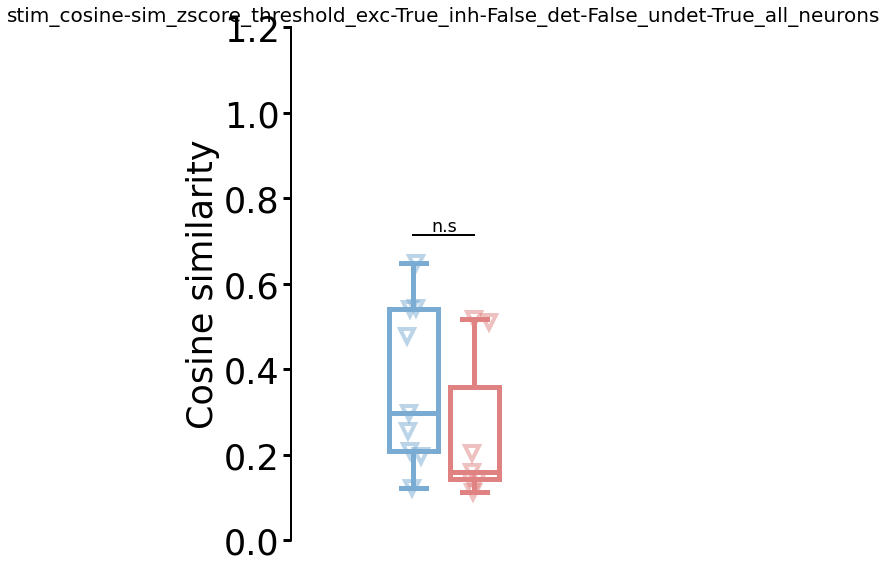

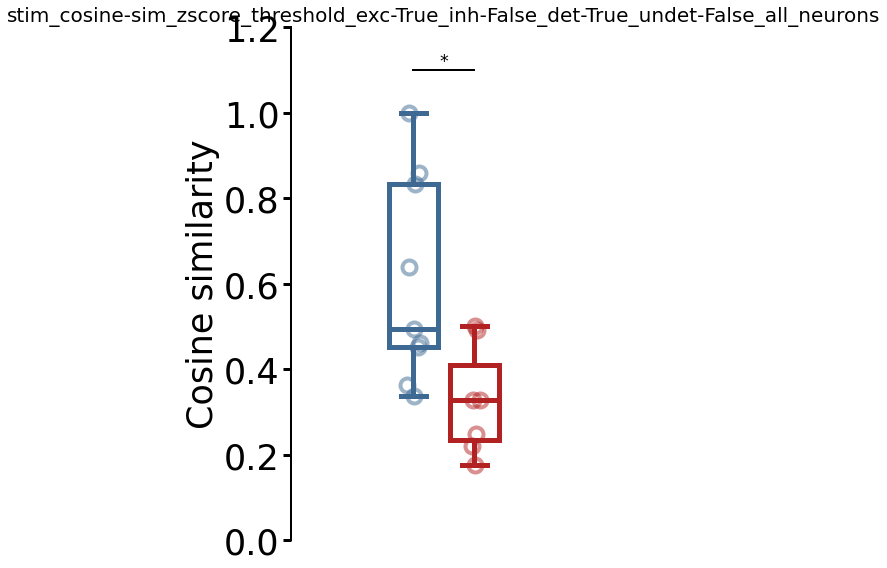

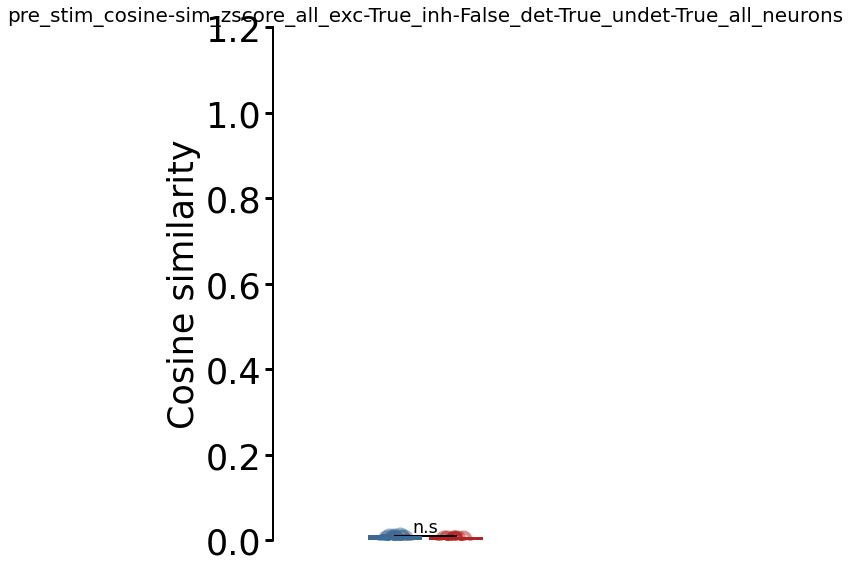

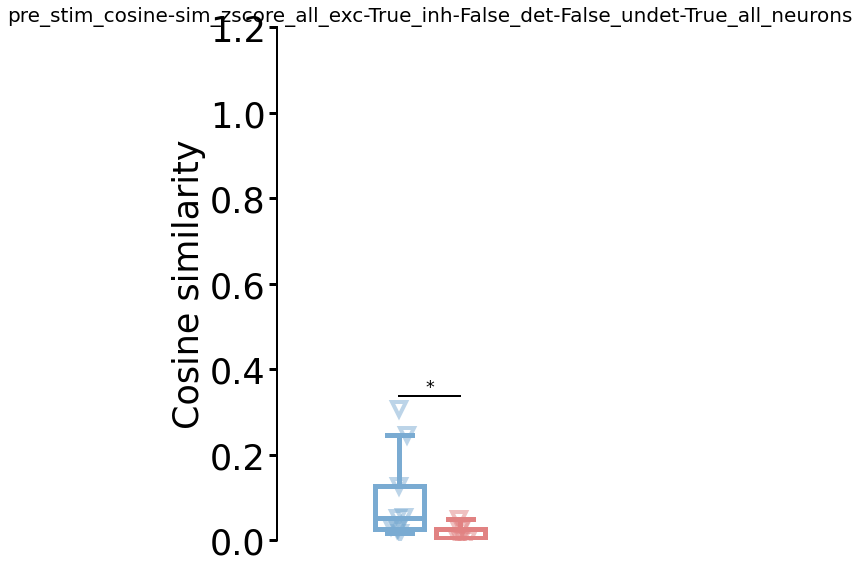

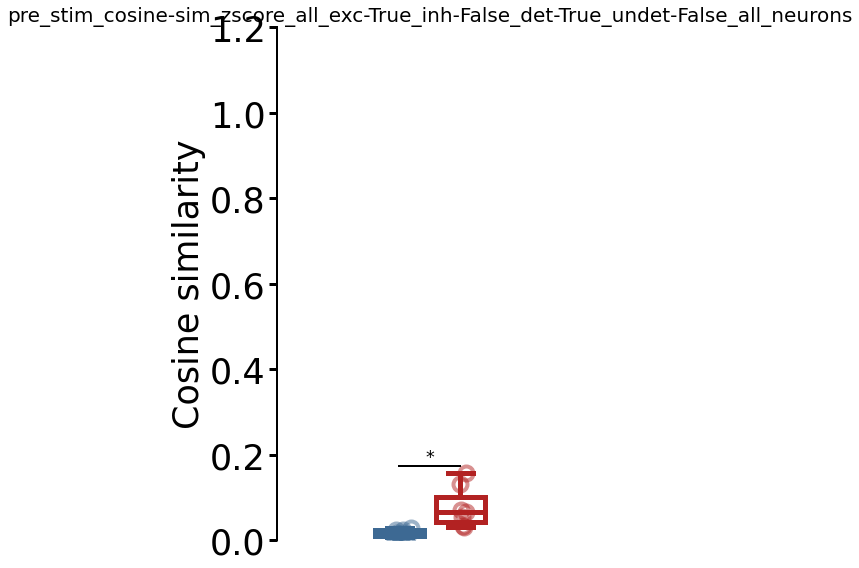

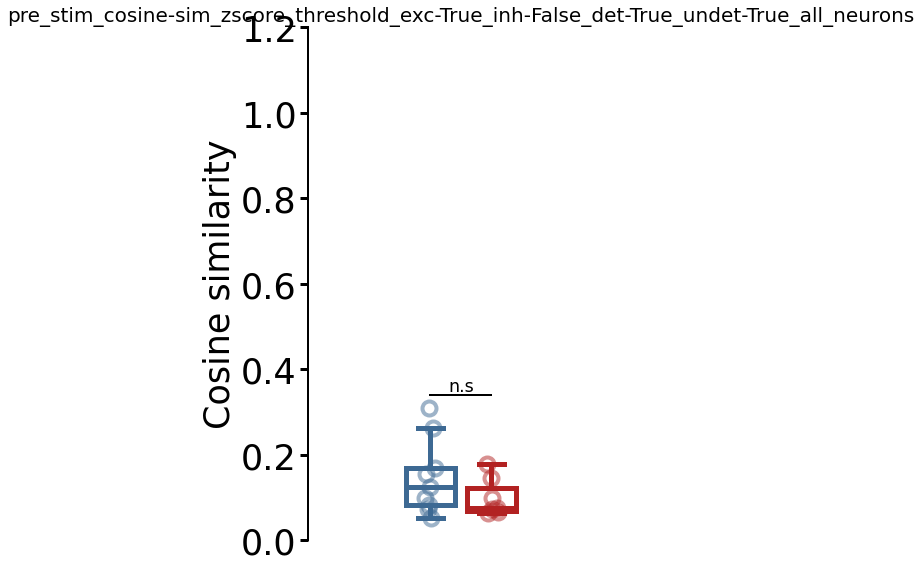

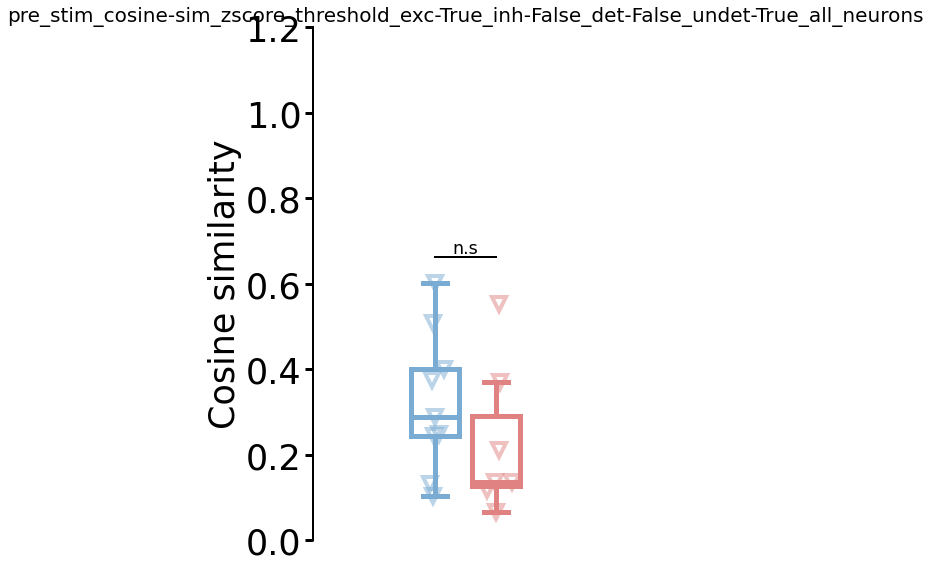

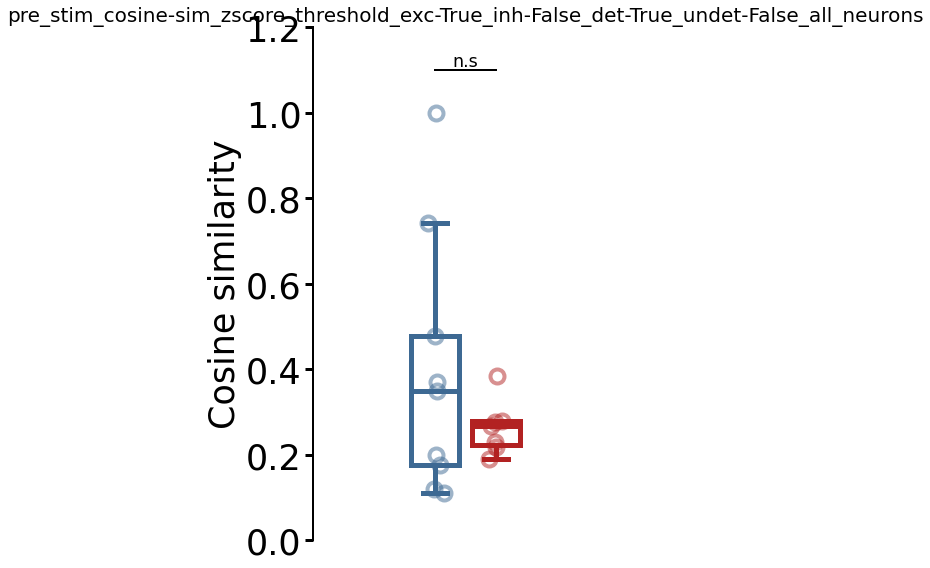

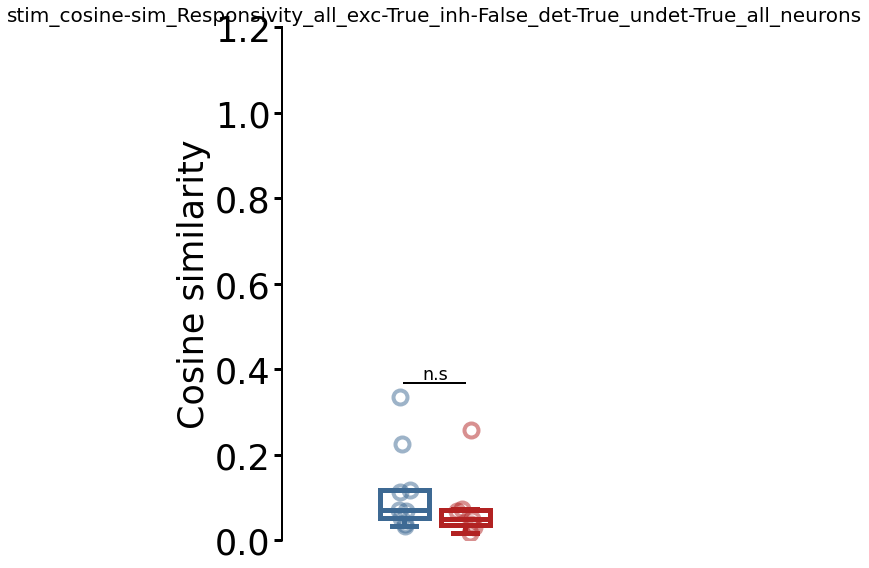

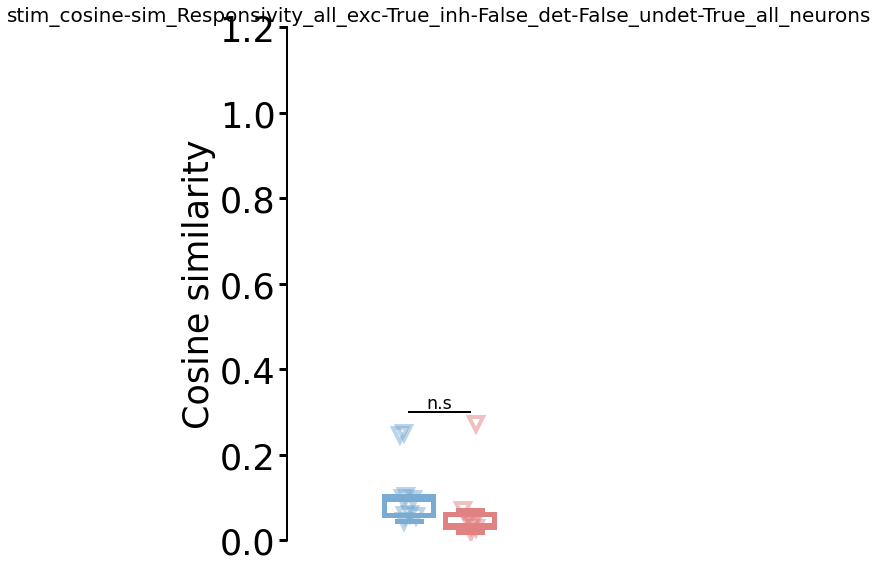

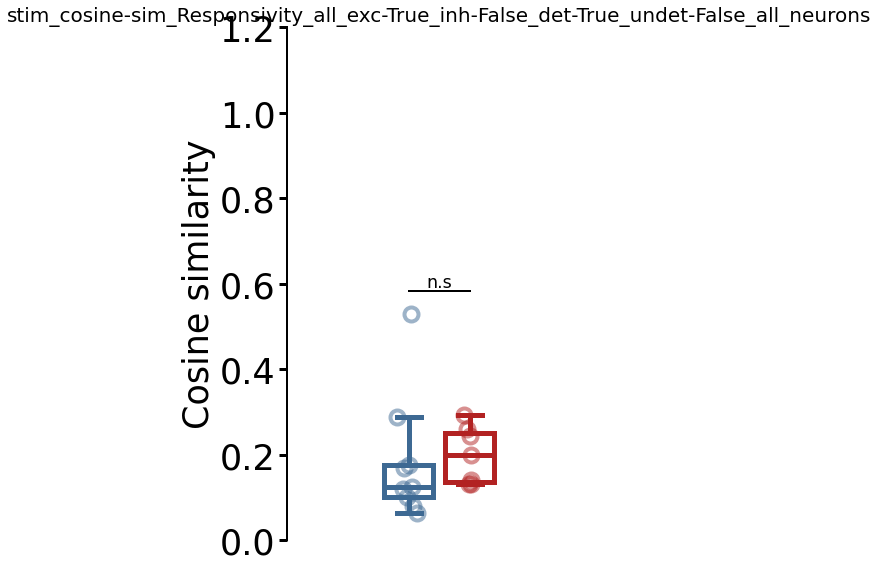

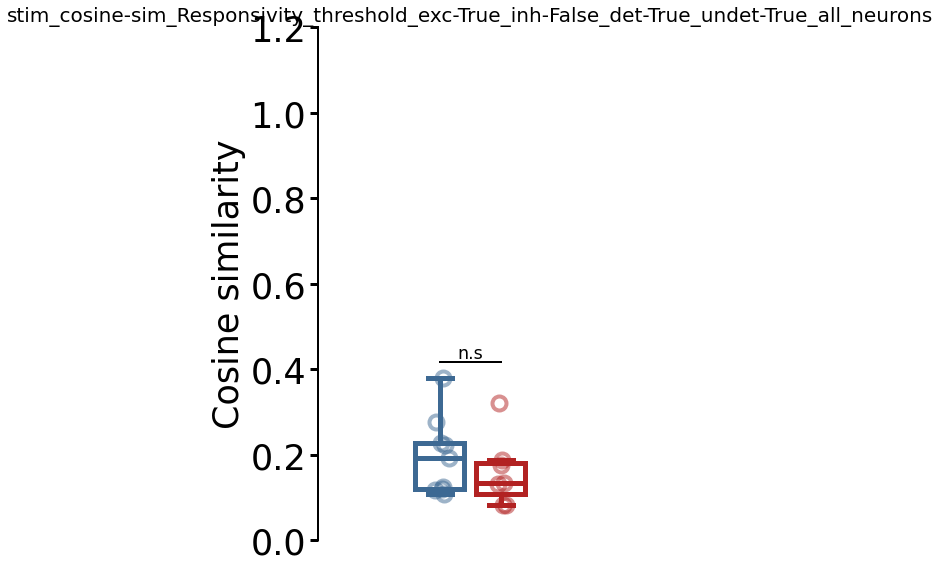

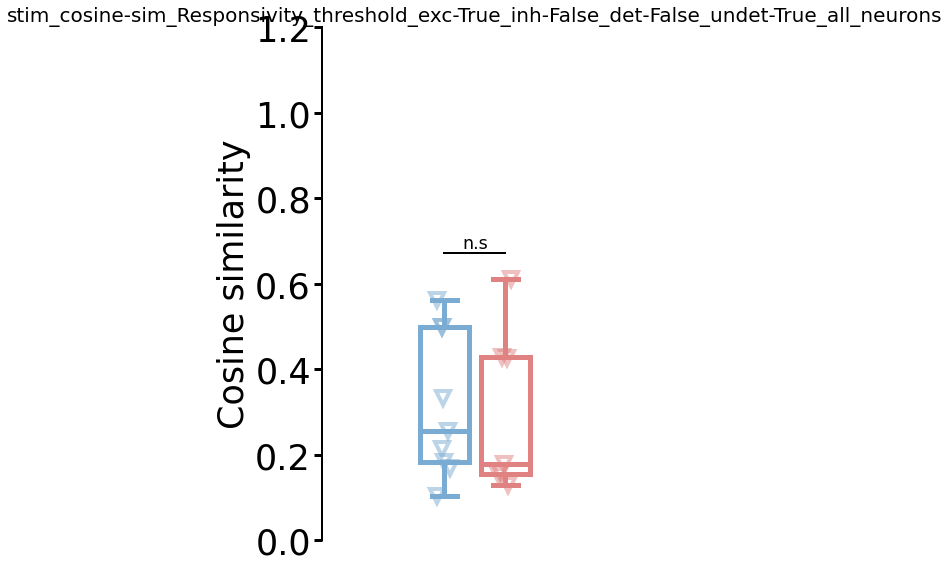

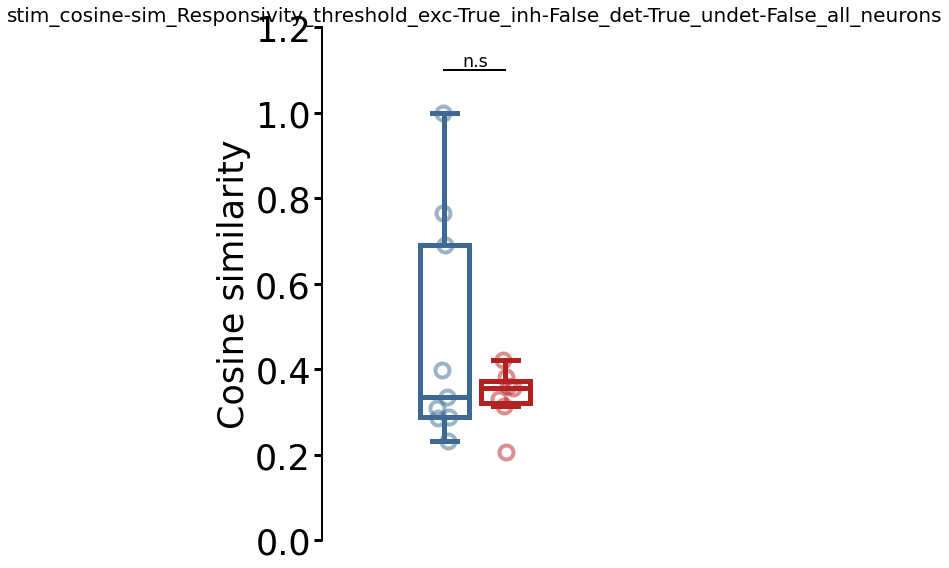

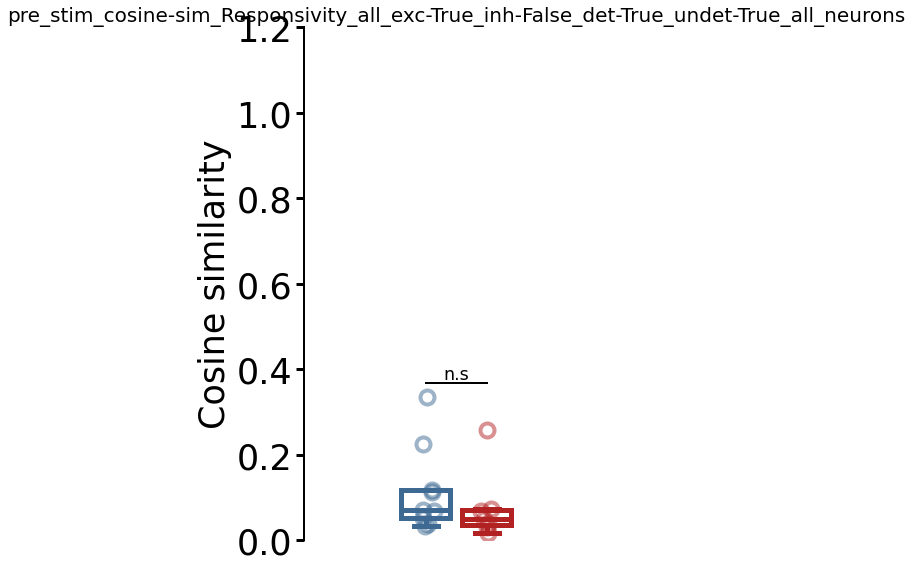

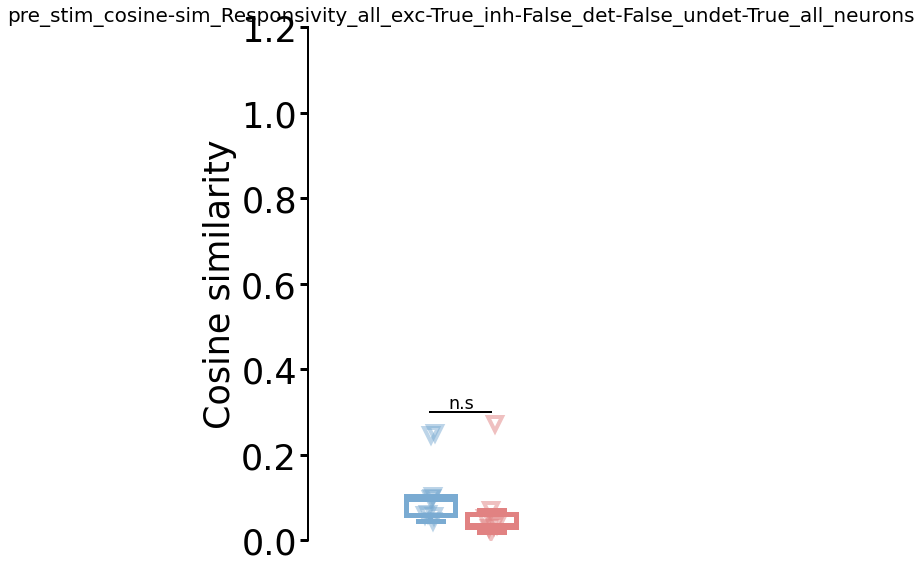

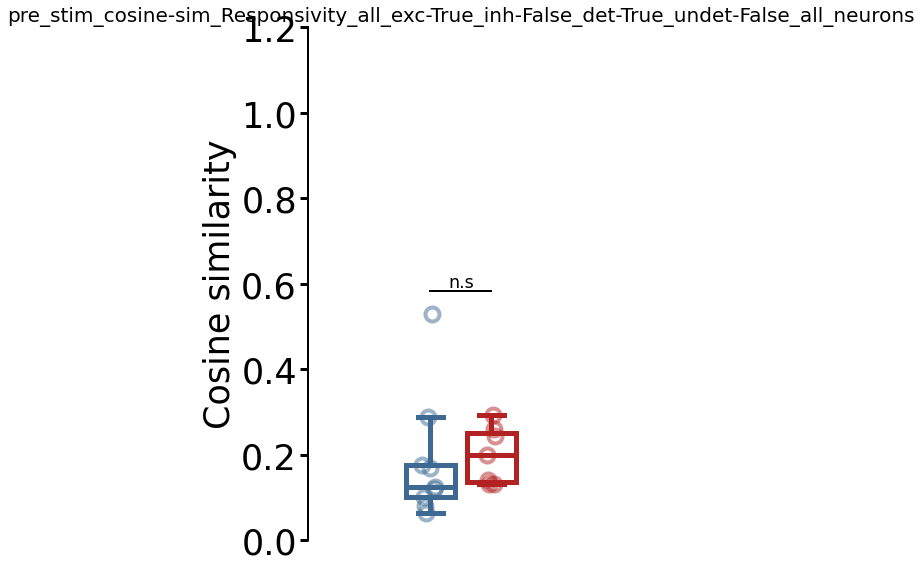

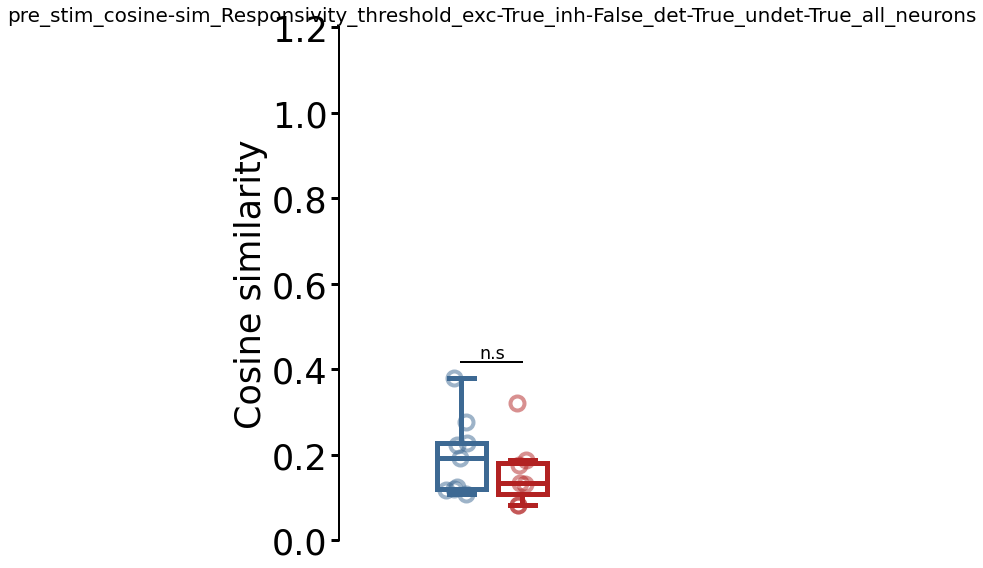

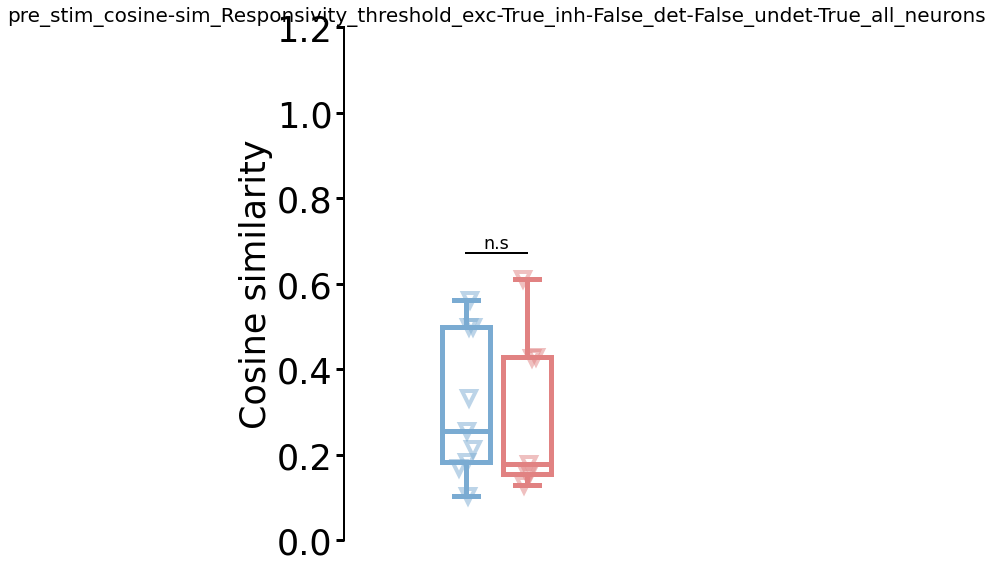

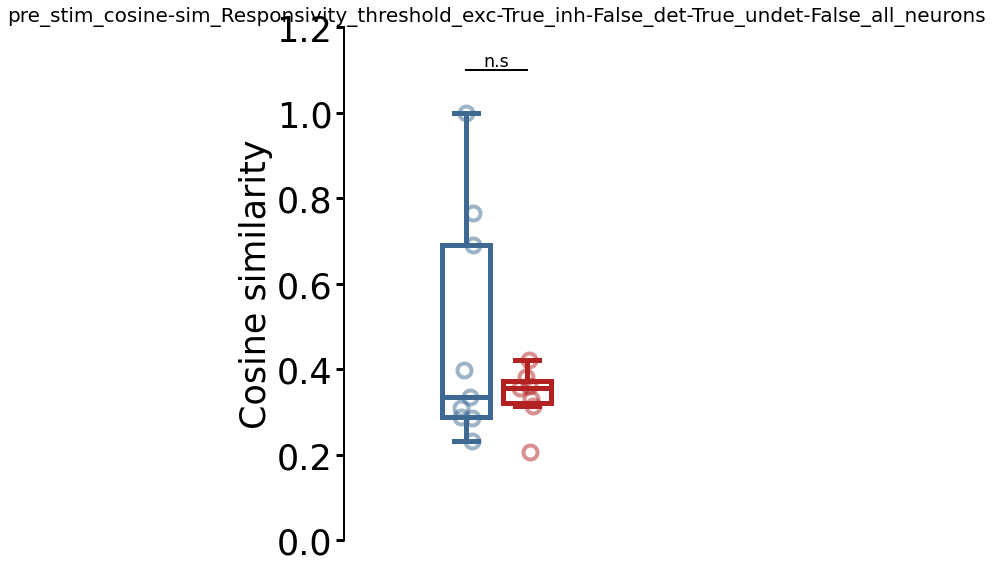

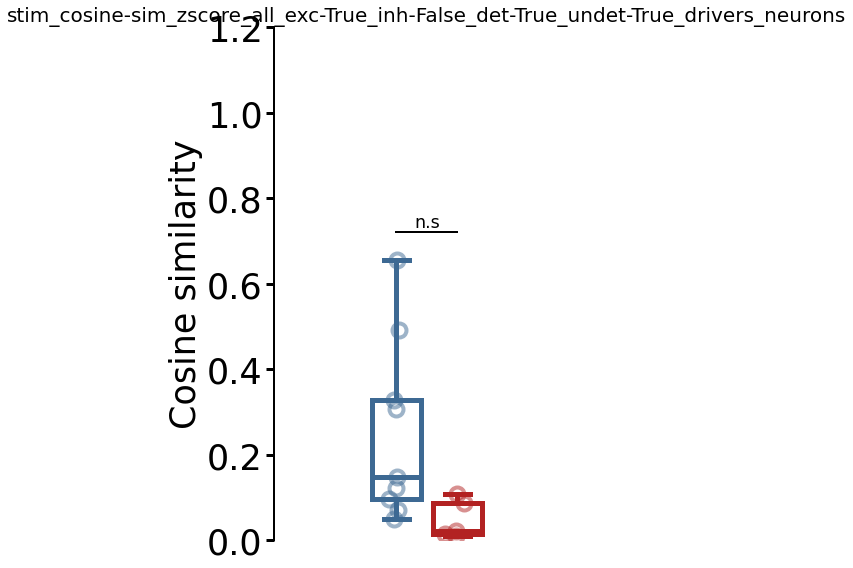

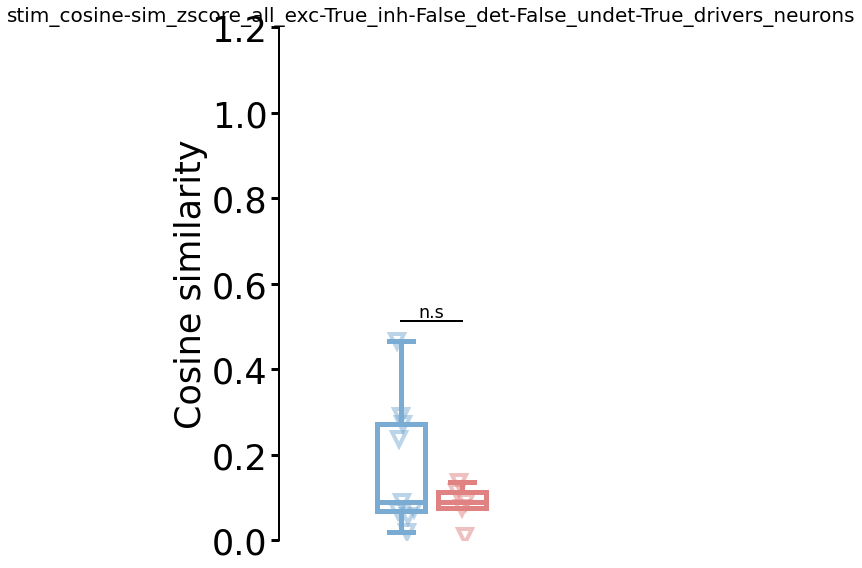

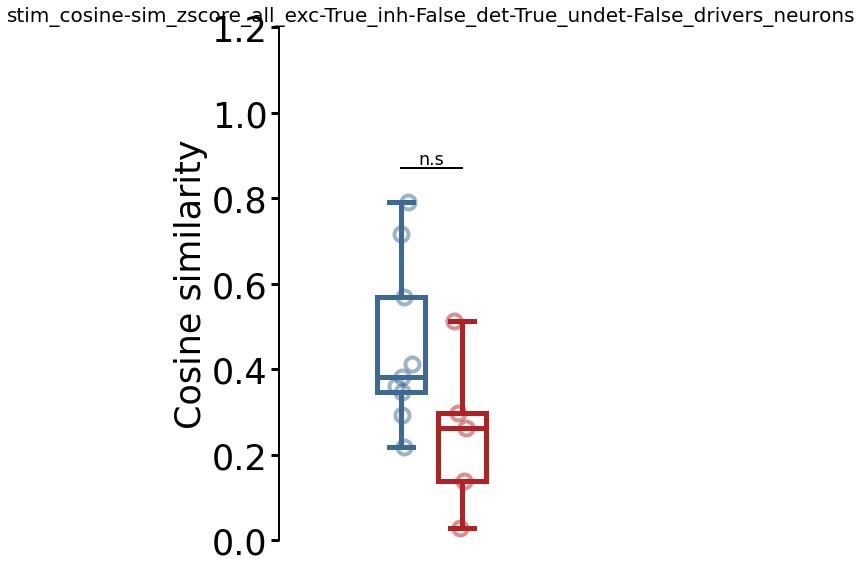

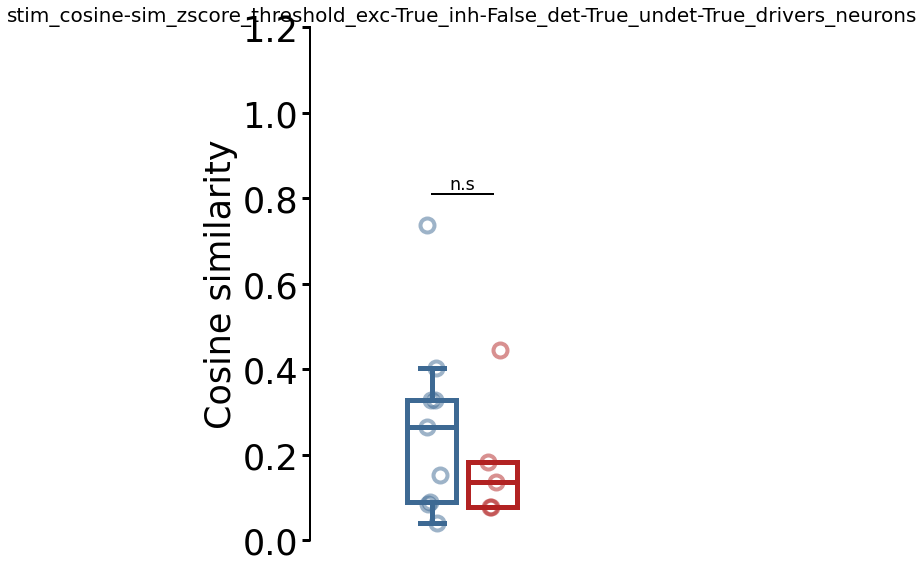

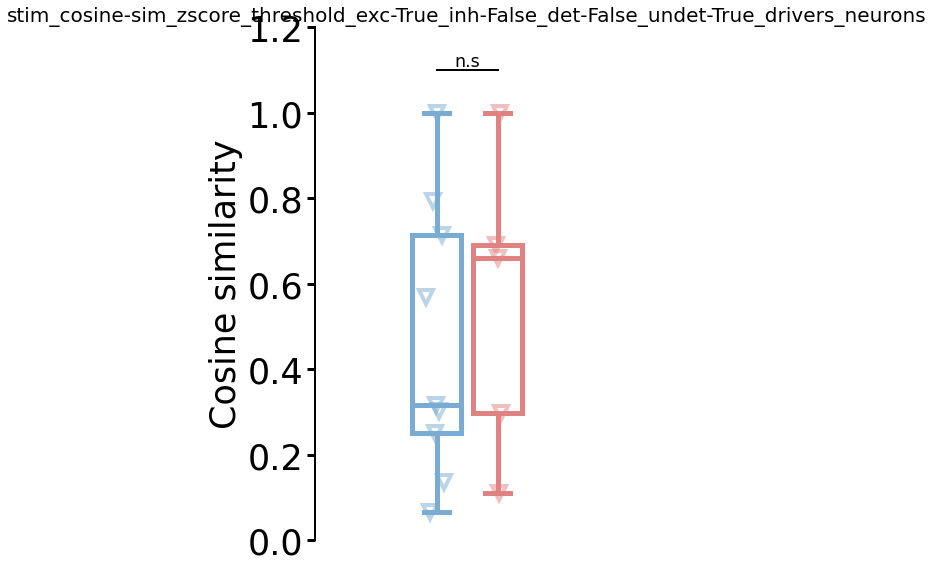

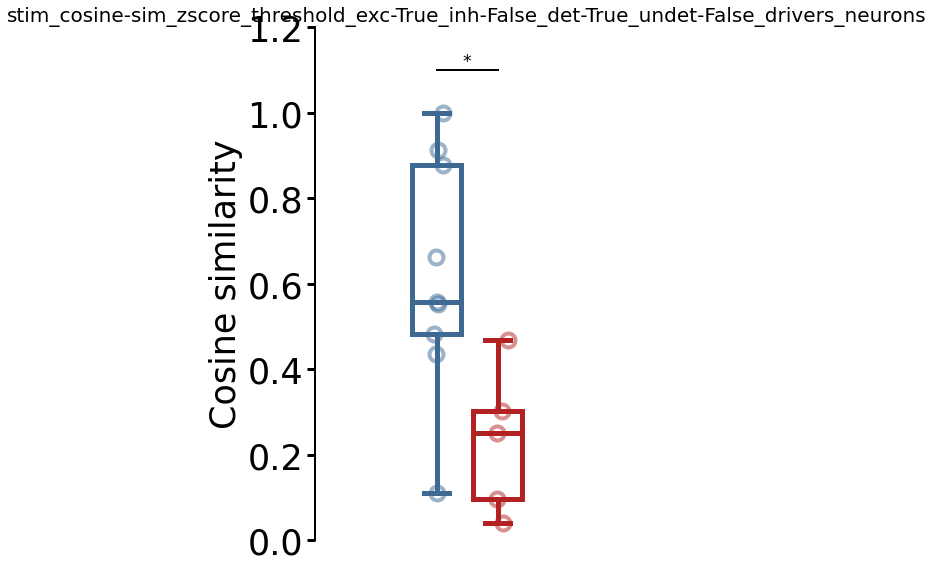

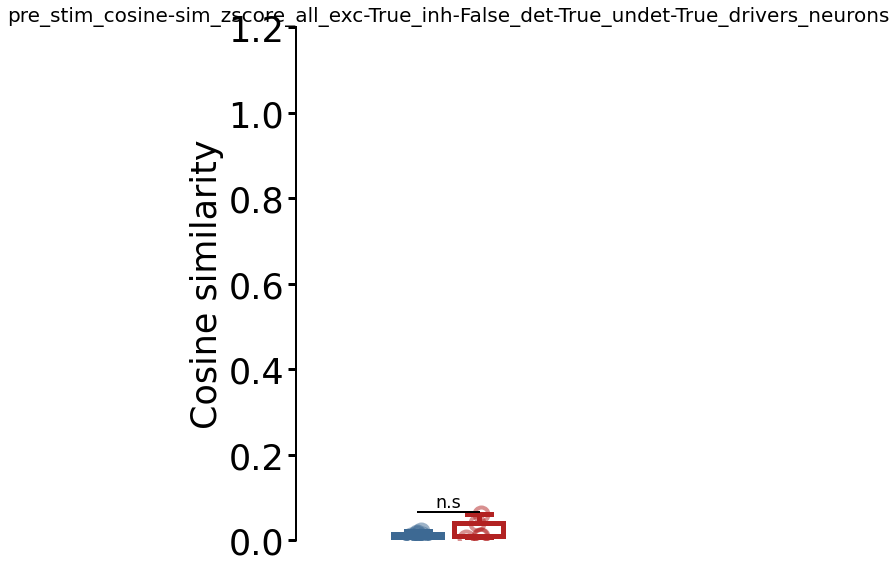

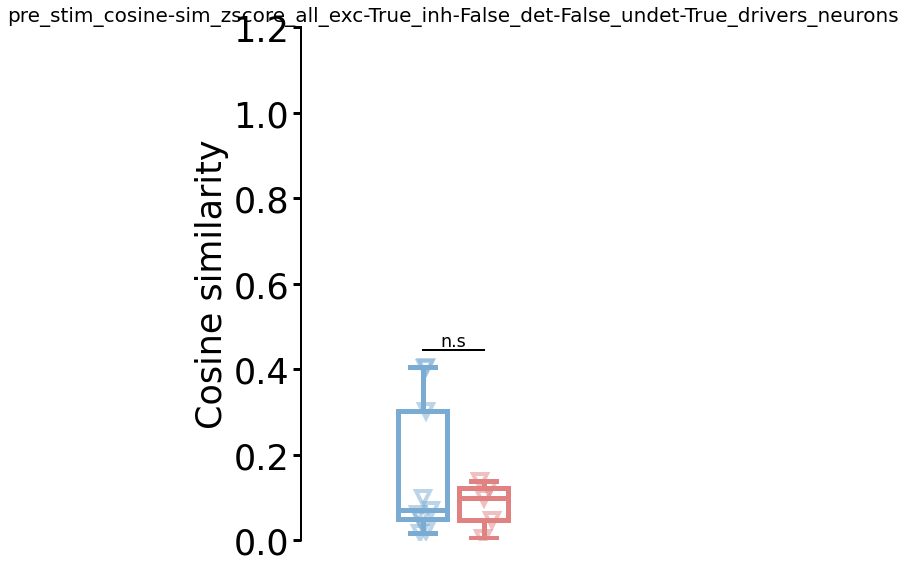

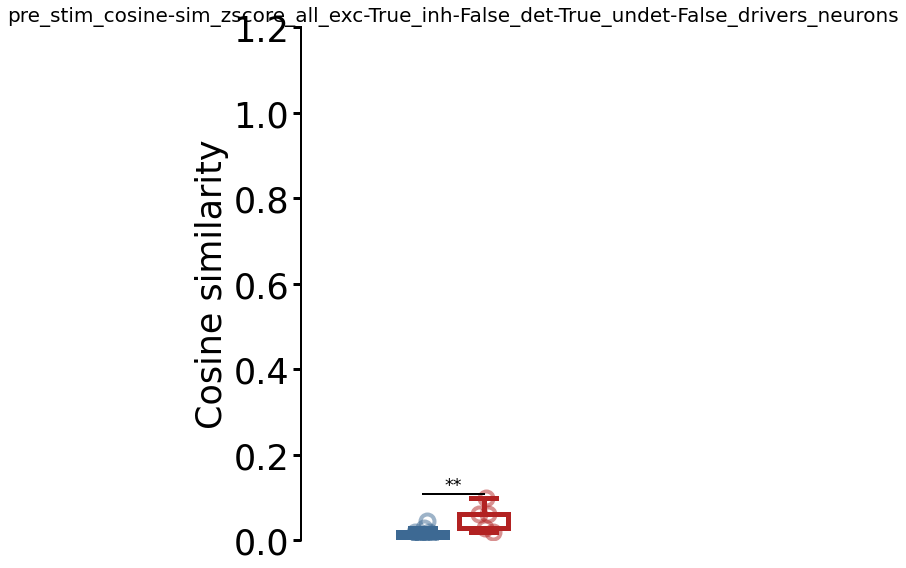

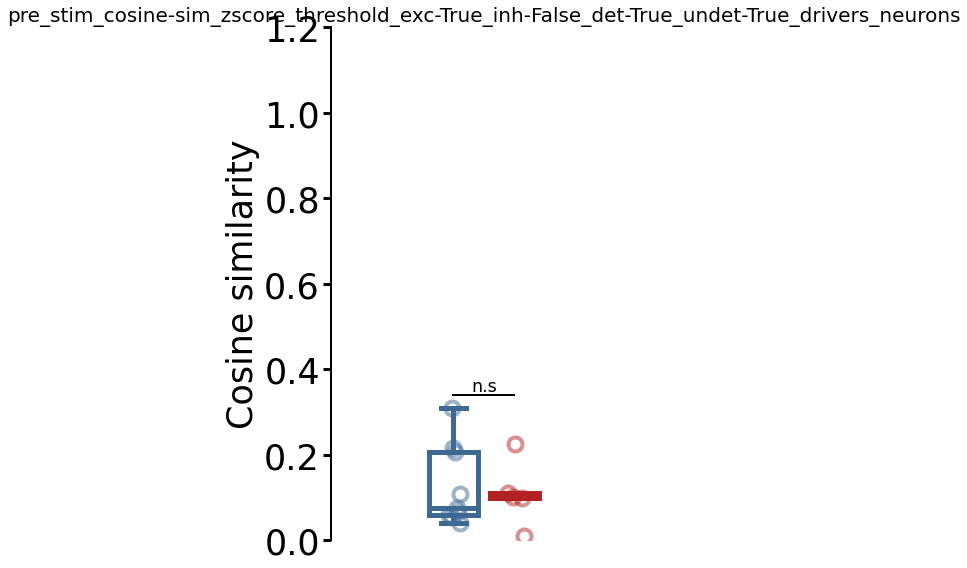

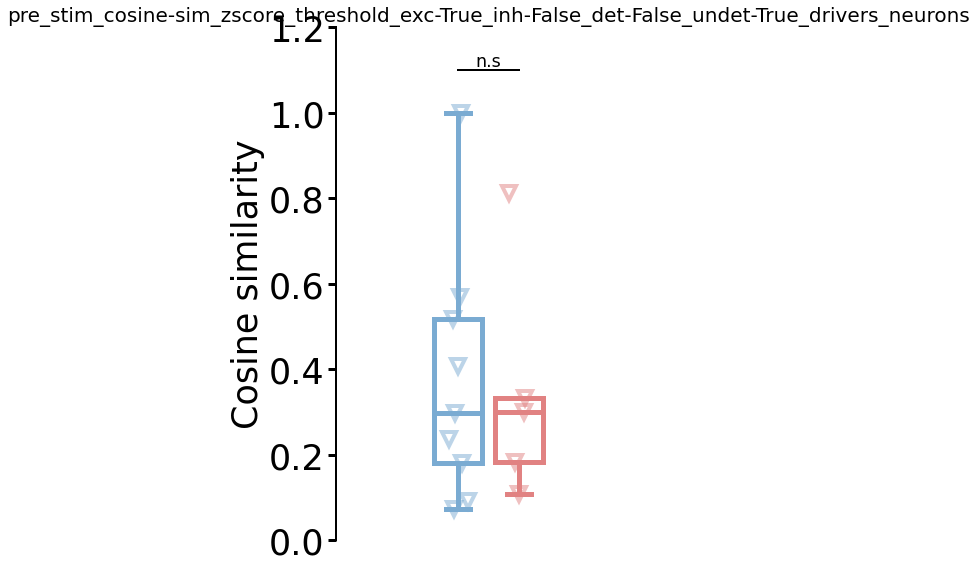

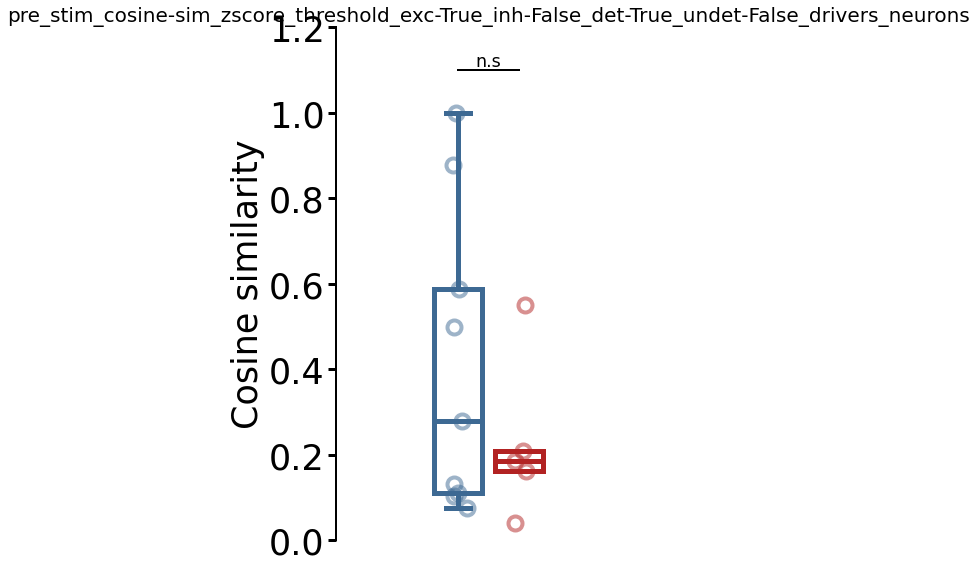

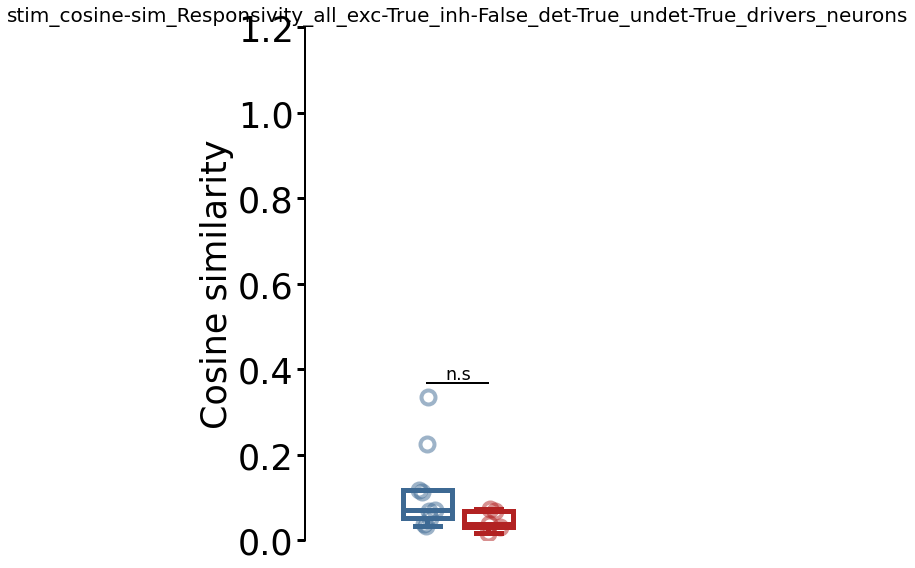

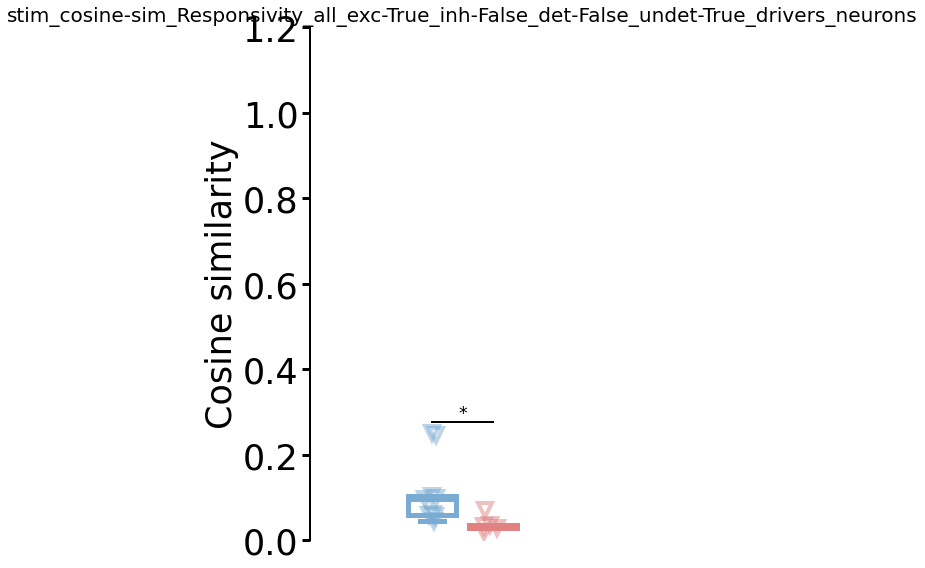

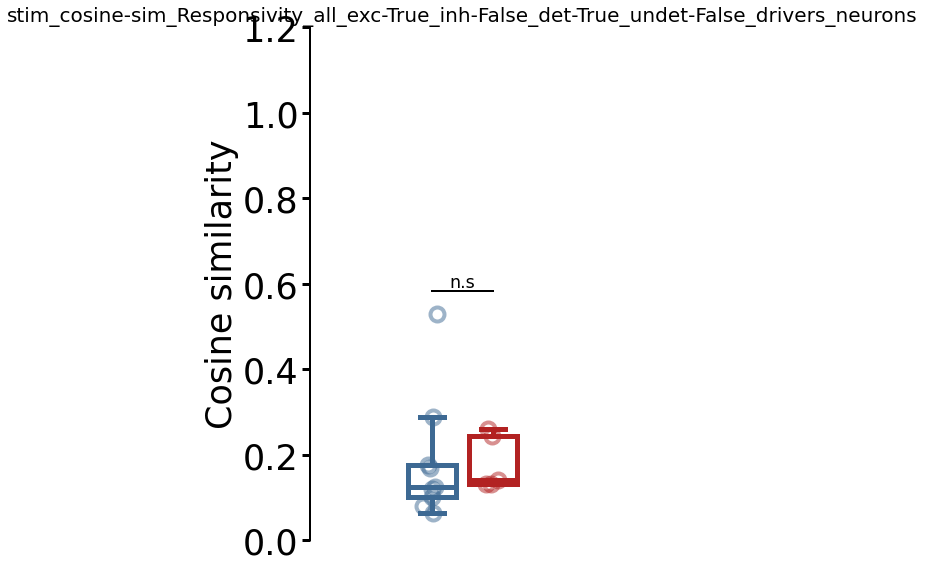

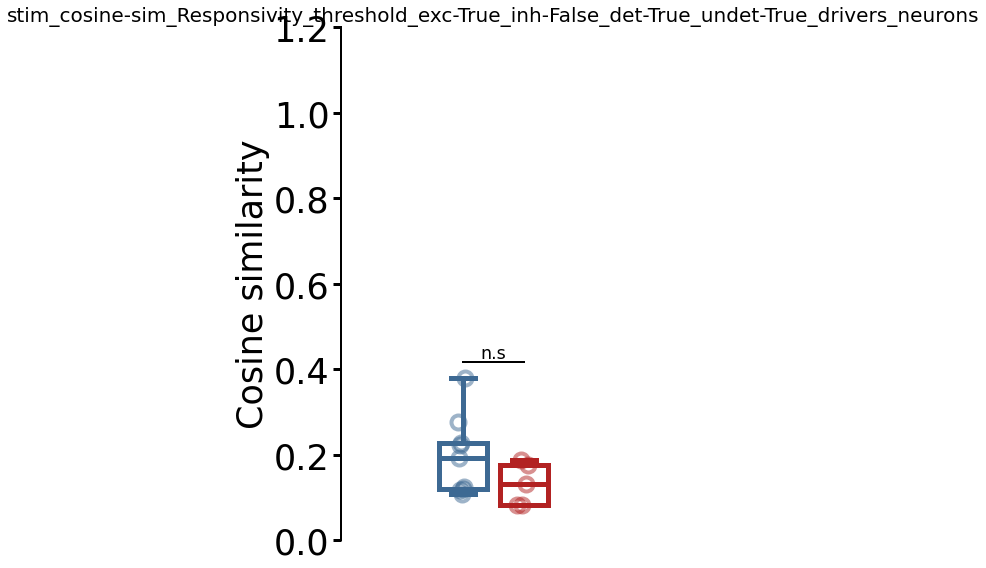

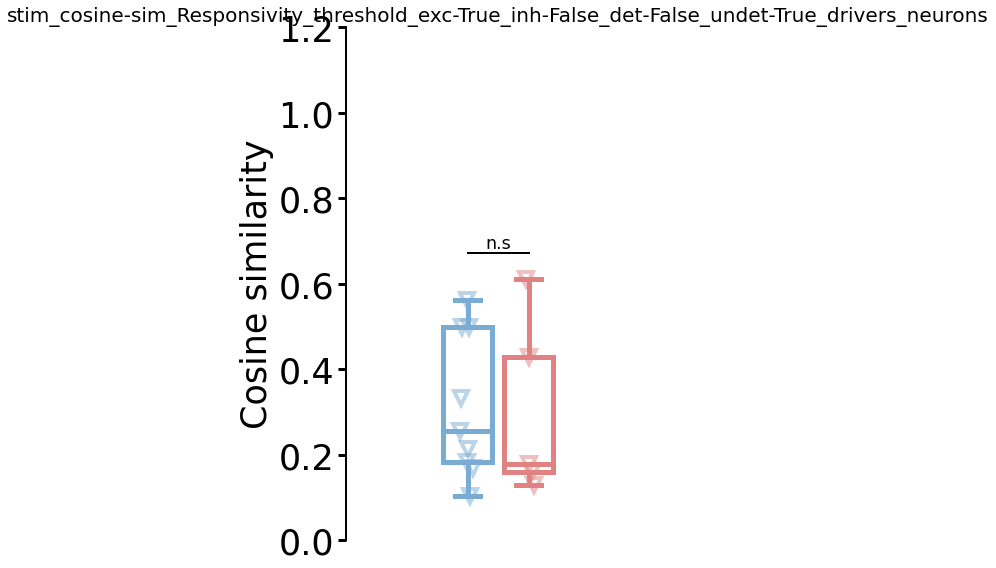

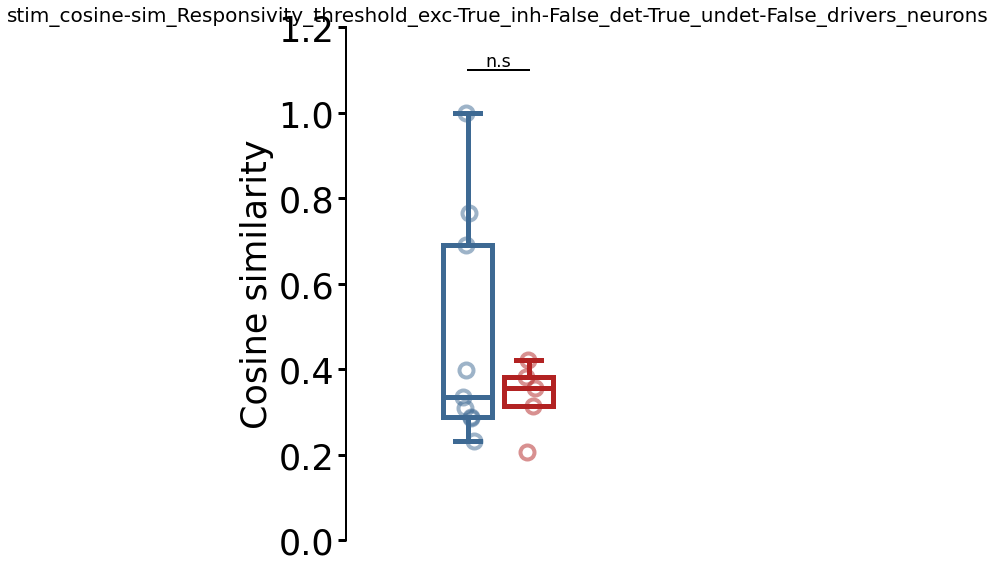

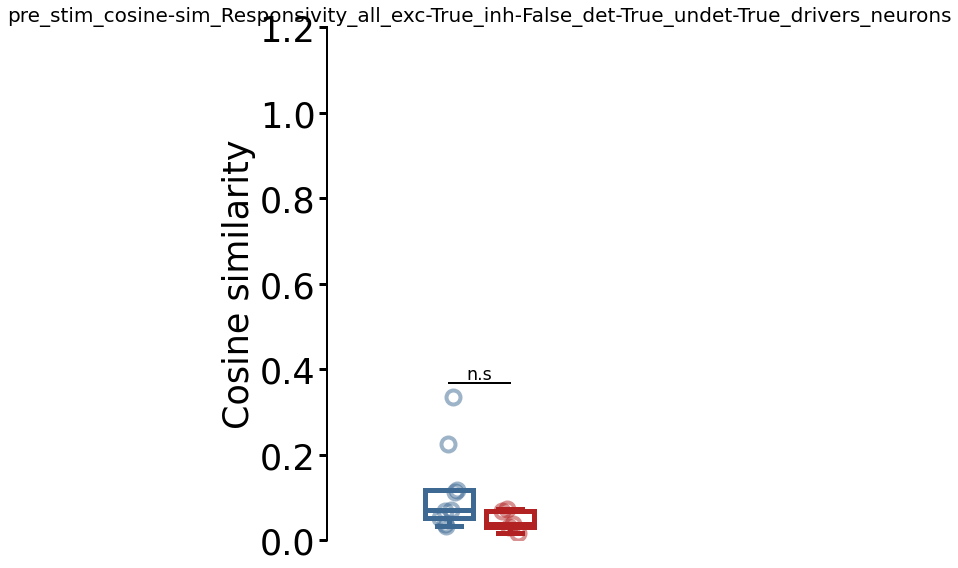

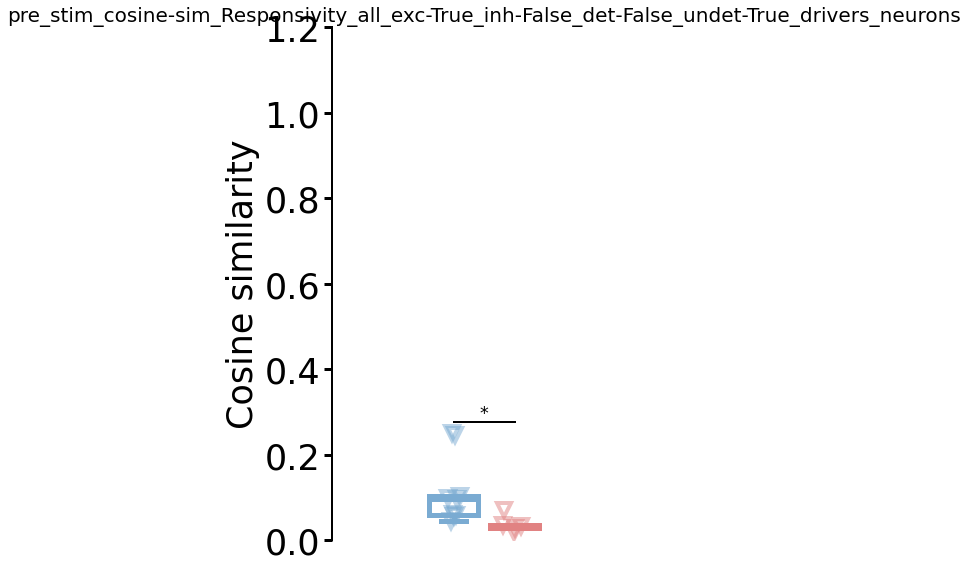

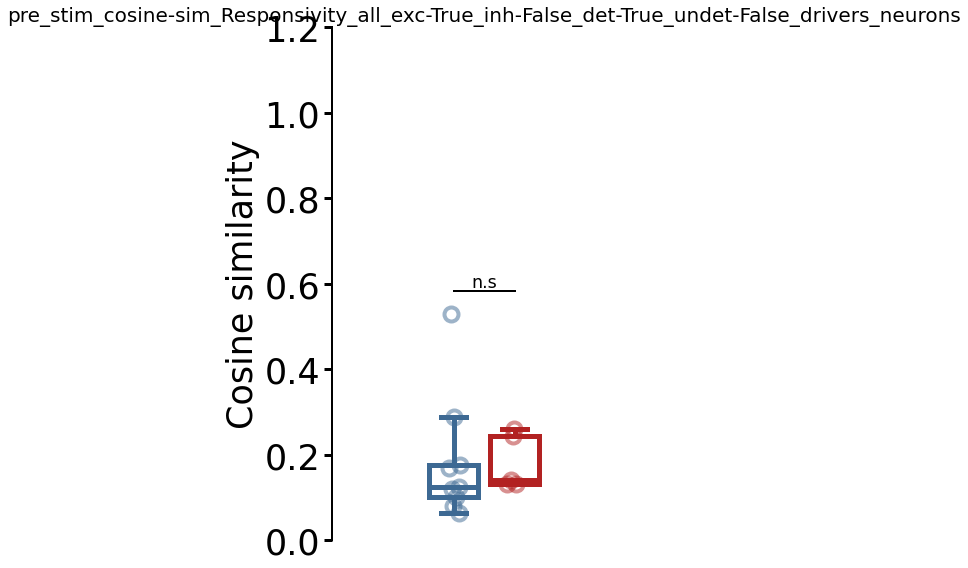

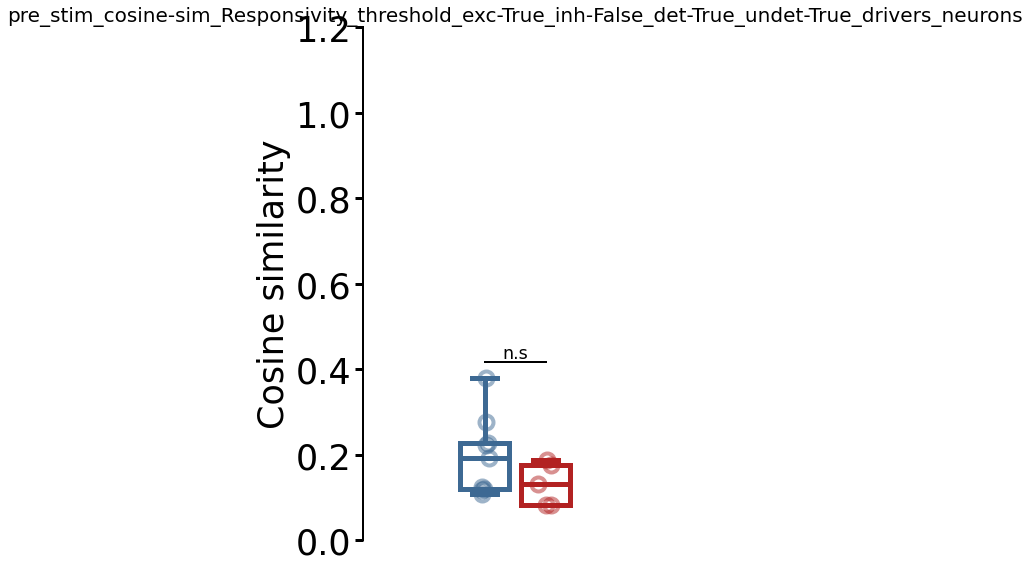

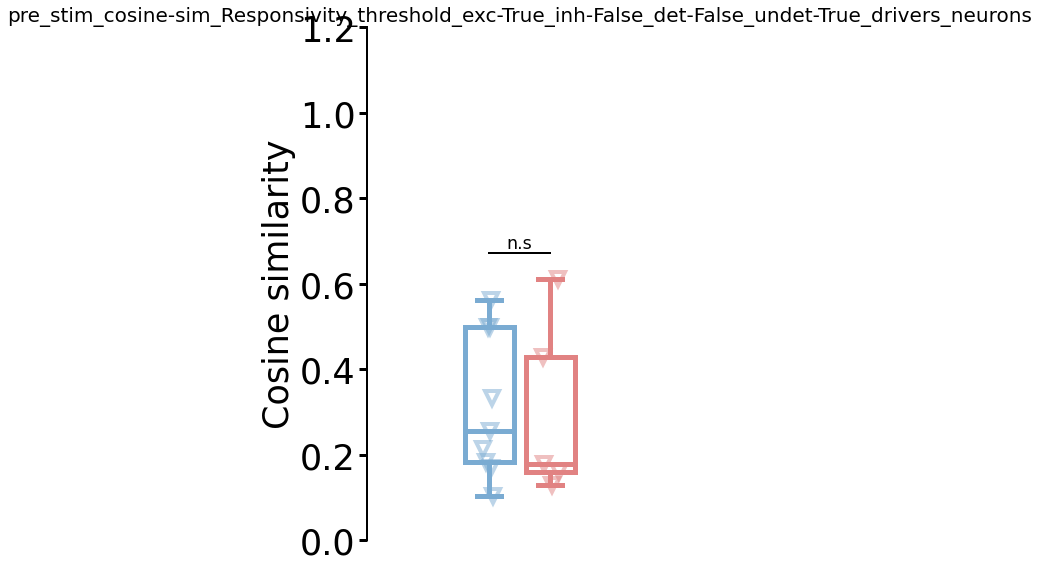

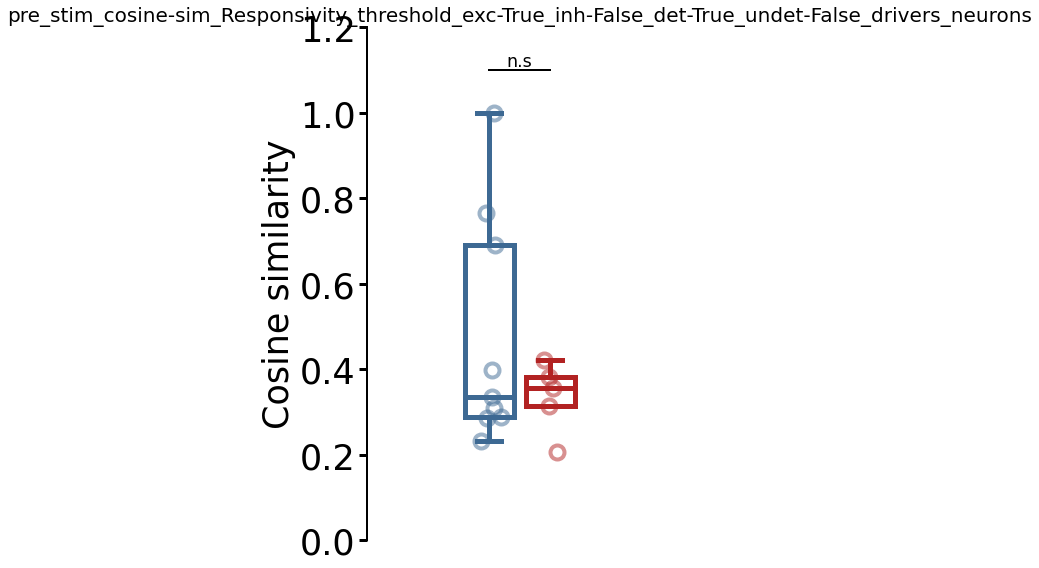

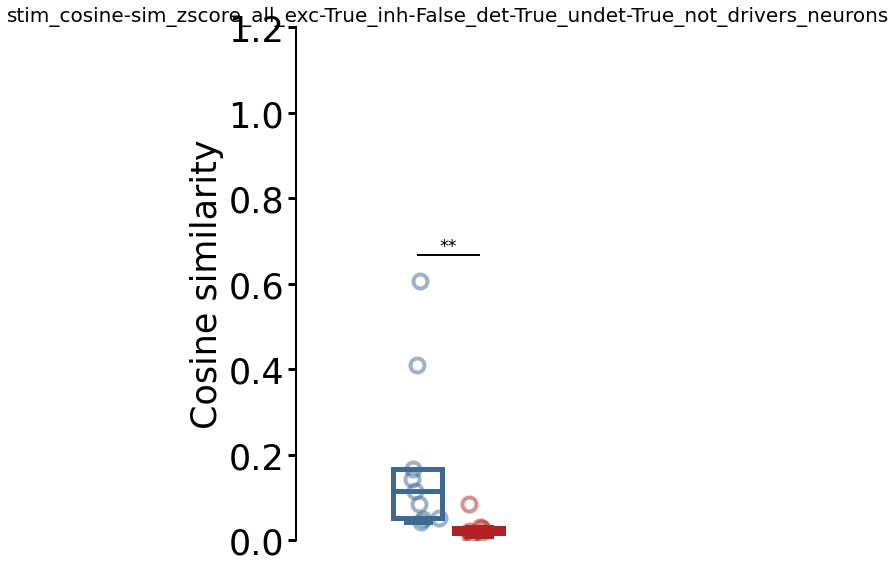

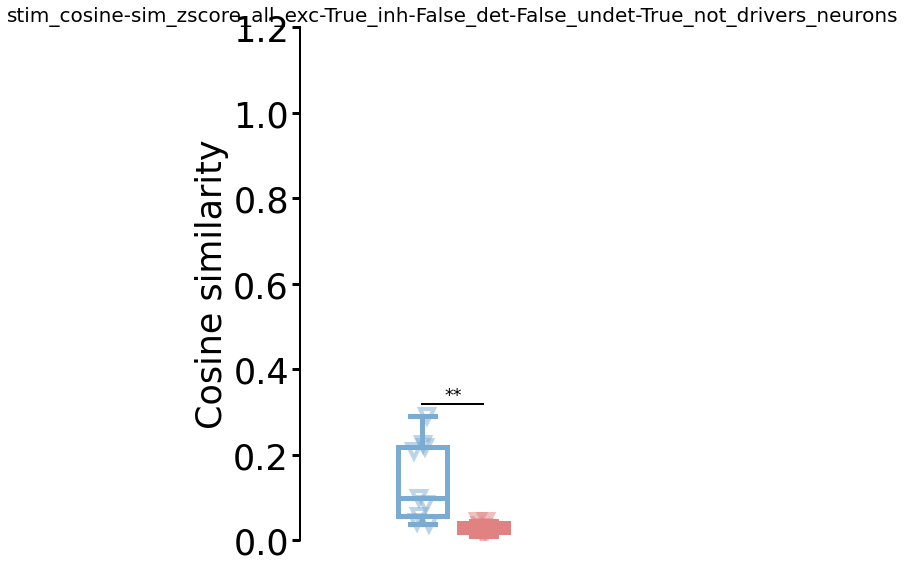

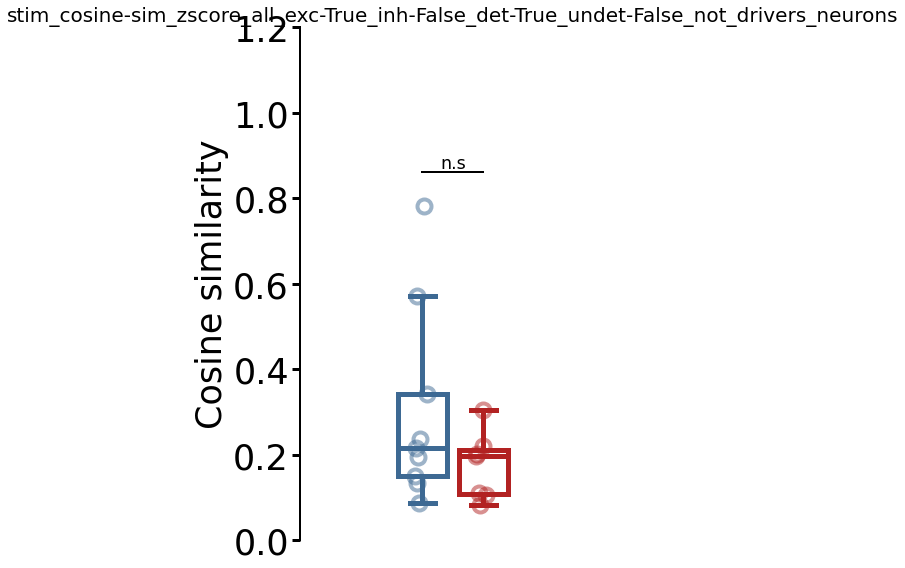

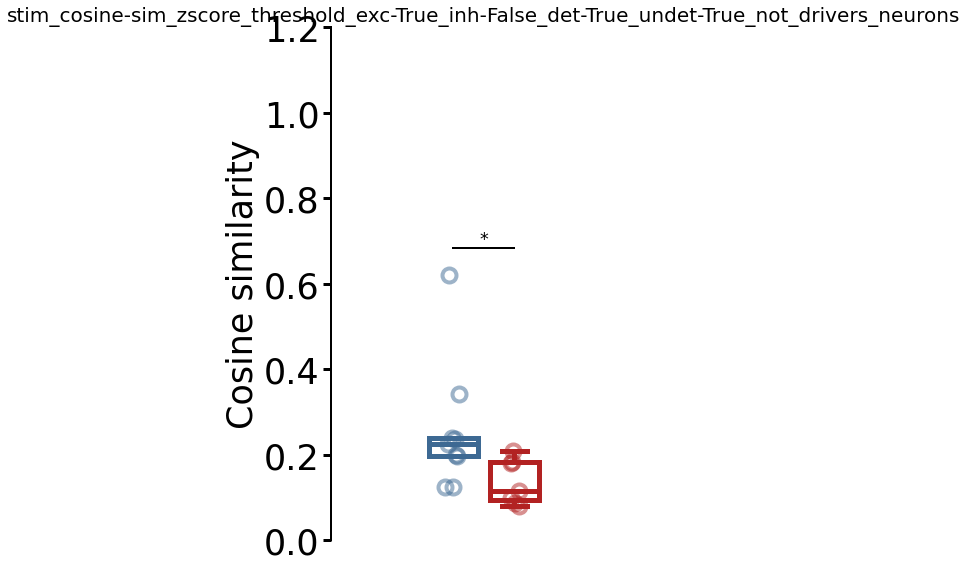

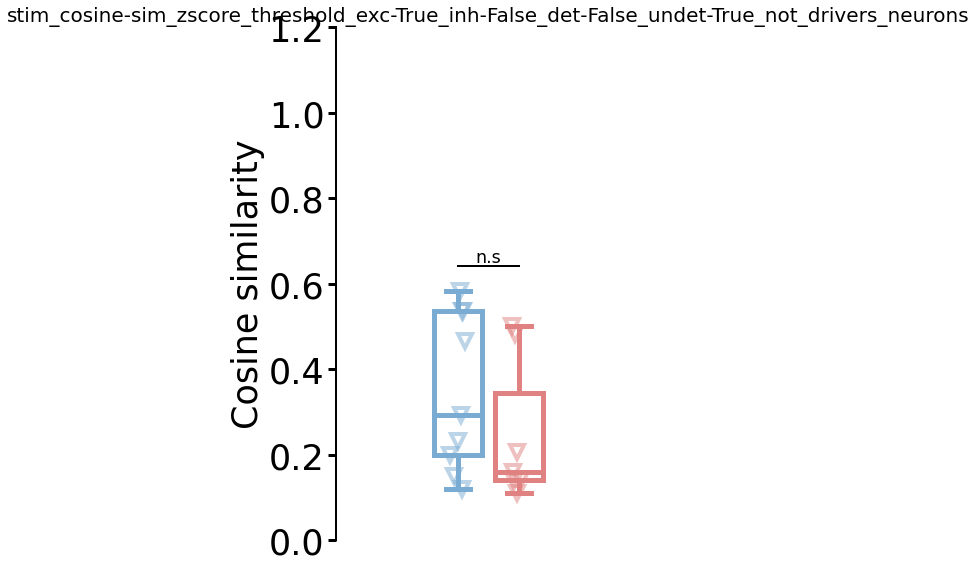

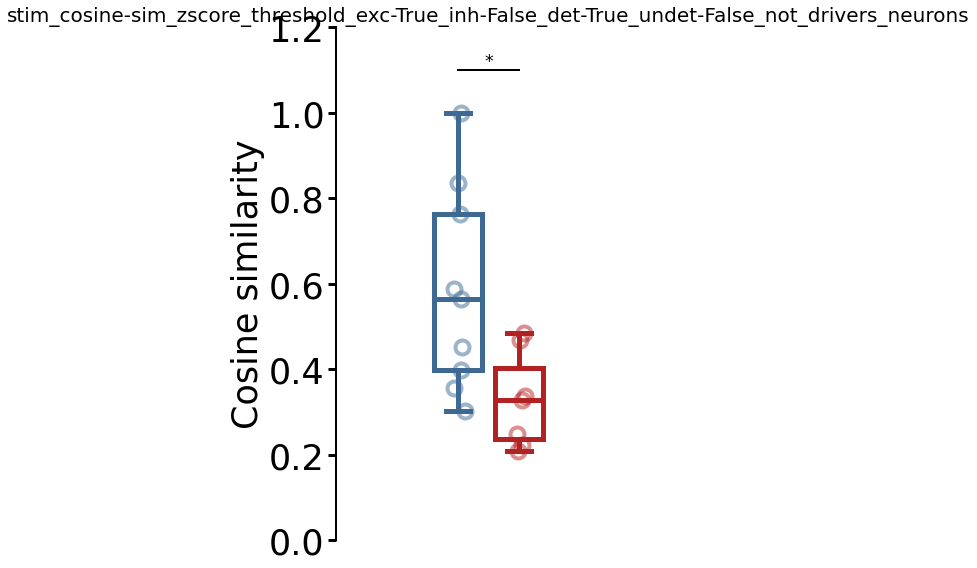

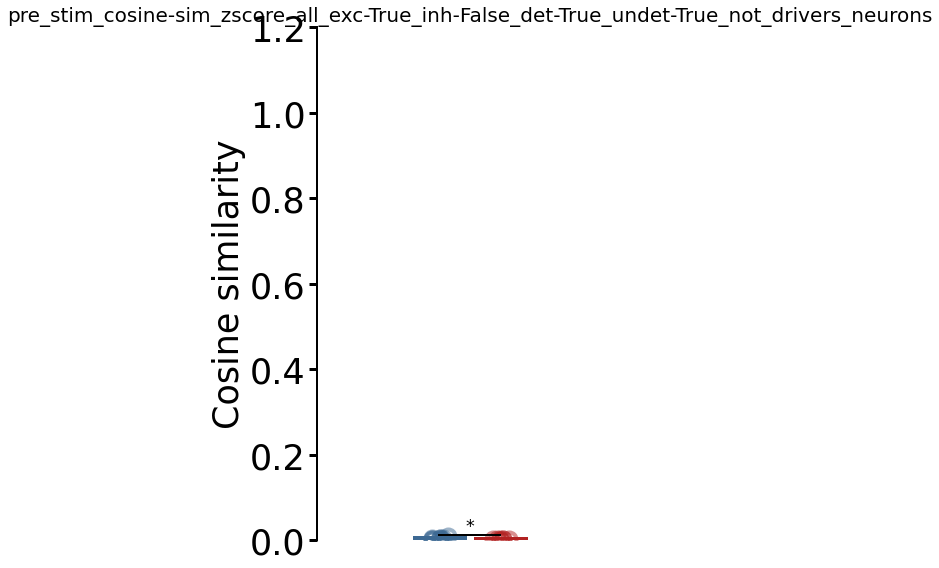

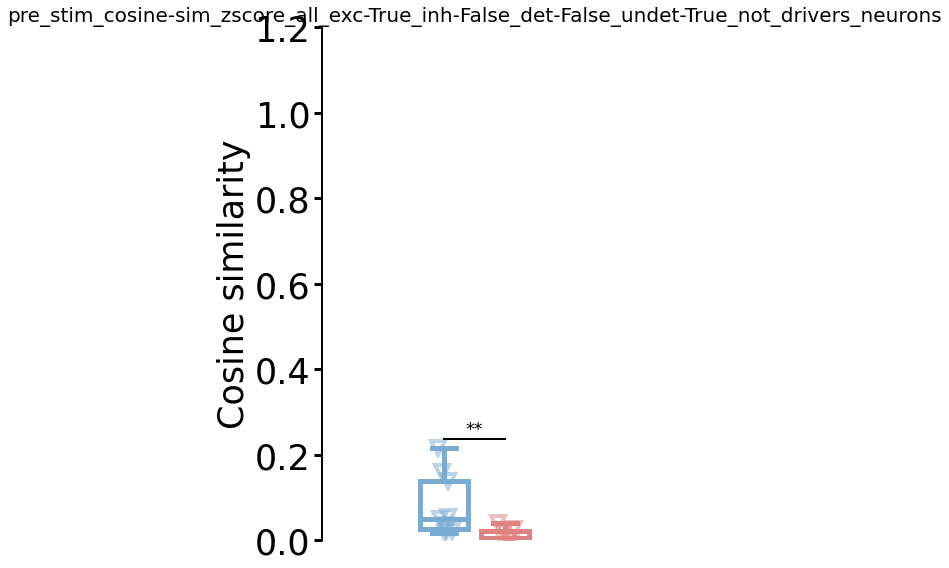

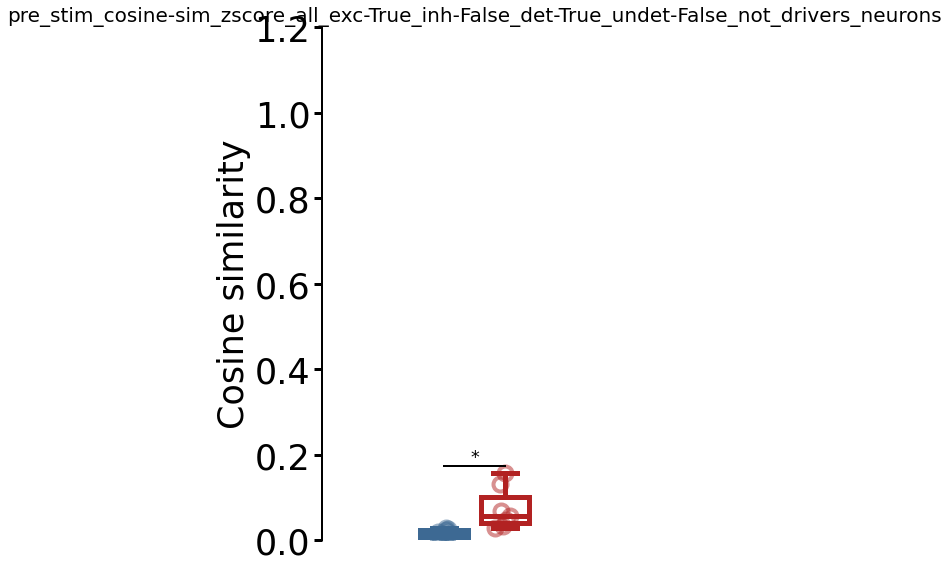

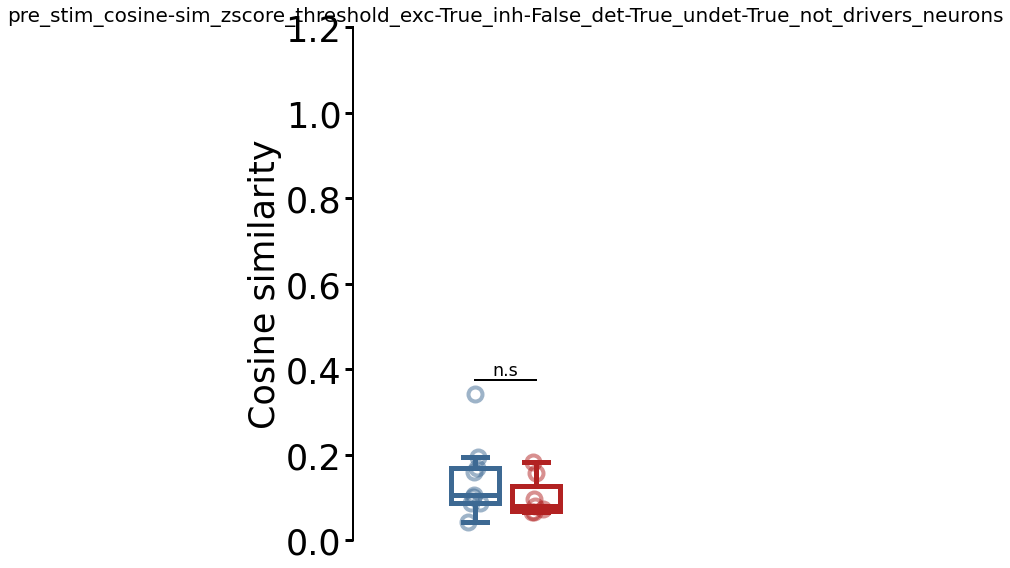

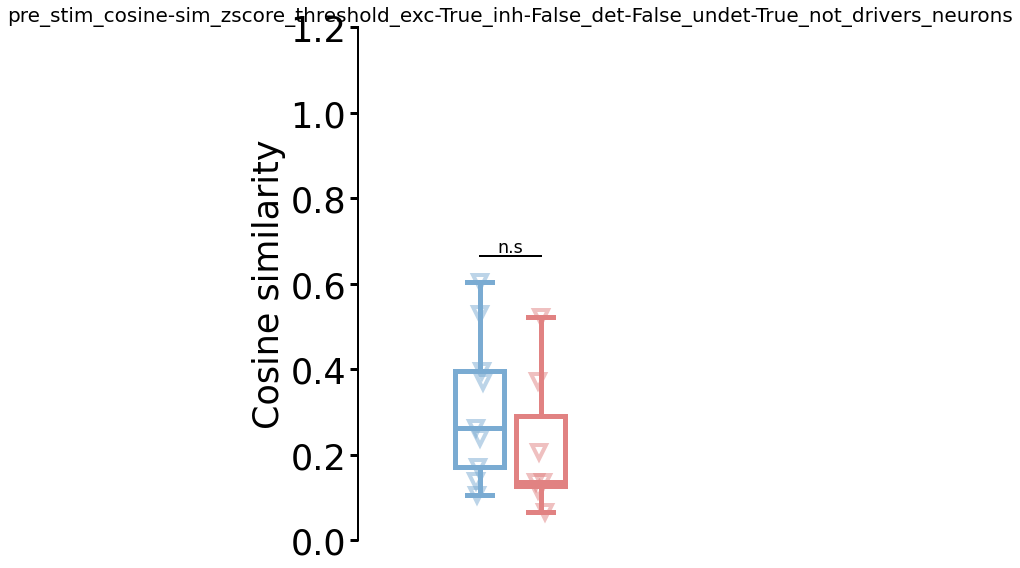

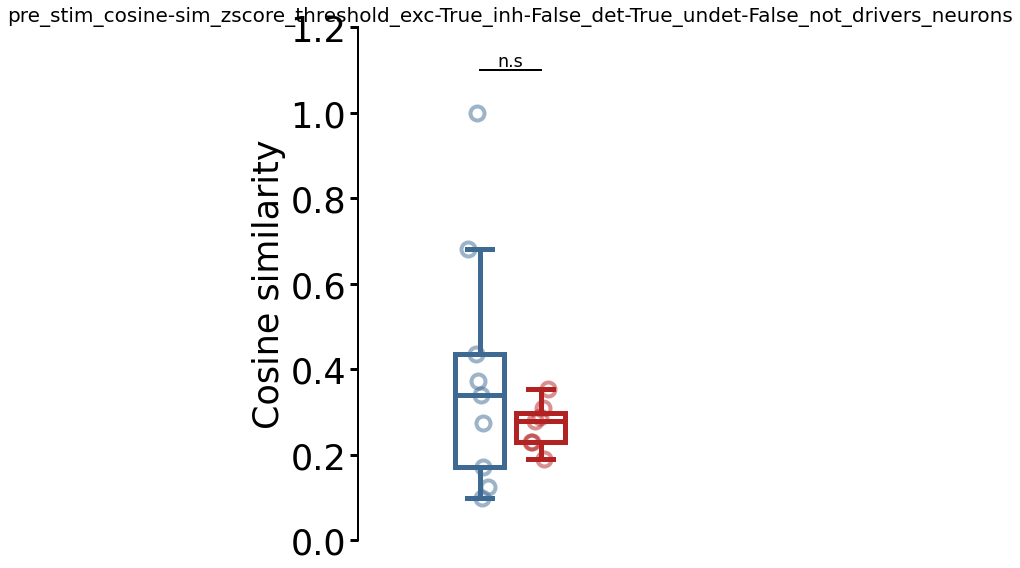

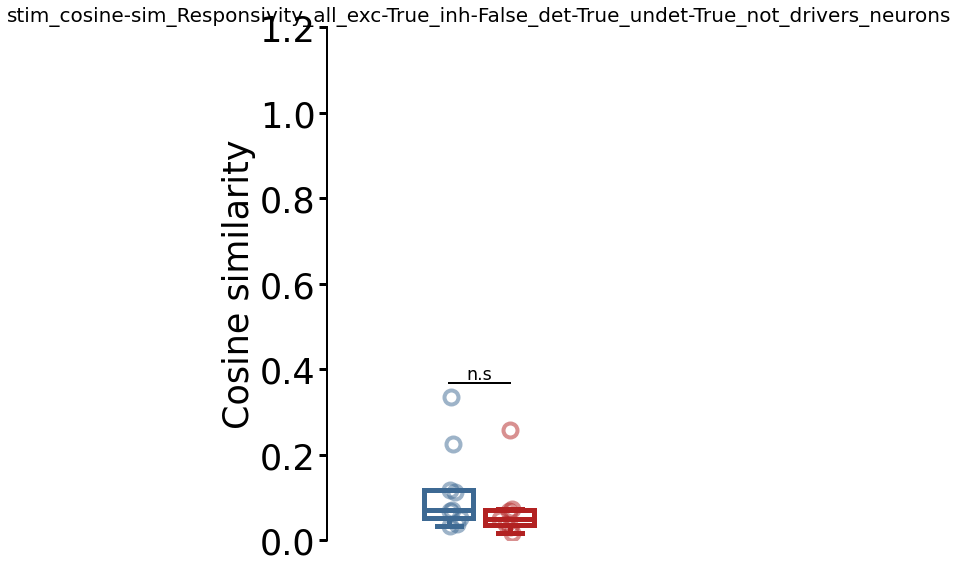

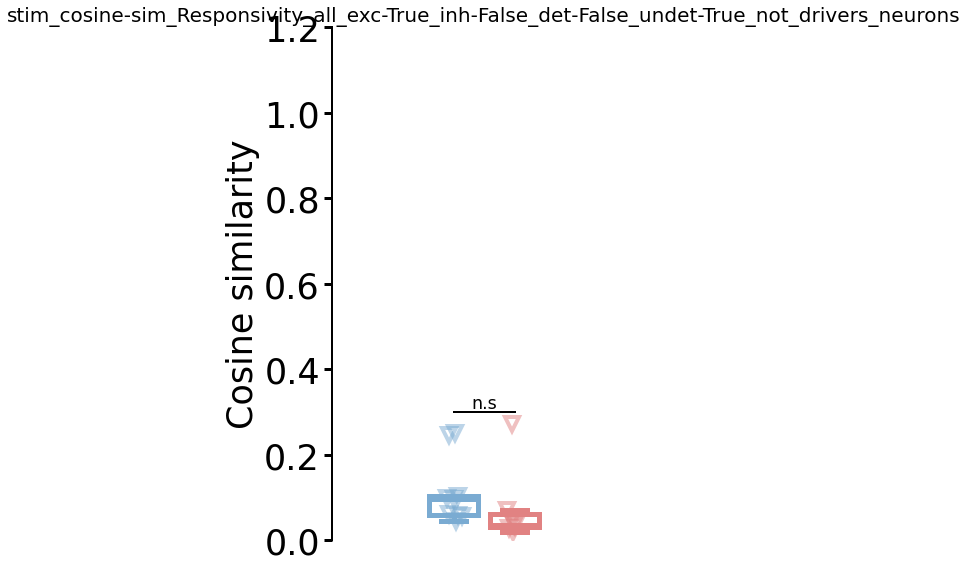

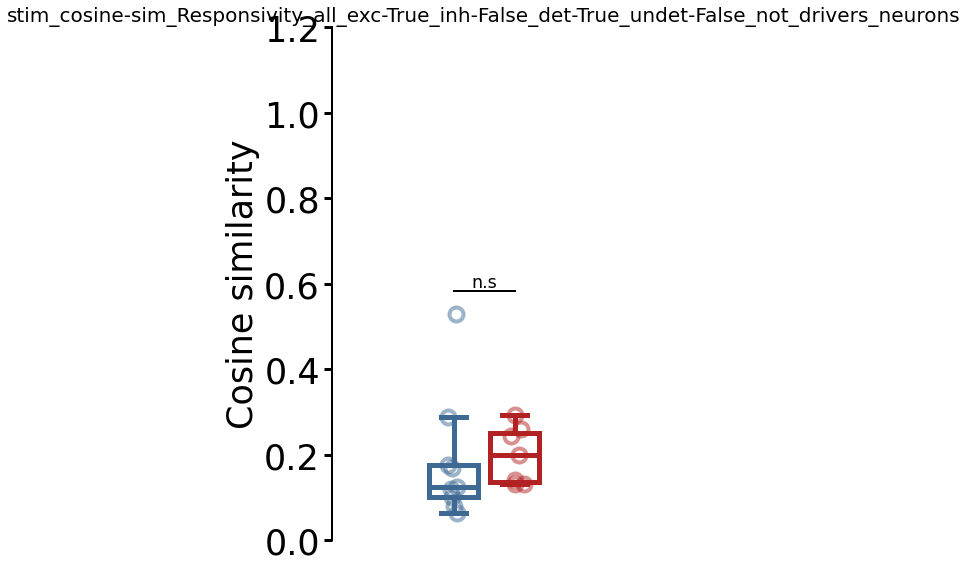

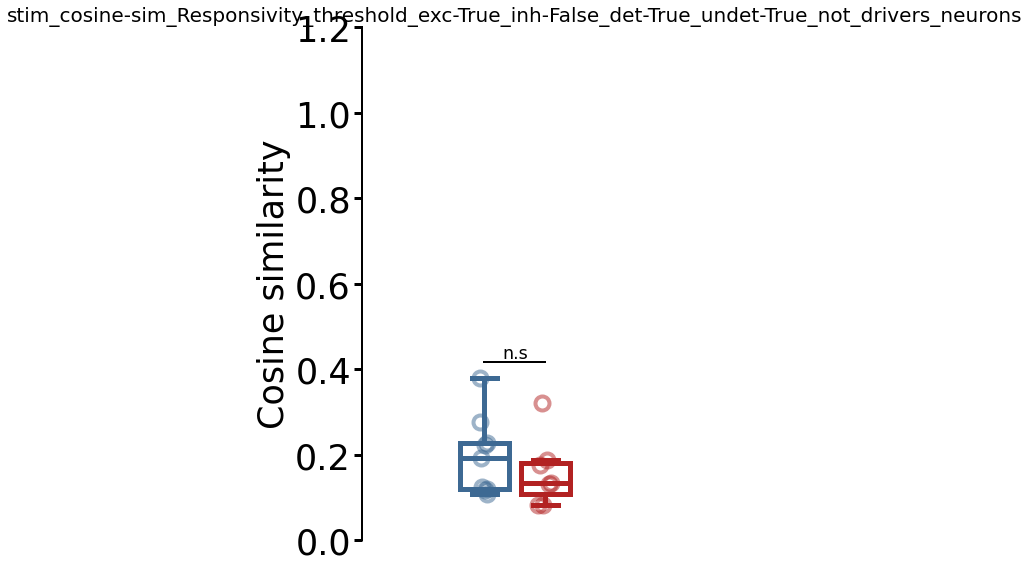

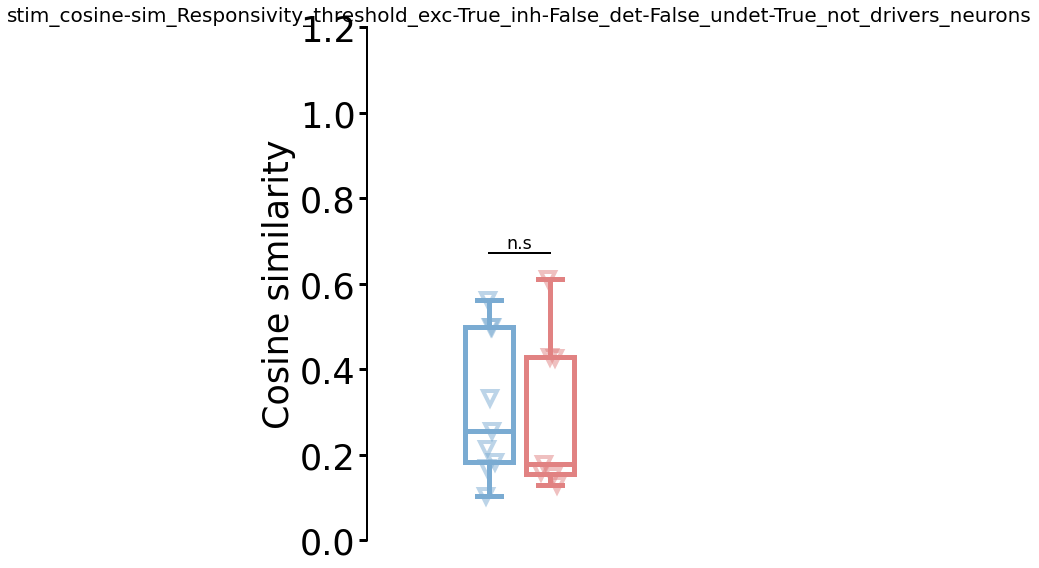

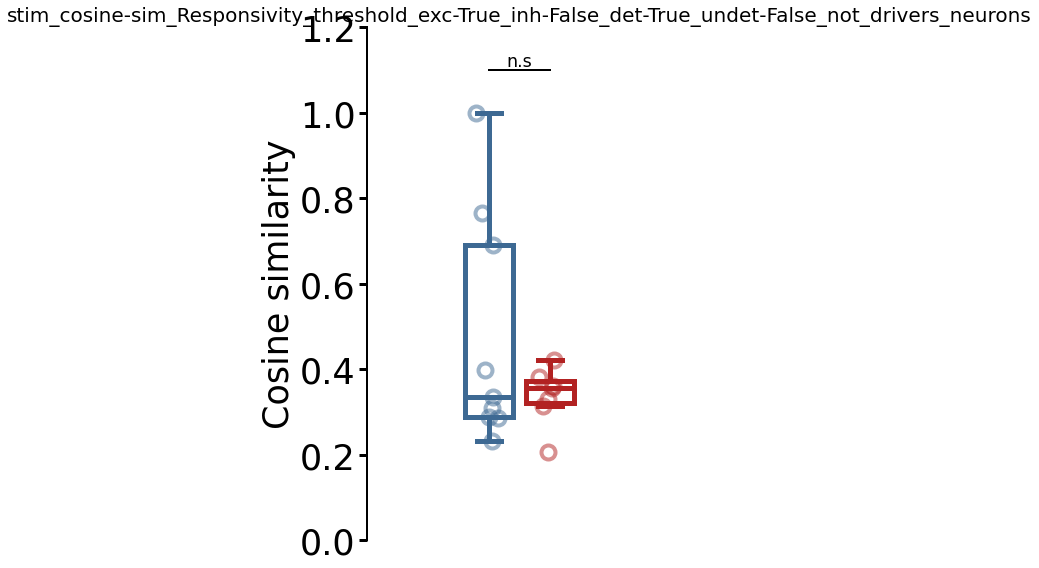

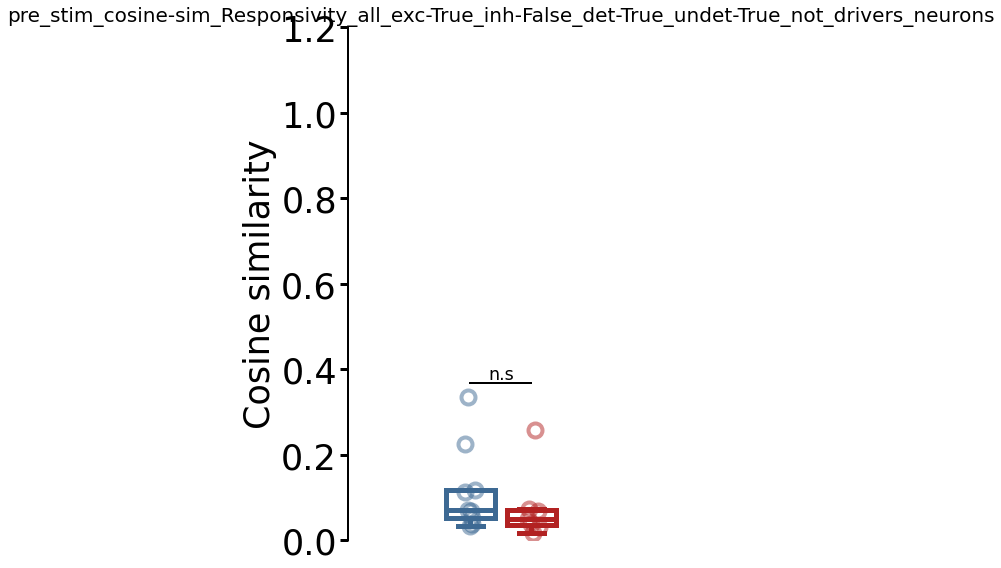

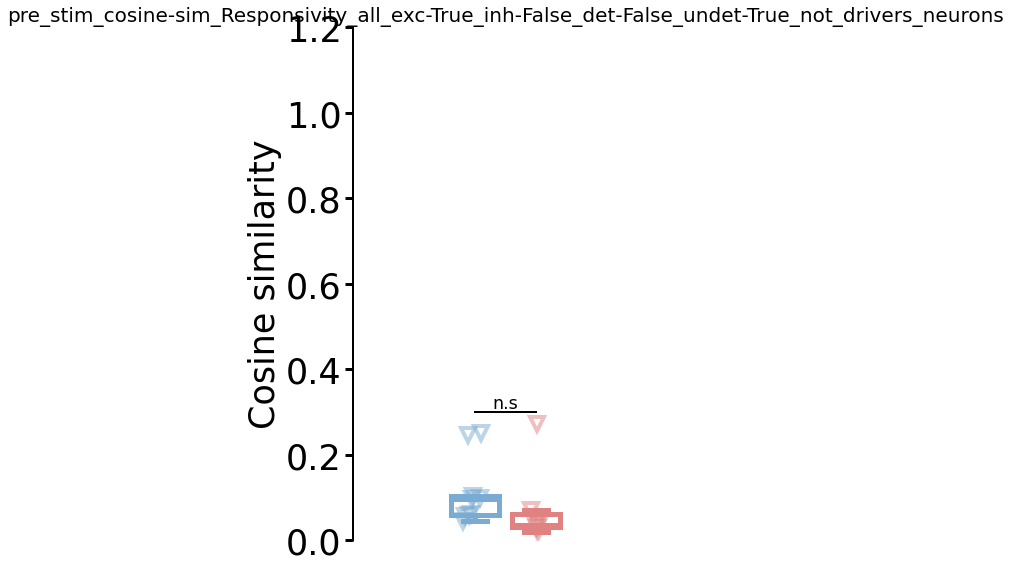

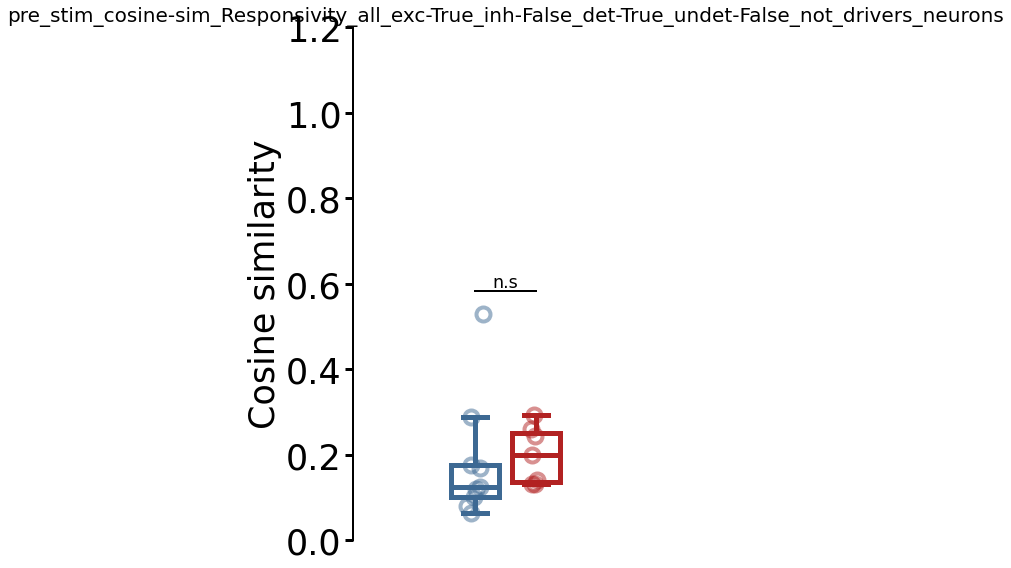

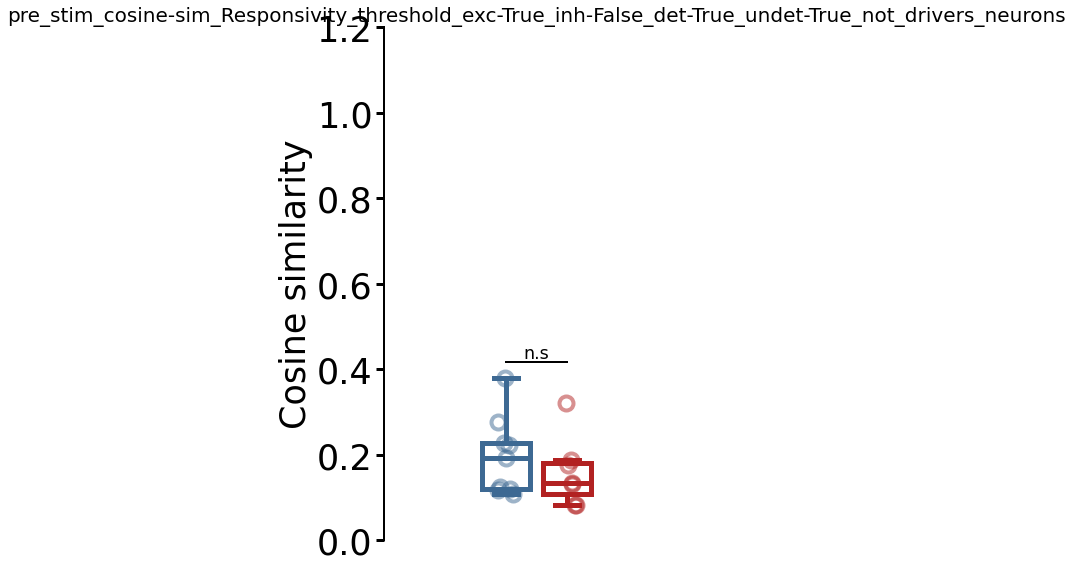

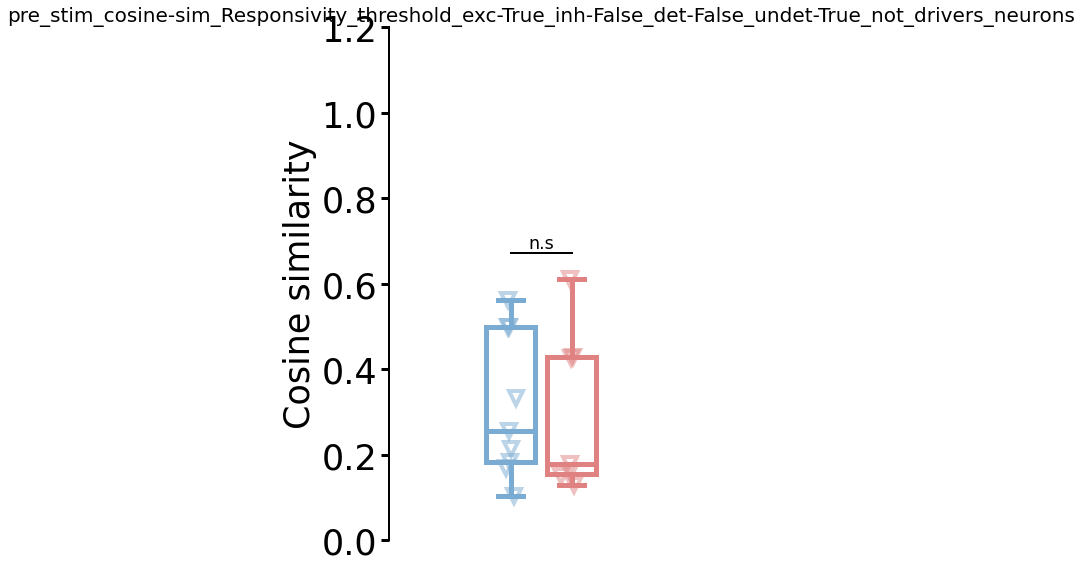

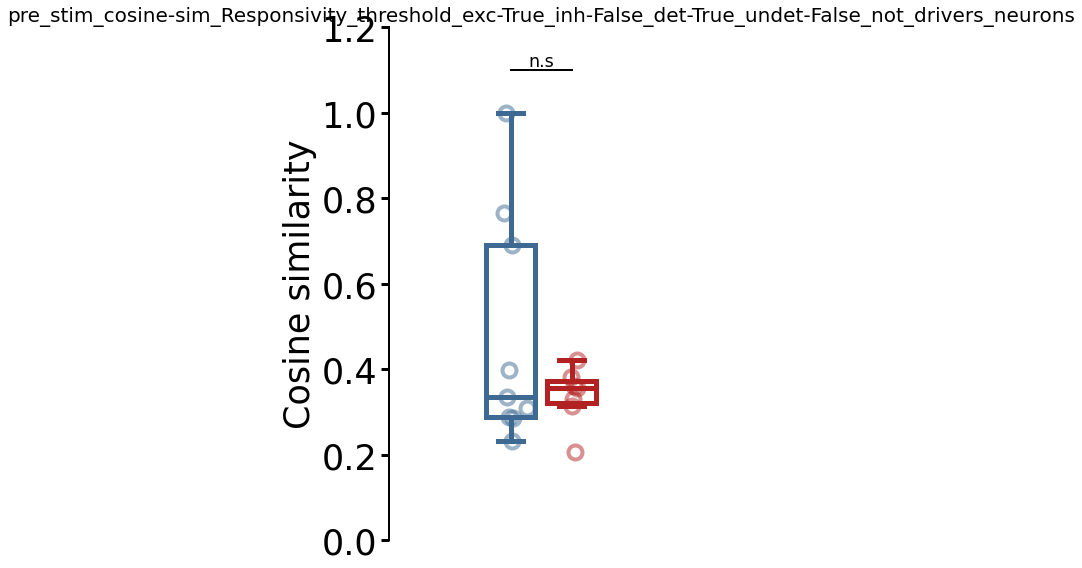

In [76]:
%capture
parameter = "zscore"
# from poster but need correction=true for synchro
# cosine_sim_plot(window="stim",parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=True, detected_trials=True, undetected_trials=False, stim_ampl="threshold", neurons="all")
#ALL NEURONS
##stim
### all stimulus
cosine_sim_plot(window="stim",parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="all", neurons="all")
cosine_sim_plot(window="stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="all", neurons="all")
cosine_sim_plot(window="stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="all", neurons="all")

### threshold
cosine_sim_plot(window="stim",parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="threshold", neurons="all")
cosine_sim_plot(window="stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="threshold", neurons="all")
cosine_sim_plot(window="stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="threshold", neurons="all")

##prestim
### all stimulus
cosine_sim_plot(window="pre_stim",parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="all", neurons="all")
cosine_sim_plot(window="pre_stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="all", neurons="all")
cosine_sim_plot(window="pre_stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="all", neurons="all")
## threshold 
cosine_sim_plot(window="pre_stim",parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="threshold", neurons="all")
cosine_sim_plot(window="pre_stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="threshold", neurons="all")
cosine_sim_plot(window="pre_stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="threshold", neurons="all")

# DRIVER and not drivers NEURONS ONLY
##stim
for neurons in ["all","drivers", "not_drivers"]:
    for parameter in ["zscore","Responsivity"]:
        cosine_sim_plot(window="stim",parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="all", neurons=neurons)
        cosine_sim_plot(window="stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="all", neurons=neurons)
        cosine_sim_plot(window="stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="all", neurons=neurons)
        
        ### threshold
        cosine_sim_plot(window="stim",parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="threshold", neurons=neurons)
        cosine_sim_plot(window="stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="threshold", neurons=neurons)
        cosine_sim_plot(window="stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="threshold", neurons=neurons)
        
        ##prestim
        ### all stimulus
        cosine_sim_plot(window="pre_stim",parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="all", neurons=neurons)
        cosine_sim_plot(window="pre_stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="all", neurons=neurons)
        cosine_sim_plot(window="pre_stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="all", neurons=neurons)
        
        ### threshold
        cosine_sim_plot(window="pre_stim",parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=True, stim_ampl="threshold", neurons=neurons)
        cosine_sim_plot(window="pre_stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=False, undetected_trials=True, stim_ampl="threshold", neurons=neurons)
        cosine_sim_plot(window="pre_stim", parameter=parameter, estimator="Mean", exc_neurons=True, inh_neurons=False, detected_trials=True, undetected_trials=False, stim_ampl="threshold", neurons=neurons)